In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Thu Jul  2 09:33:55 2020


In [2]:
from src.dataset.monocularhelper import MonocularHelper
from src.imports import *
import torch.optim.lr_scheduler
import os


%config IPCompleter.greedy=True
%reload_ext autoreload

In [3]:
import torch
print(torch.__version__)

1.5.1


In [4]:
%autoreload 2  # Autoreload all modules

In [5]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    
printgpuinfo()

Thu Jul  2 09:34:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.100      Driver Version: 440.100      CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
| N/A   79C    P0    46W /  N/A |    553MiB /  8111MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
# def showsysteminfo():
#     from psutil import virtual_memory
#     ram_gb = virtual_memory().total / 1e9
#     ram_gb_avail = virtual_memory().available / 1e9
#     ram_gb_used = virtual_memory().active / 1e9
#     print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
#     print('Your runtime has {:.1f} gigabytes of free RAM\n'.format(ram_gb_avail))
#     print('Your runtime has {:.1f} gigabytes of used RAM\n'.format(ram_gb_used))    
# showsysteminfo()

In [7]:
import torch
print(torch.__version__)

1.5.1


In [8]:
helper = MonocularHelper()
final_output = r'//media/abhijit/Windows/MonocularDS/OverLayedImages'
final_output_mask = r'//media/abhijit/Windows/MonocularDS/OverLayedMask'
final_output_dm = r'/media/abhijit/Windows/MonocularDS/OverLayedDepthMasks'
bg_path = r'/media/abhijit/Windows/MonocularDS/Background'

# final_output = r'/content/MonocularDS/OverLayedImages'
# final_output_mask = r'/content/MonocularDS/OverLayedMask'
# final_output_dm = r'/content/MonocularDS/OverLayedDepthMasks'
# bg_path = r'/home/abhijit/EVARepo/MonocularDS/Background'

train_data, train_label, test_data, test_label = helper.get_train_test_data(masks_folder=final_output_mask,
                                                                            images_folder=final_output,
                                                                            depth_masks_folder=final_output_dm,
                                                                            no_of_batches=40,
                                                                            total_images_count=400000,
                                                                            bg_folder=bg_path)

100%|██████████| 40/40 [00:02<00:00, 13.73it/s]


In [9]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

from src.dataset import MonocularDataset

print(len(train_label))
print(len(test_label))
torch.backends.cudnn.benchmark = True

batch_size = 8

# !ulimit
# !ulimit -n 500000
# !ulimit

monocular_ds_tr = MonocularDataset(images=train_data, labels=train_label, ds_type="train", preload=True)
monocular_ds_ts = MonocularDataset(images=test_data, labels=test_label, ds_type="test", preload=True)
image_size= 32
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds_tr.set_transforms(train_transforms)
monocular_ds_ts.set_transforms(test_transforms)

# ds = dst.Dataset()

# train_dataset = ds.get_monocular_train_dataset(train_image_data=train_data, train_image_labels=train_label,
#                                                train_transforms=train_transforms)

# test_dataset = ds.get_monocular_test_dataset(test_image_labels=test_label, test_image_data=test_data,
#                                              test_transforms=test_transforms)

torch.manual_seed(1)

dataloader = dl.Dataloader(traindataset=monocular_ds_tr, testdataset=monocular_ds_ts, batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

280000
120000
8


  0%|          | 0/280000 [00:00<?, ?it/s]


Preloading masks from train dataset...


  0%|          | 225/280000 [00:00<02:04, 2240.09it/s]


Preloading depth maps from train dataset...


  0%|          | 278/120000 [00:00<00:43, 2773.87it/s]


Preloading masks from test dataset...


  1%|          | 1490/120000 [00:00<00:16, 7316.11it/s]


Preloading depth maps from test dataset...


100%|██████████| 120000/120000 [00:16<00:00, 7366.30it/s]

35000
15000
cuda
Selected optimization level O2:  FP16 training with FP32 batchnorm and FP32 master weights.

Defaults for this optimization level are:
enabled                : True
opt_level              : O2
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : True
master_weights         : True
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O2
cast_model_type        : torch.float16
patch_torch_functions  : False
keep_batchnorm_fp32    : True
master_weights         : True
loss_scale             : dynamic
4


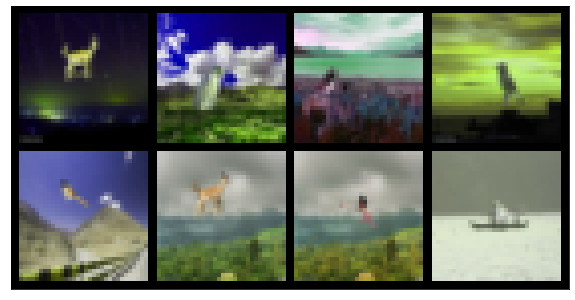

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 64, 64]              27
            Conv2d-2           [-1, 64, 64, 64]             256
DepthwiseSeparableConv2d-3           [-1, 64, 64, 64]               0
              ReLU-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]             576
            Conv2d-6          [-1, 128, 64, 64]           8,320
DepthwiseSeparableConv2d-7          [-1, 128, 64, 64]               0
              ReLU-8          [-1, 128, 64, 64]               0
            Conv2d-9          [-1, 128, 64, 64]           1,152
           Conv2d-10          [-1, 128, 64, 64]          16,512
DepthwiseSeparableConv2d-11          [-1, 128, 64, 64]               0
      BatchNorm2d-12          [-1, 128, 64, 64]             256
           Conv2d-13          [-1, 128, 64, 64]           1,152
           Conv2d-14

In [11]:
print(len(train_loader))
print(len(test_loader))

# !ulimit -n

import torch.nn as nn
from apex import amp
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")

cnn_model, device = utils.Utils.createMonocularModel()
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

for name, param in cnn_model.named_parameters():    
    if "bn1" in name or "bn2" in name:
        nn.init.constant_(param, 0)        
    elif "weight" in name:
        nn.init.kaiming_normal_(param, mode="fan_out", nonlinearity="relu")
    elif "bias" in name:
        nn.init.constant_(param, 0)

# last_epoch = 1
# path = "/home/abhijit/Downloads/finalmodelwithdata-Mask-224k.pt"
# if os.path.exists(path):
#     checkpoint, epoch, model_state_dict, optimizer_state_dict, train_losses, train_acc, test_losses, test_acc \
#         , test_losses, lr_data, class_correct, class_total = utils.Utils.loadmodel(path)
#     cnn_model.load_state_dict(model_state_dict)
#     # optimizer.load_state_dict(optimizer_state_dict)
#     last_epoch = last_epoch + checkpoint['epoch']

# cnn_model = torchvision.models.resnet18(pretrained=False, num_classes=2).cuda(device)

cnn_model, optimizer = amp.initialize(cnn_model, optimizer, opt_level="O2")
sample = next(iter(train_loader))

print(len(sample[0]))
imgs = sample[0][0]
utils.Utils.show(imgs, nrow=4)
# imgs = sample[0][1]
# utils.Utils.show(imgs, nrow=4)
# imgs = sample[0][2]
# utils.Utils.show(imgs, nrow=4)
# imgs = sample[0][3]
# utils.Utils.show(imgs, nrow=4)
# # grid_tensor = torchvision.utils.make_grid(imgs, 2)
# grid_image = grid_tensor.permute(1, 2, 0)

# utils.Utils.show(imgs, nrow=4)

train_model = train.TrainModel()
# print(cnn_model)
# print(cnn_model.parameters())

# optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.05, patience=1, 
            verbose=True, threshold=0.01, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)

lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 10

train_model.showmodelsummary(model=cnn_model,input_size=[(4,3,64,64)])
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(count_parameters(cnn_model))

In [12]:
from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
                                        show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(dice_loss)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

# train_losses, train_acc = train_model.gettraindata()
# test_losses, test_acc = train_model.gettestdata()
# utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="savedmodels/finalmodelwithdata.pt",
#                       optimizer_state_dict=optimizer.state_dict
#                       , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
#                       test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

  0%|          | 0/35000 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 8/35000 [00:00<3:43:23,  2.61it/s]

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Train Epoch: 1 [0/280000 (0%)]	Loss: 1.178547
IOU : 0.0


  0%|          | 56/35000 [00:01<26:56, 21.62it/s]  

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0


  1%|▏         | 507/35000 [00:09<09:31, 60.40it/s]

Train Epoch: 1 [2000/280000 (1%)]	Loss: 0.528256
IOU : 0.37698783910196443


  2%|▏         | 822/35000 [00:14<10:05, 56.43it/s]

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


  3%|▎         | 1008/35000 [00:17<10:00, 56.56it/s]

Train Epoch: 1 [4000/280000 (3%)]	Loss: 0.455726
IOU : 0.28055878928987193


  4%|▍         | 1506/35000 [00:28<11:41, 47.74it/s]

Train Epoch: 1 [6000/280000 (4%)]	Loss: 0.300243
IOU : 0.3986409966024915


  6%|▌         | 2004/35000 [00:38<11:41, 47.06it/s]

Train Epoch: 1 [8000/280000 (6%)]	Loss: 0.292222
IOU : 0.3952662721893491


  7%|▋         | 2506/35000 [00:50<14:27, 37.45it/s]

Train Epoch: 1 [10000/280000 (7%)]	Loss: 0.541919
IOU : 0.20674646354733406


  9%|▊         | 2996/35000 [01:02<12:15, 43.52it/s]

Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0


  9%|▊         | 3006/35000 [01:02<13:27, 39.60it/s]

Train Epoch: 1 [12000/280000 (9%)]	Loss: 0.182146
IOU : 0.5928646379853095


  9%|▉         | 3202/35000 [01:07<15:04, 35.16it/s]Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/home/abhijit/.virtualenvs/dl4cv/lib/python3.8/site-packages/torch/utils/data/_utils/pin_memory.py", line 25, in _pin_memory_loop
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.8/multiprocessing/queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "/home/abhijit/.virtualenvs/dl4cv/lib/python3.8/site-packages/torch/multiprocessing/reductions.py", line 294, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.8/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.8/multiprocessing/resource_sharer.py", line 87, in get_conn

KeyboardInterrupt: 

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-32K.pt",
                      optimizer_state_dict=optimizer.state_dicttotal_iou
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

  0%|          | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 4/17500 [00:00<2:23:55,  2.03it/s]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.293847
IOU : 0.46835280523815637


  3%|▎         | 503/17500 [00:25<13:55, 20.35it/s]

Train Epoch: 1 [1500/280000 (3%)]	Loss: 0.086473
IOU : 0.7412698412698413


  6%|▌         | 1004/17500 [00:49<13:26, 20.44it/s]

Train Epoch: 1 [3000/280000 (6%)]	Loss: 0.079367
IOU : 0.7946812025107367


  9%|▊         | 1505/17500 [01:14<13:18, 20.04it/s]

Train Epoch: 1 [4500/280000 (9%)]	Loss: 0.083268
IOU : 0.7762489762489763


 11%|█▏        | 2003/17500 [01:38<12:38, 20.44it/s]

Train Epoch: 1 [6000/280000 (11%)]	Loss: 0.073456
IOU : 0.8090393595730487


 14%|█▍        | 2504/17500 [02:03<12:08, 20.58it/s]

Train Epoch: 1 [7500/280000 (14%)]	Loss: 0.058812
IOU : 0.8178947368421052


 17%|█▋        | 3005/17500 [02:27<11:44, 20.57it/s]

Train Epoch: 1 [9000/280000 (17%)]	Loss: 0.050231
IOU : 0.842114266164899


 20%|██        | 3503/17500 [02:51<11:34, 20.16it/s]

Train Epoch: 1 [10500/280000 (20%)]	Loss: 0.072991
IOU : 0.7588446036721899


 23%|██▎       | 4004/17500 [03:16<10:49, 20.77it/s]

Train Epoch: 1 [12000/280000 (23%)]	Loss: 0.056887
IOU : 0.821590909090909


 26%|██▌       | 4505/17500 [03:40<10:33, 20.52it/s]

Train Epoch: 1 [13500/280000 (26%)]	Loss: 0.039536
IOU : 0.8615730337078652


 29%|██▊       | 5003/17500 [04:05<10:12, 20.40it/s]

Train Epoch: 1 [15000/280000 (29%)]	Loss: 0.075171
IOU : 0.7845579078455791


 31%|███▏      | 5504/17500 [04:29<09:42, 20.59it/s]

Train Epoch: 1 [16500/280000 (31%)]	Loss: 0.058618
IOU : 0.8095238095238095


 34%|███▍      | 6005/17500 [04:54<09:29, 20.17it/s]

Train Epoch: 1 [18000/280000 (34%)]	Loss: 0.045318
IOU : 0.8594728601252609


 37%|███▋      | 6503/17500 [05:18<08:59, 20.39it/s]

Train Epoch: 1 [19500/280000 (37%)]	Loss: 0.051396
IOU : 0.8248587570621468


 40%|████      | 7004/17500 [05:43<08:26, 20.70it/s]

Train Epoch: 1 [21000/280000 (40%)]	Loss: 0.060450
IOU : 0.8268947755702722


 43%|████▎     | 7505/17500 [06:07<08:09, 20.40it/s]

Train Epoch: 1 [22500/280000 (43%)]	Loss: 0.081242
IOU : 0.7666364186327889


 46%|████▌     | 8003/17500 [06:32<07:43, 20.50it/s]

Train Epoch: 1 [24000/280000 (46%)]	Loss: 0.047233
IOU : 0.828105167724388


 49%|████▊     | 8504/17500 [06:56<07:19, 20.49it/s]

Train Epoch: 1 [25500/280000 (49%)]	Loss: 0.052614
IOU : 0.8206181883151689


 51%|█████▏    | 9005/17500 [07:21<06:59, 20.25it/s]

Train Epoch: 1 [27000/280000 (51%)]	Loss: 0.036340
IOU : 0.8668986515876468


 54%|█████▍    | 9503/17500 [07:45<06:33, 20.32it/s]

Train Epoch: 1 [28500/280000 (54%)]	Loss: 0.033272
IOU : 0.8642706939399732


 57%|█████▋    | 10004/17500 [08:10<06:03, 20.64it/s]

Train Epoch: 1 [30000/280000 (57%)]	Loss: 0.066173
IOU : 0.8065376917945297


 60%|██████    | 10504/17500 [08:34<05:45, 20.27it/s]

Train Epoch: 1 [31500/280000 (60%)]	Loss: 0.057825
IOU : 0.7954851752021563


 63%|██████▎   | 11005/17500 [08:59<05:17, 20.46it/s]

Train Epoch: 1 [33000/280000 (63%)]	Loss: 0.043557
IOU : 0.8421137425487353


 66%|██████▌   | 11503/17500 [09:23<04:58, 20.07it/s]

Train Epoch: 1 [34500/280000 (66%)]	Loss: 0.041194
IOU : 0.8539731682146543


 69%|██████▊   | 12004/17500 [09:48<04:28, 20.47it/s]

Train Epoch: 1 [36000/280000 (69%)]	Loss: 0.049186
IOU : 0.8339452603471295


 71%|███████▏  | 12505/17500 [10:13<04:06, 20.26it/s]

Train Epoch: 1 [37500/280000 (71%)]	Loss: 0.021997
IOU : 0.9100073313782991


 74%|███████▍  | 13003/17500 [10:37<03:41, 20.33it/s]

Train Epoch: 1 [39000/280000 (74%)]	Loss: 0.042723
IOU : 0.8503133653986299


 77%|███████▋  | 13504/17500 [11:02<03:17, 20.27it/s]

Train Epoch: 1 [40500/280000 (77%)]	Loss: 0.059630
IOU : 0.8315356959424756


 80%|████████  | 14005/17500 [11:26<02:50, 20.54it/s]

Train Epoch: 1 [42000/280000 (80%)]	Loss: 0.047331
IOU : 0.8109161793372319


 83%|████████▎ | 14503/17500 [11:51<02:26, 20.52it/s]

Train Epoch: 1 [43500/280000 (83%)]	Loss: 0.061132
IOU : 0.7714706966457796


 86%|████████▌ | 15004/17500 [12:15<02:02, 20.42it/s]

Train Epoch: 1 [45000/280000 (86%)]	Loss: 0.035950
IOU : 0.8548968700418289


 89%|████████▊ | 15505/17500 [12:40<01:37, 20.39it/s]

Train Epoch: 1 [46500/280000 (89%)]	Loss: 0.053116
IOU : 0.815377932232841


 91%|█████████▏| 16003/17500 [13:04<01:13, 20.48it/s]

Train Epoch: 1 [48000/280000 (91%)]	Loss: 0.028790
IOU : 0.8708507164883004


 94%|█████████▍| 16504/17500 [13:28<00:49, 20.28it/s]

Train Epoch: 1 [49500/280000 (94%)]	Loss: 0.060976
IOU : 0.801998966052042


 97%|█████████▋| 17005/17500 [13:53<00:24, 20.47it/s]

Train Epoch: 1 [51000/280000 (97%)]	Loss: 0.057525
IOU : 0.7890658631080499


100%|██████████| 17500/17500 [14:17<00:00, 20.40it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.051592914443563585


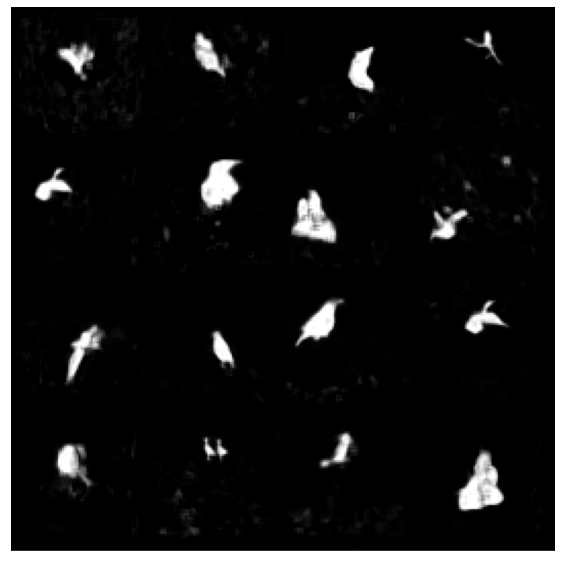

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


  0%|          | 4/17500 [00:00<1:46:09,  2.75it/s]

Train Epoch: 2 [0/280000 (0%)]	Loss: 0.027610
IOU : 0.8819672131147541


  3%|▎         | 504/17500 [00:25<13:53, 20.40it/s]

Train Epoch: 2 [1500/280000 (3%)]	Loss: 0.042002
IOU : 0.8533466201627636


  6%|▌         | 1005/17500 [00:49<13:26, 20.46it/s]

Train Epoch: 2 [3000/280000 (6%)]	Loss: 0.031060
IOU : 0.8744525547445255


  9%|▊         | 1503/17500 [01:14<12:59, 20.52it/s]

Train Epoch: 2 [4500/280000 (9%)]	Loss: 0.026239
IOU : 0.8789691015235654


 11%|█▏        | 2004/17500 [01:38<12:31, 20.61it/s]

Train Epoch: 2 [6000/280000 (11%)]	Loss: 0.030822
IOU : 0.8902743142144638


 14%|█▍        | 2505/17500 [02:03<12:17, 20.34it/s]

Train Epoch: 2 [7500/280000 (14%)]	Loss: 0.037393
IOU : 0.8618212197159566


 17%|█▋        | 3003/17500 [02:27<11:50, 20.41it/s]

Train Epoch: 2 [9000/280000 (17%)]	Loss: 0.065386
IOU : 0.7725573945541911


 20%|██        | 3504/17500 [02:51<11:21, 20.55it/s]

Train Epoch: 2 [10500/280000 (20%)]	Loss: 0.034165
IOU : 0.8671394799054374


 23%|██▎       | 4005/17500 [03:16<10:59, 20.46it/s]

Train Epoch: 2 [12000/280000 (23%)]	Loss: 0.044524
IOU : 0.8066124861470262


 26%|██▌       | 4503/17500 [03:40<10:38, 20.36it/s]

Train Epoch: 2 [13500/280000 (26%)]	Loss: 0.034867
IOU : 0.8533801580333626


 29%|██▊       | 5004/17500 [04:05<10:10, 20.48it/s]

Train Epoch: 2 [15000/280000 (29%)]	Loss: 0.038337
IOU : 0.8529655172413793


 31%|███▏      | 5504/17500 [04:29<09:43, 20.57it/s]

Train Epoch: 2 [16500/280000 (31%)]	Loss: 0.035704
IOU : 0.857455420632316


 34%|███▍      | 6005/17500 [04:54<09:19, 20.55it/s]

Train Epoch: 2 [18000/280000 (34%)]	Loss: 0.035212
IOU : 0.8665689149560117


 37%|███▋      | 6503/17500 [05:18<08:51, 20.69it/s]

Train Epoch: 2 [19500/280000 (37%)]	Loss: 0.035694
IOU : 0.8691432396251674


 40%|████      | 7004/17500 [05:43<08:39, 20.19it/s]

Train Epoch: 2 [21000/280000 (40%)]	Loss: 0.036301
IOU : 0.8668158090976883


 43%|████▎     | 7505/17500 [06:07<08:10, 20.37it/s]

Train Epoch: 2 [22500/280000 (43%)]	Loss: 0.035014
IOU : 0.8746548868028713


 46%|████▌     | 8003/17500 [06:32<07:39, 20.66it/s]

Train Epoch: 2 [24000/280000 (46%)]	Loss: 0.041311
IOU : 0.8360550064460679


 49%|████▊     | 8504/17500 [06:56<07:19, 20.46it/s]

Train Epoch: 2 [25500/280000 (49%)]	Loss: 0.037041
IOU : 0.8525641025641025


 51%|█████▏    | 9005/17500 [07:21<06:59, 20.26it/s]

Train Epoch: 2 [27000/280000 (51%)]	Loss: 0.035147
IOU : 0.8539638386648123


 54%|█████▍    | 9503/17500 [07:45<06:31, 20.43it/s]

Train Epoch: 2 [28500/280000 (54%)]	Loss: 0.023717
IOU : 0.9021406727828746


 57%|█████▋    | 10004/17500 [08:10<06:02, 20.69it/s]

Train Epoch: 2 [30000/280000 (57%)]	Loss: 0.045931
IOU : 0.8361004682843763


 60%|██████    | 10505/17500 [08:34<05:40, 20.54it/s]

Train Epoch: 2 [31500/280000 (60%)]	Loss: 0.043573
IOU : 0.8324212574486197


 63%|██████▎   | 11005/17500 [08:59<05:20, 20.28it/s]

Train Epoch: 2 [33000/280000 (63%)]	Loss: 0.023707
IOU : 0.8884873515745999


 66%|██████▌   | 11503/17500 [09:23<04:55, 20.30it/s]

Train Epoch: 2 [34500/280000 (66%)]	Loss: 0.046493
IOU : 0.8495452443348235


 69%|██████▊   | 12004/17500 [09:47<04:24, 20.78it/s]

Train Epoch: 2 [36000/280000 (69%)]	Loss: 0.030128
IOU : 0.8668193717277487


 71%|███████▏  | 12505/17500 [10:12<04:03, 20.51it/s]

Train Epoch: 2 [37500/280000 (71%)]	Loss: 0.027580
IOU : 0.9016544117647058


 74%|███████▍  | 13003/17500 [10:36<03:37, 20.65it/s]

Train Epoch: 2 [39000/280000 (74%)]	Loss: 0.025870
IOU : 0.885343618513324


 77%|███████▋  | 13504/17500 [11:01<03:16, 20.38it/s]

Train Epoch: 2 [40500/280000 (77%)]	Loss: 0.034250
IOU : 0.8553737284387439


 80%|████████  | 14005/17500 [11:25<02:50, 20.47it/s]

Train Epoch: 2 [42000/280000 (80%)]	Loss: 0.024606
IOU : 0.8896506692784851


 83%|████████▎ | 14503/17500 [11:50<02:27, 20.30it/s]

Train Epoch: 2 [43500/280000 (83%)]	Loss: 0.013411
IOU : 0.9336758524054181


 86%|████████▌ | 15004/17500 [12:14<02:00, 20.77it/s]

Train Epoch: 2 [45000/280000 (86%)]	Loss: 0.025049
IOU : 0.8870617437170338


 89%|████████▊ | 15505/17500 [12:39<01:37, 20.38it/s]

Train Epoch: 2 [46500/280000 (89%)]	Loss: 0.017994
IOU : 0.8999064546304958


 91%|█████████▏| 16003/17500 [13:03<01:14, 20.20it/s]

Train Epoch: 2 [48000/280000 (91%)]	Loss: 0.032457
IOU : 0.8665315942763074


 94%|█████████▍| 16504/17500 [13:28<00:48, 20.40it/s]

Train Epoch: 2 [49500/280000 (94%)]	Loss: 0.035078
IOU : 0.845631326584976


 97%|█████████▋| 17005/17500 [13:52<00:24, 20.17it/s]

Train Epoch: 2 [51000/280000 (97%)]	Loss: 0.044480
IOU : 0.8334195550957062


100%|██████████| 17500/17500 [14:16<00:00, 20.42it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05371594131517433


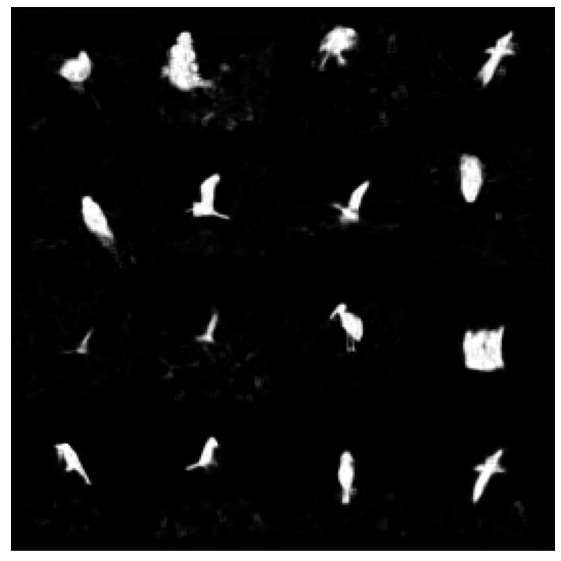

  0%|          | 0/17500 [00:00<?, ?it/s]

Epoch    11: reducing learning rate of group 0 to 3.1250e-09.
Learning rate = 0.01  for epoch:  3
EPOCH: 3


  0%|          | 4/17500 [00:00<1:47:13,  2.72it/s]

Train Epoch: 3 [0/280000 (0%)]	Loss: 0.035929
IOU : 0.8704805491990847


  3%|▎         | 503/17500 [00:25<13:49, 20.50it/s]

Train Epoch: 3 [1500/280000 (3%)]	Loss: 0.031993
IOU : 0.8723824575266693


  6%|▌         | 1004/17500 [00:49<13:17, 20.68it/s]

Train Epoch: 3 [3000/280000 (6%)]	Loss: 0.019206
IOU : 0.9043715846994536


  9%|▊         | 1505/17500 [01:14<13:10, 20.23it/s]

Train Epoch: 3 [4500/280000 (9%)]	Loss: 0.023090
IOU : 0.8946606858631168


 11%|█▏        | 2003/17500 [01:38<12:35, 20.50it/s]

Train Epoch: 3 [6000/280000 (11%)]	Loss: 0.034257
IOU : 0.8550302487116289


 14%|█▍        | 2504/17500 [02:03<12:07, 20.62it/s]

Train Epoch: 3 [7500/280000 (14%)]	Loss: 0.026936
IOU : 0.8778313605143943


 17%|█▋        | 3005/17500 [02:27<11:50, 20.39it/s]

Train Epoch: 3 [9000/280000 (17%)]	Loss: 0.030056
IOU : 0.8799818840579711


 20%|██        | 3503/17500 [02:52<11:30, 20.26it/s]

Train Epoch: 3 [10500/280000 (20%)]	Loss: 0.029548
IOU : 0.8679373723621511


 23%|██▎       | 4004/17500 [03:16<10:59, 20.48it/s]

Train Epoch: 3 [12000/280000 (23%)]	Loss: 0.032911
IOU : 0.8526615969581749


 26%|██▌       | 4505/17500 [03:41<10:41, 20.25it/s]

Train Epoch: 3 [13500/280000 (26%)]	Loss: 0.024484
IOU : 0.8917354175712838


 29%|██▊       | 5003/17500 [04:05<10:15, 20.32it/s]

Train Epoch: 3 [15000/280000 (29%)]	Loss: 0.026170
IOU : 0.8785340314136125


 31%|███▏      | 5504/17500 [04:30<09:41, 20.62it/s]

Train Epoch: 3 [16500/280000 (31%)]	Loss: 0.033867
IOU : 0.8507042253521127


 34%|███▍      | 6005/17500 [04:54<09:29, 20.17it/s]

Train Epoch: 3 [18000/280000 (34%)]	Loss: 0.034202
IOU : 0.8675220529270249


 37%|███▋      | 6503/17500 [05:19<09:06, 20.14it/s]

Train Epoch: 3 [19500/280000 (37%)]	Loss: 0.023717
IOU : 0.8765044479330194


 40%|████      | 7004/17500 [05:43<08:45, 19.97it/s]

Train Epoch: 3 [21000/280000 (40%)]	Loss: 0.043579
IOU : 0.829938900203666


 43%|████▎     | 7503/17500 [06:08<08:11, 20.34it/s]

Train Epoch: 3 [22500/280000 (43%)]	Loss: 0.025978
IOU : 0.8752646148835694


 46%|████▌     | 8004/17500 [06:32<07:47, 20.32it/s]

Train Epoch: 3 [24000/280000 (46%)]	Loss: 0.023324
IOU : 0.8920341135909998


 49%|████▊     | 8505/17500 [06:57<07:22, 20.32it/s]

Train Epoch: 3 [25500/280000 (49%)]	Loss: 0.043787
IOU : 0.8174496644295302


 51%|█████▏    | 9003/17500 [07:21<07:01, 20.14it/s]

Train Epoch: 3 [27000/280000 (51%)]	Loss: 0.021503
IOU : 0.8995983935742972


 54%|█████▍    | 9504/17500 [07:46<06:24, 20.80it/s]

Train Epoch: 3 [28500/280000 (54%)]	Loss: 0.032812
IOU : 0.856113874121077


 57%|█████▋    | 10005/17500 [08:10<06:12, 20.12it/s]

Train Epoch: 3 [30000/280000 (57%)]	Loss: 0.018961
IOU : 0.9036786060019361


 60%|██████    | 10503/17500 [08:35<05:45, 20.26it/s]

Train Epoch: 3 [31500/280000 (60%)]	Loss: 0.017170
IOU : 0.8888888888888888


 63%|██████▎   | 11004/17500 [08:59<05:14, 20.62it/s]

Train Epoch: 3 [33000/280000 (63%)]	Loss: 0.021208
IOU : 0.8757589911256423


 66%|██████▌   | 11505/17500 [09:24<04:56, 20.24it/s]

Train Epoch: 3 [34500/280000 (66%)]	Loss: 0.023443
IOU : 0.8823529411764706


 69%|██████▊   | 12003/17500 [09:48<04:29, 20.40it/s]

Train Epoch: 3 [36000/280000 (69%)]	Loss: 0.025619
IOU : 0.8676085818942961


 71%|███████▏  | 12504/17500 [10:13<04:04, 20.43it/s]

Train Epoch: 3 [37500/280000 (71%)]	Loss: 0.045178
IOU : 0.8285824345146379


 74%|███████▍  | 13005/17500 [10:37<03:41, 20.25it/s]

Train Epoch: 3 [39000/280000 (74%)]	Loss: 0.024522
IOU : 0.8751254768118851


 77%|███████▋  | 13503/17500 [11:02<03:15, 20.40it/s]

Train Epoch: 3 [40500/280000 (77%)]	Loss: 0.027360
IOU : 0.884272997032641


 80%|████████  | 14004/17500 [11:27<02:48, 20.80it/s]

Train Epoch: 3 [42000/280000 (80%)]	Loss: 0.018478
IOU : 0.9140681653372009


 83%|████████▎ | 14505/17500 [11:51<02:27, 20.28it/s]

Train Epoch: 3 [43500/280000 (83%)]	Loss: 0.026012
IOU : 0.8871667699938004


 86%|████████▌ | 15003/17500 [12:15<02:02, 20.35it/s]

Train Epoch: 3 [45000/280000 (86%)]	Loss: 0.029037
IOU : 0.8694658668951728


 89%|████████▊ | 15504/17500 [12:40<01:36, 20.71it/s]

Train Epoch: 3 [46500/280000 (89%)]	Loss: 0.018354
IOU : 0.896551724137931


 91%|█████████▏| 16004/17500 [13:04<01:12, 20.61it/s]

Train Epoch: 3 [48000/280000 (91%)]	Loss: 0.034593
IOU : 0.8372763993075591


 94%|█████████▍| 16505/17500 [13:29<00:49, 20.31it/s]

Train Epoch: 3 [49500/280000 (94%)]	Loss: 0.024821
IOU : 0.8818407960199005


 97%|█████████▋| 17003/17500 [13:53<00:24, 20.39it/s]

Train Epoch: 3 [51000/280000 (97%)]	Loss: 0.024529
IOU : 0.8857925993604385


100%|██████████| 17500/17500 [14:18<00:00, 20.39it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.054422580462684916


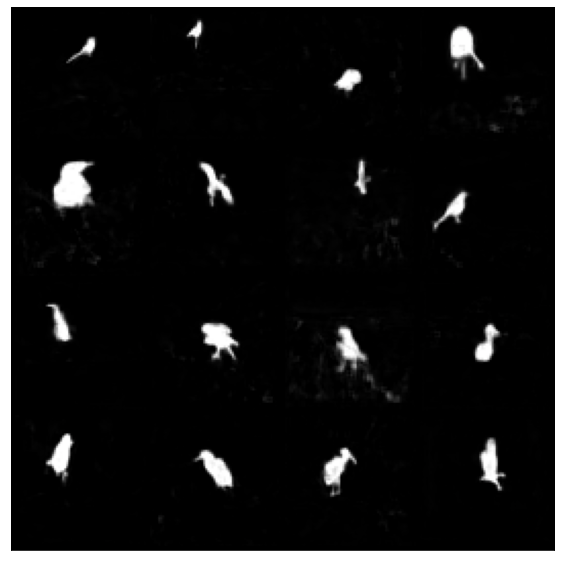

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


  0%|          | 4/17500 [00:00<1:39:56,  2.92it/s]

Train Epoch: 4 [0/280000 (0%)]	Loss: 0.033652
IOU : 0.8756243756243757


  3%|▎         | 504/17500 [00:25<14:02, 20.16it/s]

Train Epoch: 4 [1500/280000 (3%)]	Loss: 0.034131
IOU : 0.8601804123711341


  6%|▌         | 1005/17500 [00:49<13:29, 20.38it/s]

Train Epoch: 4 [3000/280000 (6%)]	Loss: 0.027356
IOU : 0.8669201520912547


  9%|▊         | 1503/17500 [01:14<13:07, 20.32it/s]

Train Epoch: 4 [4500/280000 (9%)]	Loss: 0.026129
IOU : 0.8811659192825112


 11%|█▏        | 2004/17500 [01:38<12:35, 20.51it/s]

Train Epoch: 4 [6000/280000 (11%)]	Loss: 0.027853
IOU : 0.8571428571428571


 14%|█▍        | 2505/17500 [02:03<12:13, 20.45it/s]

Train Epoch: 4 [7500/280000 (14%)]	Loss: 0.033581
IOU : 0.8743016759776536


 17%|█▋        | 3003/17500 [02:27<11:50, 20.41it/s]

Train Epoch: 4 [9000/280000 (17%)]	Loss: 0.021374
IOU : 0.9042215161143895


 20%|██        | 3504/17500 [02:52<11:16, 20.68it/s]

Train Epoch: 4 [10500/280000 (20%)]	Loss: 0.018371
IOU : 0.8961161387631976


 23%|██▎       | 4005/17500 [03:16<11:02, 20.38it/s]

Train Epoch: 4 [12000/280000 (23%)]	Loss: 0.025241
IOU : 0.8741110606748373


 26%|██▌       | 4503/17500 [03:41<10:37, 20.39it/s]

Train Epoch: 4 [13500/280000 (26%)]	Loss: 0.015918
IOU : 0.9000558347292016


 29%|██▊       | 5004/17500 [04:05<10:08, 20.53it/s]

Train Epoch: 4 [15000/280000 (29%)]	Loss: 0.018684
IOU : 0.9179936305732485


 31%|███▏      | 5505/17500 [04:30<09:47, 20.41it/s]

Train Epoch: 4 [16500/280000 (31%)]	Loss: 0.036823
IOU : 0.8542020774315392


 34%|███▍      | 6003/17500 [04:54<09:26, 20.31it/s]

Train Epoch: 4 [18000/280000 (34%)]	Loss: 0.034932
IOU : 0.8357380688124306


 37%|███▋      | 6504/17500 [05:19<08:56, 20.49it/s]

Train Epoch: 4 [19500/280000 (37%)]	Loss: 0.018651
IOU : 0.9023653749370911


 40%|████      | 7004/17500 [05:43<08:28, 20.66it/s]

Train Epoch: 4 [21000/280000 (40%)]	Loss: 0.019477
IOU : 0.9104518610081033


 43%|████▎     | 7505/17500 [06:08<08:13, 20.25it/s]

Train Epoch: 4 [22500/280000 (43%)]	Loss: 0.022809
IOU : 0.8906390639063907


 46%|████▌     | 8005/17500 [06:32<07:51, 20.12it/s]

Train Epoch: 4 [24000/280000 (46%)]	Loss: 0.025515
IOU : 0.8825757575757576


 49%|████▊     | 8503/17500 [06:57<07:22, 20.32it/s]

Train Epoch: 4 [25500/280000 (49%)]	Loss: 0.031371
IOU : 0.862895493767977


 51%|█████▏    | 9004/17500 [07:21<06:51, 20.62it/s]

Train Epoch: 4 [27000/280000 (51%)]	Loss: 0.020071
IOU : 0.9038415652588881


 54%|█████▍    | 9505/17500 [07:46<06:37, 20.09it/s]

Train Epoch: 4 [28500/280000 (54%)]	Loss: 0.022859
IOU : 0.8946796959826275


 57%|█████▋    | 10003/17500 [08:10<06:05, 20.53it/s]

Train Epoch: 4 [30000/280000 (57%)]	Loss: 0.024884
IOU : 0.8795201975657082


 60%|██████    | 10504/17500 [08:35<05:36, 20.81it/s]

Train Epoch: 4 [31500/280000 (60%)]	Loss: 0.022919
IOU : 0.8967489464178205


 63%|██████▎   | 11005/17500 [08:59<05:17, 20.43it/s]

Train Epoch: 4 [33000/280000 (63%)]	Loss: 0.027529
IOU : 0.8640576725025747


 66%|██████▌   | 11503/17500 [09:24<04:53, 20.44it/s]

Train Epoch: 4 [34500/280000 (66%)]	Loss: 0.022181
IOU : 0.888121546961326


 69%|██████▊   | 12004/17500 [09:48<04:25, 20.70it/s]

Train Epoch: 4 [36000/280000 (69%)]	Loss: 0.028021
IOU : 0.8753976670201484


 71%|███████▏  | 12505/17500 [10:13<04:04, 20.45it/s]

Train Epoch: 4 [37500/280000 (71%)]	Loss: 0.026758
IOU : 0.8748587114484095


 74%|███████▍  | 13003/17500 [10:37<03:43, 20.14it/s]

Train Epoch: 4 [39000/280000 (74%)]	Loss: 0.018197
IOU : 0.8999566912083153


 77%|███████▋  | 13504/17500 [11:02<03:14, 20.59it/s]

Train Epoch: 4 [40500/280000 (77%)]	Loss: 0.029106
IOU : 0.8635321100917431


 80%|████████  | 14005/17500 [11:26<02:50, 20.45it/s]

Train Epoch: 4 [42000/280000 (80%)]	Loss: 0.031963
IOU : 0.8697674418604651


 83%|████████▎ | 14503/17500 [11:51<02:26, 20.52it/s]

Train Epoch: 4 [43500/280000 (83%)]	Loss: 0.033399
IOU : 0.8603658536585366


 86%|████████▌ | 15004/17500 [12:15<02:01, 20.48it/s]

Train Epoch: 4 [45000/280000 (86%)]	Loss: 0.033074
IOU : 0.8421645997745209


 89%|████████▊ | 15505/17500 [12:40<01:38, 20.27it/s]

Train Epoch: 4 [46500/280000 (89%)]	Loss: 0.019399
IOU : 0.9113863744640305


 91%|█████████▏| 16003/17500 [13:04<01:13, 20.36it/s]

Train Epoch: 4 [48000/280000 (91%)]	Loss: 0.022914
IOU : 0.8976458546571137


 94%|█████████▍| 16504/17500 [13:29<00:48, 20.74it/s]

Train Epoch: 4 [49500/280000 (94%)]	Loss: 0.019324
IOU : 0.8996299722479186


 97%|█████████▋| 17005/17500 [13:53<00:24, 20.33it/s]

Train Epoch: 4 [51000/280000 (97%)]	Loss: 0.014763
IOU : 0.9136199276817999


100%|██████████| 17500/17500 [14:18<00:00, 20.39it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05483105879697509


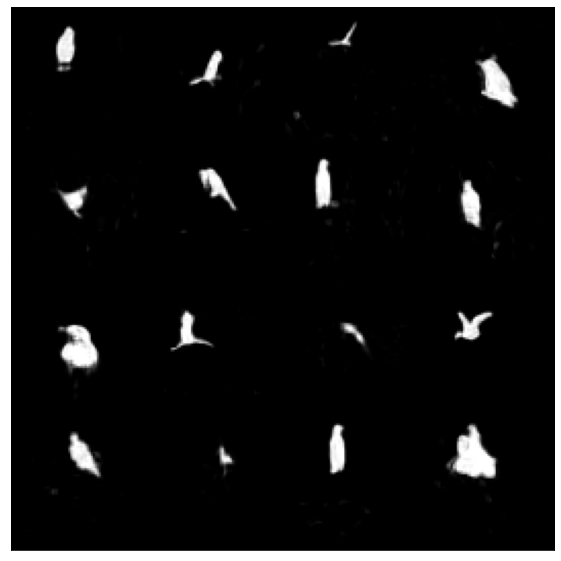

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


  0%|          | 4/17500 [00:00<1:46:38,  2.73it/s]

Train Epoch: 5 [0/280000 (0%)]	Loss: 0.020375
IOU : 0.8976307554760841


  3%|▎         | 505/17500 [00:25<13:53, 20.39it/s]

Train Epoch: 5 [1500/280000 (3%)]	Loss: 0.021737
IOU : 0.8775510204081632


  6%|▌         | 1003/17500 [00:49<13:27, 20.42it/s]

Train Epoch: 5 [3000/280000 (6%)]	Loss: 0.020283
IOU : 0.8972407231208372


  9%|▊         | 1503/17500 [01:14<13:07, 20.31it/s]

Train Epoch: 5 [4500/280000 (9%)]	Loss: 0.040615
IOU : 0.8122037914691943


 11%|█▏        | 2003/17500 [01:38<12:45, 20.25it/s]

Train Epoch: 5 [6000/280000 (11%)]	Loss: 0.027022
IOU : 0.885478158205431


 14%|█▍        | 2504/17500 [02:03<12:13, 20.44it/s]

Train Epoch: 5 [7500/280000 (14%)]	Loss: 0.018262
IOU : 0.9065363469761759


 17%|█▋        | 3004/17500 [02:28<11:49, 20.42it/s]

Train Epoch: 5 [9000/280000 (17%)]	Loss: 0.029109
IOU : 0.8610412231468938


 20%|██        | 3505/17500 [02:52<11:32, 20.21it/s]

Train Epoch: 5 [10500/280000 (20%)]	Loss: 0.022979
IOU : 0.8771551724137931


 23%|██▎       | 4003/17500 [03:17<10:58, 20.49it/s]

Train Epoch: 5 [12000/280000 (23%)]	Loss: 0.017101
IOU : 0.8983218163869694


 26%|██▌       | 4504/17500 [03:41<10:24, 20.80it/s]

Train Epoch: 5 [13500/280000 (26%)]	Loss: 0.025413
IOU : 0.8627752176139273


 29%|██▊       | 5005/17500 [04:06<10:12, 20.41it/s]

Train Epoch: 5 [15000/280000 (29%)]	Loss: 0.022250
IOU : 0.898726011933559


 31%|███▏      | 5504/17500 [04:30<09:47, 20.40it/s]

Train Epoch: 5 [16500/280000 (31%)]	Loss: 0.029304
IOU : 0.865478841870824


 34%|███▍      | 6005/17500 [04:55<09:24, 20.35it/s]

Train Epoch: 5 [18000/280000 (34%)]	Loss: 0.021185
IOU : 0.8836257309941521


 37%|███▋      | 6503/17500 [05:19<08:58, 20.42it/s]

Train Epoch: 5 [19500/280000 (37%)]	Loss: 0.033076
IOU : 0.8310454065469906


 40%|████      | 7004/17500 [05:44<08:37, 20.30it/s]

Train Epoch: 5 [21000/280000 (40%)]	Loss: 0.028947
IOU : 0.8648998060762767


 43%|████▎     | 7505/17500 [06:08<08:12, 20.28it/s]

Train Epoch: 5 [22500/280000 (43%)]	Loss: 0.026624
IOU : 0.8712984054669703


 46%|████▌     | 8003/17500 [06:33<07:47, 20.30it/s]

Train Epoch: 5 [24000/280000 (46%)]	Loss: 0.025022
IOU : 0.8749292586304471


 49%|████▊     | 8504/17500 [06:58<07:24, 20.24it/s]

Train Epoch: 5 [25500/280000 (49%)]	Loss: 0.019236
IOU : 0.9025821596244131


 51%|█████▏    | 9005/17500 [07:22<06:55, 20.44it/s]

Train Epoch: 5 [27000/280000 (51%)]	Loss: 0.014470
IOU : 0.9142146705346043


 54%|█████▍    | 9503/17500 [07:47<06:32, 20.38it/s]

Train Epoch: 5 [28500/280000 (54%)]	Loss: 0.020189
IOU : 0.8927929400228796


 57%|█████▋    | 10004/17500 [08:11<06:10, 20.23it/s]

Train Epoch: 5 [30000/280000 (57%)]	Loss: 0.031826
IOU : 0.8656878738444806


 60%|██████    | 10505/17500 [08:36<05:41, 20.46it/s]

Train Epoch: 5 [31500/280000 (60%)]	Loss: 0.020865
IOU : 0.8882608695652174


 63%|██████▎   | 11003/17500 [09:00<05:16, 20.52it/s]

Train Epoch: 5 [33000/280000 (63%)]	Loss: 0.027904
IOU : 0.8701560140915954


 66%|██████▌   | 11504/17500 [09:25<04:51, 20.56it/s]

Train Epoch: 5 [34500/280000 (66%)]	Loss: 0.021079
IOU : 0.8872909176176332


 69%|██████▊   | 12005/17500 [09:49<04:29, 20.39it/s]

Train Epoch: 5 [36000/280000 (69%)]	Loss: 0.027238
IOU : 0.8743226708617374


 71%|███████▏  | 12503/17500 [10:13<04:04, 20.41it/s]

Train Epoch: 5 [37500/280000 (71%)]	Loss: 0.015965
IOU : 0.9087174806024646


 74%|███████▍  | 13004/17500 [10:38<03:38, 20.56it/s]

Train Epoch: 5 [39000/280000 (74%)]	Loss: 0.024291
IOU : 0.876252369347414


 77%|███████▋  | 13505/17500 [11:03<03:14, 20.59it/s]

Train Epoch: 5 [40500/280000 (77%)]	Loss: 0.030004
IOU : 0.8558139534883721


 80%|████████  | 14004/17500 [11:27<02:48, 20.72it/s]

Train Epoch: 5 [42000/280000 (80%)]	Loss: 0.031032
IOU : 0.8622346816179415


 83%|████████▎ | 14505/17500 [11:52<02:25, 20.61it/s]

Train Epoch: 5 [43500/280000 (83%)]	Loss: 0.024510
IOU : 0.8729573010015814


 86%|████████▌ | 15003/17500 [12:16<02:04, 20.07it/s]

Train Epoch: 5 [45000/280000 (86%)]	Loss: 0.028949
IOU : 0.8526130358191427


 89%|████████▊ | 15504/17500 [12:41<01:37, 20.53it/s]

Train Epoch: 5 [46500/280000 (89%)]	Loss: 0.017559
IOU : 0.9053497942386831


 91%|█████████▏| 16005/17500 [13:05<01:13, 20.24it/s]

Train Epoch: 5 [48000/280000 (91%)]	Loss: 0.018602
IOU : 0.9056764831412719


 94%|█████████▍| 16503/17500 [13:30<00:49, 20.25it/s]

Train Epoch: 5 [49500/280000 (94%)]	Loss: 0.028098
IOU : 0.8644161593801881


 97%|█████████▋| 17004/17500 [13:54<00:24, 20.36it/s]

Train Epoch: 5 [51000/280000 (97%)]	Loss: 0.034503
IOU : 0.8497041420118343


100%|██████████| 17500/17500 [14:19<00:00, 20.37it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05512220813573515


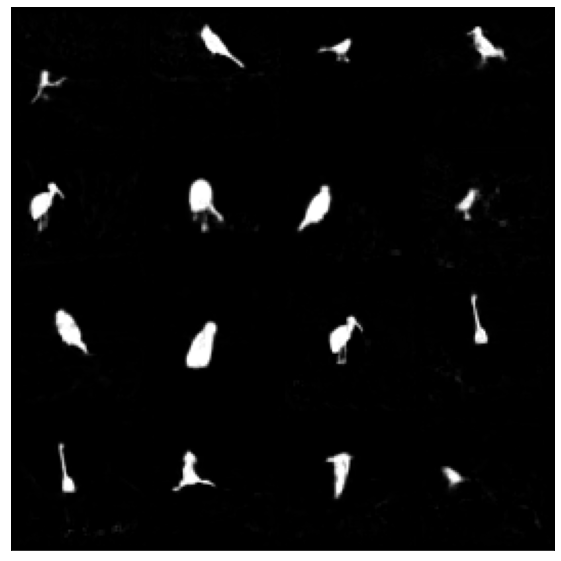

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  6
EPOCH: 6


  0%|          | 4/17500 [00:00<1:46:36,  2.74it/s]

Train Epoch: 6 [0/280000 (0%)]	Loss: 0.019560
IOU : 0.904921165790731


  3%|▎         | 505/17500 [00:25<13:54, 20.37it/s]

Train Epoch: 6 [1500/280000 (3%)]	Loss: 0.018005
IOU : 0.9133154602323503


  6%|▌         | 1003/17500 [00:49<13:25, 20.47it/s]

Train Epoch: 6 [3000/280000 (6%)]	Loss: 0.027375
IOU : 0.8587623996221068


  9%|▊         | 1504/17500 [01:14<13:12, 20.19it/s]

Train Epoch: 6 [4500/280000 (9%)]	Loss: 0.023674
IOU : 0.8865016347501168


 11%|█▏        | 2005/17500 [01:38<12:41, 20.34it/s]

Train Epoch: 6 [6000/280000 (11%)]	Loss: 0.024261
IOU : 0.8926937269372693


 14%|█▍        | 2503/17500 [02:03<12:22, 20.20it/s]

Train Epoch: 6 [7500/280000 (14%)]	Loss: 0.024097
IOU : 0.8914074855034264


 17%|█▋        | 3004/17500 [02:27<11:44, 20.57it/s]

Train Epoch: 6 [9000/280000 (17%)]	Loss: 0.018350
IOU : 0.9131501472031404


 20%|██        | 3505/17500 [02:52<11:31, 20.23it/s]

Train Epoch: 6 [10500/280000 (20%)]	Loss: 0.019313
IOU : 0.8733333333333333


 23%|██▎       | 4003/17500 [03:16<11:06, 20.27it/s]

Train Epoch: 6 [12000/280000 (23%)]	Loss: 0.012409
IOU : 0.9270927092709271


 26%|██▌       | 4504/17500 [03:41<10:34, 20.49it/s]

Train Epoch: 6 [13500/280000 (26%)]	Loss: 0.029106
IOU : 0.8243243243243243


 29%|██▊       | 5005/17500 [04:06<10:19, 20.17it/s]

Train Epoch: 6 [15000/280000 (29%)]	Loss: 0.026683
IOU : 0.8758731864588931


 31%|███▏      | 5503/17500 [04:30<09:47, 20.41it/s]

Train Epoch: 6 [16500/280000 (31%)]	Loss: 0.022736
IOU : 0.8835376532399299


 34%|███▍      | 6003/17500 [04:55<09:31, 20.11it/s]

Train Epoch: 6 [18000/280000 (34%)]	Loss: 0.025635
IOU : 0.8772087451332734


 37%|███▋      | 6504/17500 [05:19<08:59, 20.36it/s]

Train Epoch: 6 [19500/280000 (37%)]	Loss: 0.025290
IOU : 0.8689963564094071


 40%|████      | 7005/17500 [05:44<08:39, 20.20it/s]

Train Epoch: 6 [21000/280000 (40%)]	Loss: 0.016156
IOU : 0.9105805243445693


 43%|████▎     | 7503/17500 [06:08<08:08, 20.48it/s]

Train Epoch: 6 [22500/280000 (43%)]	Loss: 0.032616
IOU : 0.8572149344096872


 46%|████▌     | 8004/17500 [06:33<07:45, 20.41it/s]

Train Epoch: 6 [24000/280000 (46%)]	Loss: 0.012549
IOU : 0.9301745635910225


 49%|████▊     | 8505/17500 [06:58<07:28, 20.08it/s]

Train Epoch: 6 [25500/280000 (49%)]	Loss: 0.025367
IOU : 0.8683894230769231


 51%|█████▏    | 9003/17500 [07:22<06:59, 20.26it/s]

Train Epoch: 6 [27000/280000 (51%)]	Loss: 0.031889
IOU : 0.8524618585298197


 54%|█████▍    | 9504/17500 [07:47<06:34, 20.27it/s]

Train Epoch: 6 [28500/280000 (54%)]	Loss: 0.025207
IOU : 0.8668197474167624


 57%|█████▋    | 10003/17500 [08:11<06:05, 20.51it/s]

Train Epoch: 6 [30000/280000 (57%)]	Loss: 0.017204
IOU : 0.9145081599041772


 60%|██████    | 10504/17500 [08:36<05:43, 20.35it/s]

Train Epoch: 6 [31500/280000 (60%)]	Loss: 0.021457
IOU : 0.8972198820556023


 63%|██████▎   | 11005/17500 [09:00<05:29, 19.70it/s]

Train Epoch: 6 [33000/280000 (63%)]	Loss: 0.024372
IOU : 0.8815350389321468


 66%|██████▌   | 11503/17500 [09:25<04:52, 20.47it/s]

Train Epoch: 6 [34500/280000 (66%)]	Loss: 0.020507
IOU : 0.8886532343584306


 69%|██████▊   | 12004/17500 [09:49<04:27, 20.53it/s]

Train Epoch: 6 [36000/280000 (69%)]	Loss: 0.018598
IOU : 0.9051136363636364


 71%|███████▏  | 12504/17500 [10:14<04:05, 20.31it/s]

Train Epoch: 6 [37500/280000 (71%)]	Loss: 0.029797
IOU : 0.8590235874931432


 74%|███████▍  | 13005/17500 [10:38<03:41, 20.29it/s]

Train Epoch: 6 [39000/280000 (74%)]	Loss: 0.020201
IOU : 0.8945868945868946


 77%|███████▋  | 13503/17500 [11:03<03:15, 20.50it/s]

Train Epoch: 6 [40500/280000 (77%)]	Loss: 0.024869
IOU : 0.8775322283609577


 80%|████████  | 14003/17500 [11:27<02:52, 20.25it/s]

Train Epoch: 6 [42000/280000 (80%)]	Loss: 0.019521
IOU : 0.8920863309352518


 83%|████████▎ | 14504/17500 [11:52<02:25, 20.61it/s]

Train Epoch: 6 [43500/280000 (83%)]	Loss: 0.025034
IOU : 0.8859093125304729


 86%|████████▌ | 15005/17500 [12:17<02:03, 20.19it/s]

Train Epoch: 6 [45000/280000 (86%)]	Loss: 0.022516
IOU : 0.8701449275362318


 89%|████████▊ | 15505/17500 [12:41<01:37, 20.57it/s]

Train Epoch: 6 [46500/280000 (89%)]	Loss: 0.013658
IOU : 0.9221876389506447


 91%|█████████▏| 16003/17500 [13:06<01:13, 20.24it/s]

Train Epoch: 6 [48000/280000 (91%)]	Loss: 0.016574
IOU : 0.9218830832902225


 94%|█████████▍| 16504/17500 [13:30<00:48, 20.55it/s]

Train Epoch: 6 [49500/280000 (94%)]	Loss: 0.030008
IOU : 0.8712389380530974


 97%|█████████▋| 17005/17500 [13:55<00:24, 20.46it/s]

Train Epoch: 6 [51000/280000 (97%)]	Loss: 0.029960
IOU : 0.8689458689458689


100%|██████████| 17500/17500 [14:19<00:00, 20.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05534926434568481


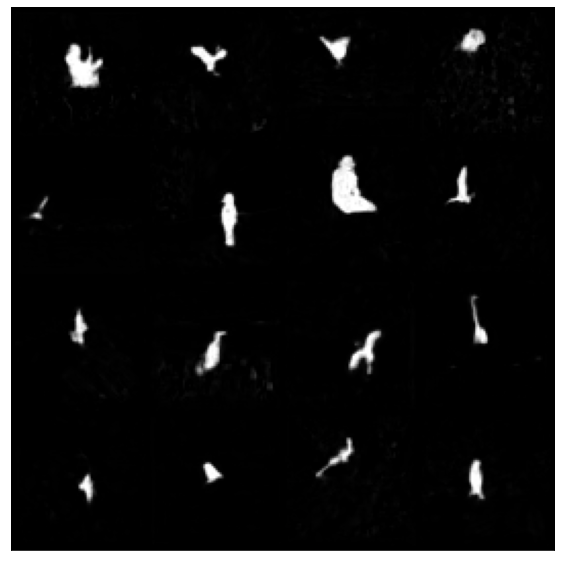

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


  0%|          | 4/17500 [00:00<1:46:28,  2.74it/s]

Train Epoch: 7 [0/280000 (0%)]	Loss: 0.028798
IOU : 0.857190357439734


  3%|▎         | 504/17500 [00:25<13:53, 20.40it/s]

Train Epoch: 7 [1500/280000 (3%)]	Loss: 0.013349
IOU : 0.9145220588235294


  6%|▌         | 1005/17500 [00:49<13:30, 20.36it/s]

Train Epoch: 7 [3000/280000 (6%)]	Loss: 0.020182
IOU : 0.8894865525672372


  9%|▊         | 1503/17500 [01:14<13:08, 20.28it/s]

Train Epoch: 7 [4500/280000 (9%)]	Loss: 0.020664
IOU : 0.8954703832752613


 11%|█▏        | 2004/17500 [01:38<12:37, 20.46it/s]

Train Epoch: 7 [6000/280000 (11%)]	Loss: 0.026253
IOU : 0.8691187739463602


 14%|█▍        | 2505/17500 [02:03<12:13, 20.45it/s]

Train Epoch: 7 [7500/280000 (14%)]	Loss: 0.035506
IOU : 0.8318729463307777


 17%|█▋        | 3003/17500 [02:27<11:48, 20.46it/s]

Train Epoch: 7 [9000/280000 (17%)]	Loss: 0.014927
IOU : 0.9072821329088738


 20%|██        | 3503/17500 [02:52<11:29, 20.30it/s]

Train Epoch: 7 [10500/280000 (20%)]	Loss: 0.014241
IOU : 0.9188955996548749


 23%|██▎       | 4004/17500 [03:16<11:04, 20.32it/s]

Train Epoch: 7 [12000/280000 (23%)]	Loss: 0.016276
IOU : 0.9079816980172852


 26%|██▌       | 4505/17500 [03:41<10:39, 20.32it/s]

Train Epoch: 7 [13500/280000 (26%)]	Loss: 0.034499
IOU : 0.8545353982300885


 29%|██▊       | 5003/17500 [04:05<10:10, 20.46it/s]

Train Epoch: 7 [15000/280000 (29%)]	Loss: 0.027106
IOU : 0.8831099195710456


 31%|███▏      | 5504/17500 [04:30<09:47, 20.41it/s]

Train Epoch: 7 [16500/280000 (31%)]	Loss: 0.016699
IOU : 0.9036628198695434


 34%|███▍      | 6003/17500 [04:54<09:28, 20.24it/s]

Train Epoch: 7 [18000/280000 (34%)]	Loss: 0.029630
IOU : 0.8595628415300547


 37%|███▋      | 6504/17500 [05:19<09:03, 20.24it/s]

Train Epoch: 7 [19500/280000 (37%)]	Loss: 0.024202
IOU : 0.8689384010484927


 40%|████      | 7005/17500 [05:43<08:34, 20.40it/s]

Train Epoch: 7 [21000/280000 (40%)]	Loss: 0.018994
IOU : 0.8951881848499286


 43%|████▎     | 7503/17500 [06:08<08:14, 20.23it/s]

Train Epoch: 7 [22500/280000 (43%)]	Loss: 0.017438
IOU : 0.8990338164251208


 46%|████▌     | 8004/17500 [06:32<07:42, 20.54it/s]

Train Epoch: 7 [24000/280000 (46%)]	Loss: 0.017730
IOU : 0.9035769828926905


 49%|████▊     | 8505/17500 [06:57<07:21, 20.35it/s]

Train Epoch: 7 [25500/280000 (49%)]	Loss: 0.023175
IOU : 0.8736979166666666


 51%|█████▏    | 9003/17500 [07:22<06:55, 20.44it/s]

Train Epoch: 7 [27000/280000 (51%)]	Loss: 0.024347
IOU : 0.8868005126014523


 54%|█████▍    | 9504/17500 [07:46<06:27, 20.65it/s]

Train Epoch: 7 [28500/280000 (54%)]	Loss: 0.029398
IOU : 0.8626985576045281


 57%|█████▋    | 10005/17500 [08:11<06:10, 20.21it/s]

Train Epoch: 7 [30000/280000 (57%)]	Loss: 0.023106
IOU : 0.8642169728783902


 60%|██████    | 10503/17500 [08:35<05:47, 20.16it/s]

Train Epoch: 7 [31500/280000 (60%)]	Loss: 0.025090
IOU : 0.8751800288046088


 63%|██████▎   | 11004/17500 [09:00<05:14, 20.64it/s]

Train Epoch: 7 [33000/280000 (63%)]	Loss: 0.019641
IOU : 0.891670459717797


 66%|██████▌   | 11505/17500 [09:24<04:55, 20.26it/s]

Train Epoch: 7 [34500/280000 (66%)]	Loss: 0.017362
IOU : 0.9057826520438684


 69%|██████▊   | 12003/17500 [09:49<04:31, 20.22it/s]

Train Epoch: 7 [36000/280000 (69%)]	Loss: 0.013882
IOU : 0.9150240911081909


 71%|███████▏  | 12503/17500 [10:13<04:05, 20.32it/s]

Train Epoch: 7 [37500/280000 (71%)]	Loss: 0.025905
IOU : 0.86685419596812


 74%|███████▍  | 13004/17500 [10:38<03:41, 20.27it/s]

Train Epoch: 7 [39000/280000 (74%)]	Loss: 0.028830
IOU : 0.8653569717297557


 77%|███████▋  | 13505/17500 [11:03<03:16, 20.31it/s]

Train Epoch: 7 [40500/280000 (77%)]	Loss: 0.018752
IOU : 0.8896090743366417


 80%|████████  | 14003/17500 [11:27<02:51, 20.43it/s]

Train Epoch: 7 [42000/280000 (80%)]	Loss: 0.023452
IOU : 0.88671875


 83%|████████▎ | 14504/17500 [11:52<02:25, 20.57it/s]

Train Epoch: 7 [43500/280000 (83%)]	Loss: 0.016953
IOU : 0.9101463907117617


 86%|████████▌ | 15005/17500 [12:16<02:02, 20.43it/s]

Train Epoch: 7 [45000/280000 (86%)]	Loss: 0.021629
IOU : 0.8977685521536066


 89%|████████▊ | 15503/17500 [12:41<01:38, 20.32it/s]

Train Epoch: 7 [46500/280000 (89%)]	Loss: 0.016817
IOU : 0.9009463722397476


 91%|█████████▏| 16003/17500 [13:05<01:13, 20.24it/s]

Train Epoch: 7 [48000/280000 (91%)]	Loss: 0.015097
IOU : 0.911864406779661


 94%|█████████▍| 16504/17500 [13:30<00:48, 20.74it/s]

Train Epoch: 7 [49500/280000 (94%)]	Loss: 0.027409
IOU : 0.8676616915422886


 97%|█████████▋| 17004/17500 [13:54<00:24, 20.39it/s]

Train Epoch: 7 [51000/280000 (97%)]	Loss: 0.017852
IOU : 0.9056999161777033


100%|██████████| 17500/17500 [14:19<00:00, 20.36it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.055528063268731116


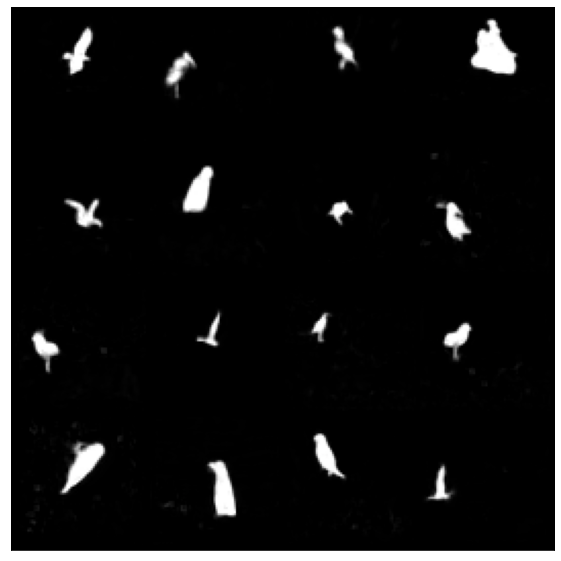

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


  0%|          | 4/17500 [00:00<1:50:43,  2.63it/s]

Train Epoch: 8 [0/280000 (0%)]	Loss: 0.032201
IOU : 0.8697214734950584


  3%|▎         | 503/17500 [00:25<14:02, 20.17it/s]

Train Epoch: 8 [1500/280000 (3%)]	Loss: 0.020040
IOU : 0.8929398148148148


  6%|▌         | 1004/17500 [00:49<13:17, 20.69it/s]

Train Epoch: 8 [3000/280000 (6%)]	Loss: 0.018137
IOU : 0.8982814677194613


  9%|▊         | 1504/17500 [01:14<12:55, 20.64it/s]

Train Epoch: 8 [4500/280000 (9%)]	Loss: 0.024211
IOU : 0.8656280428432327


 11%|█▏        | 2005/17500 [01:38<12:47, 20.20it/s]

Train Epoch: 8 [6000/280000 (11%)]	Loss: 0.017120
IOU : 0.9114441416893733


 14%|█▍        | 2503/17500 [02:03<12:14, 20.42it/s]

Train Epoch: 8 [7500/280000 (14%)]	Loss: 0.028613
IOU : 0.874274661508704


 17%|█▋        | 3004/17500 [02:27<11:47, 20.50it/s]

Train Epoch: 8 [9000/280000 (17%)]	Loss: 0.020059
IOU : 0.8997357808371576


 20%|██        | 3505/17500 [02:52<11:25, 20.43it/s]

Train Epoch: 8 [10500/280000 (20%)]	Loss: 0.019748
IOU : 0.9056603773584906


 23%|██▎       | 4003/17500 [03:17<10:59, 20.46it/s]

Train Epoch: 8 [12000/280000 (23%)]	Loss: 0.013581
IOU : 0.910492505353319


 26%|██▌       | 4504/17500 [03:41<10:31, 20.58it/s]

Train Epoch: 8 [13500/280000 (26%)]	Loss: 0.012975
IOU : 0.9293333333333333


 29%|██▊       | 5005/17500 [04:06<10:10, 20.45it/s]

Train Epoch: 8 [15000/280000 (29%)]	Loss: 0.016884
IOU : 0.9074383231311445


 31%|███▏      | 5503/17500 [04:30<09:47, 20.41it/s]

Train Epoch: 8 [16500/280000 (31%)]	Loss: 0.021076
IOU : 0.8816996619990343


 34%|███▍      | 6004/17500 [04:55<09:20, 20.51it/s]

Train Epoch: 8 [18000/280000 (34%)]	Loss: 0.032983
IOU : 0.8502024291497976


 37%|███▋      | 6505/17500 [05:19<09:02, 20.26it/s]

Train Epoch: 8 [19500/280000 (37%)]	Loss: 0.019046
IOU : 0.8947600176133862


 40%|████      | 7003/17500 [05:44<08:40, 20.18it/s]

Train Epoch: 8 [21000/280000 (40%)]	Loss: 0.018753
IOU : 0.9044585987261147


 43%|████▎     | 7504/17500 [06:09<08:06, 20.57it/s]

Train Epoch: 8 [22500/280000 (43%)]	Loss: 0.017928
IOU : 0.8944698122780315


 46%|████▌     | 8004/17500 [06:33<07:44, 20.45it/s]

Train Epoch: 8 [24000/280000 (46%)]	Loss: 0.015968
IOU : 0.903954802259887


 49%|████▊     | 8505/17500 [06:58<07:26, 20.13it/s]

Train Epoch: 8 [25500/280000 (49%)]	Loss: 0.021110
IOU : 0.88765359859567


 51%|█████▏    | 9005/17500 [07:22<07:02, 20.13it/s]

Train Epoch: 8 [27000/280000 (51%)]	Loss: 0.019539
IOU : 0.8788221970554927


 54%|█████▍    | 9505/17500 [07:47<06:31, 20.42it/s]

Train Epoch: 8 [28500/280000 (54%)]	Loss: 0.015638
IOU : 0.9212690951821386


 57%|█████▋    | 10003/17500 [08:11<06:07, 20.38it/s]

Train Epoch: 8 [30000/280000 (57%)]	Loss: 0.017111
IOU : 0.894426823742637


 60%|██████    | 10504/17500 [08:36<05:40, 20.52it/s]

Train Epoch: 8 [31500/280000 (60%)]	Loss: 0.035945
IOU : 0.8425732217573222


 63%|██████▎   | 11005/17500 [09:01<05:19, 20.31it/s]

Train Epoch: 8 [33000/280000 (63%)]	Loss: 0.012049
IOU : 0.9235955056179775


 66%|██████▌   | 11503/17500 [09:25<04:54, 20.36it/s]

Train Epoch: 8 [34500/280000 (66%)]	Loss: 0.023706
IOU : 0.8812401471361009


 69%|██████▊   | 12004/17500 [09:50<04:34, 20.03it/s]

Train Epoch: 8 [36000/280000 (69%)]	Loss: 0.020372
IOU : 0.8962655601659751


 71%|███████▏  | 12505/17500 [10:14<04:04, 20.43it/s]

Train Epoch: 8 [37500/280000 (71%)]	Loss: 0.013224
IOU : 0.923042304230423


 74%|███████▍  | 13003/17500 [10:39<03:39, 20.48it/s]

Train Epoch: 8 [39000/280000 (74%)]	Loss: 0.015479
IOU : 0.9216175736395407


 77%|███████▋  | 13504/17500 [11:03<03:17, 20.25it/s]

Train Epoch: 8 [40500/280000 (77%)]	Loss: 0.030914
IOU : 0.8692777212614445


 80%|████████  | 14004/17500 [11:28<02:49, 20.62it/s]

Train Epoch: 8 [42000/280000 (80%)]	Loss: 0.030297
IOU : 0.8509110988404197


 83%|████████▎ | 14505/17500 [11:53<02:26, 20.43it/s]

Train Epoch: 8 [43500/280000 (83%)]	Loss: 0.022905
IOU : 0.8820704375667022


 86%|████████▌ | 15003/17500 [12:17<02:01, 20.59it/s]

Train Epoch: 8 [45000/280000 (86%)]	Loss: 0.015184
IOU : 0.9077265147304058


 89%|████████▊ | 15504/17500 [12:42<01:37, 20.52it/s]

Train Epoch: 8 [46500/280000 (89%)]	Loss: 0.020574
IOU : 0.8847276264591439


 91%|█████████▏| 16005/17500 [13:06<01:13, 20.36it/s]

Train Epoch: 8 [48000/280000 (91%)]	Loss: 0.015035
IOU : 0.9134284308903099


 94%|█████████▍| 16503/17500 [13:31<00:48, 20.41it/s]

Train Epoch: 8 [49500/280000 (94%)]	Loss: 0.015966
IOU : 0.907920792079208


 97%|█████████▋| 17004/17500 [13:55<00:24, 20.40it/s]

Train Epoch: 8 [51000/280000 (97%)]	Loss: 0.017204
IOU : 0.901458019105078


100%|██████████| 17500/17500 [14:19<00:00, 20.35it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05566252111299489


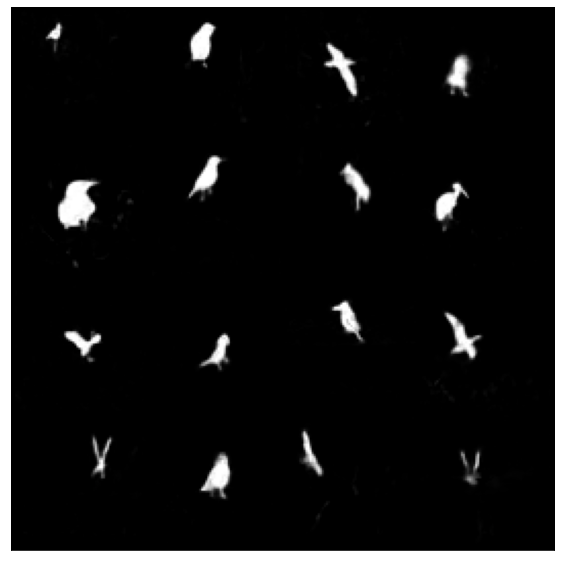

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


  0%|          | 3/17500 [00:00<1:42:14,  2.85it/s]

Train Epoch: 9 [0/280000 (0%)]	Loss: 0.027632
IOU : 0.8526483472720032


  3%|▎         | 505/17500 [00:25<14:20, 19.76it/s]

Train Epoch: 9 [1500/280000 (3%)]	Loss: 0.031405
IOU : 0.8381336405529954


  6%|▌         | 1003/17500 [00:49<13:36, 20.21it/s]

Train Epoch: 9 [3000/280000 (6%)]	Loss: 0.031710
IOU : 0.8616274266831888


  9%|▊         | 1504/17500 [01:14<12:57, 20.57it/s]

Train Epoch: 9 [4500/280000 (9%)]	Loss: 0.022974
IOU : 0.8986175115207373


 11%|█▏        | 2005/17500 [01:38<12:49, 20.15it/s]

Train Epoch: 9 [6000/280000 (11%)]	Loss: 0.050374
IOU : 0.8226950354609929


 14%|█▍        | 2503/17500 [02:03<12:10, 20.54it/s]

Train Epoch: 9 [7500/280000 (14%)]	Loss: 0.021695
IOU : 0.8852157943067034


 17%|█▋        | 3004/17500 [02:27<11:51, 20.37it/s]

Train Epoch: 9 [9000/280000 (17%)]	Loss: 0.022849
IOU : 0.8882624295233214


 20%|██        | 3505/17500 [02:52<11:22, 20.50it/s]

Train Epoch: 9 [10500/280000 (20%)]	Loss: 0.018390
IOU : 0.9027355623100304


 23%|██▎       | 4003/17500 [03:16<11:02, 20.37it/s]

Train Epoch: 9 [12000/280000 (23%)]	Loss: 0.012413
IOU : 0.9272097053726169


 26%|██▌       | 4504/17500 [03:41<10:37, 20.39it/s]

Train Epoch: 9 [13500/280000 (26%)]	Loss: 0.028966
IOU : 0.8547008547008547


 29%|██▊       | 5003/17500 [04:05<10:13, 20.36it/s]

Train Epoch: 9 [15000/280000 (29%)]	Loss: 0.015961
IOU : 0.8886756238003839


 31%|███▏      | 5504/17500 [04:30<09:52, 20.26it/s]

Train Epoch: 9 [16500/280000 (31%)]	Loss: 0.015528
IOU : 0.9173958697934896


 34%|███▍      | 6004/17500 [04:54<09:16, 20.65it/s]

Train Epoch: 9 [18000/280000 (34%)]	Loss: 0.027391
IOU : 0.8591989987484355


 37%|███▋      | 6504/17500 [05:19<08:52, 20.64it/s]

Train Epoch: 9 [19500/280000 (37%)]	Loss: 0.019094
IOU : 0.8874528809908454


 40%|████      | 7004/17500 [05:43<08:31, 20.51it/s]

Train Epoch: 9 [21000/280000 (40%)]	Loss: 0.016813
IOU : 0.9123595505617977


 43%|████▎     | 7505/17500 [06:08<08:16, 20.14it/s]

Train Epoch: 9 [22500/280000 (43%)]	Loss: 0.015914
IOU : 0.912672623883022


 46%|████▌     | 8003/17500 [06:32<07:43, 20.47it/s]

Train Epoch: 9 [24000/280000 (46%)]	Loss: 0.020159
IOU : 0.9001135073779796


 49%|████▊     | 8504/17500 [06:57<07:14, 20.71it/s]

Train Epoch: 9 [25500/280000 (49%)]	Loss: 0.019259
IOU : 0.8930704898446834


 51%|█████▏    | 9005/17500 [07:21<06:58, 20.32it/s]

Train Epoch: 9 [27000/280000 (51%)]	Loss: 0.021996
IOU : 0.8998282770463651


 54%|█████▍    | 9503/17500 [07:46<06:32, 20.40it/s]

Train Epoch: 9 [28500/280000 (54%)]	Loss: 0.023497
IOU : 0.8819047619047619


 57%|█████▋    | 10003/17500 [08:10<06:04, 20.58it/s]

Train Epoch: 9 [30000/280000 (57%)]	Loss: 0.034783
IOU : 0.8483483483483484


 60%|██████    | 10504/17500 [08:35<05:41, 20.50it/s]

Train Epoch: 9 [31500/280000 (60%)]	Loss: 0.029621
IOU : 0.8552915766738661


 63%|██████▎   | 11004/17500 [08:59<05:15, 20.56it/s]

Train Epoch: 9 [33000/280000 (63%)]	Loss: 0.024908
IOU : 0.8812984496124031


 66%|██████▌   | 11505/17500 [09:24<04:52, 20.50it/s]

Train Epoch: 9 [34500/280000 (66%)]	Loss: 0.027465
IOU : 0.8544176706827309


 69%|██████▊   | 12003/17500 [09:48<04:31, 20.28it/s]

Train Epoch: 9 [36000/280000 (69%)]	Loss: 0.019004
IOU : 0.8923594425756848


 71%|███████▏  | 12504/17500 [10:13<04:03, 20.52it/s]

Train Epoch: 9 [37500/280000 (71%)]	Loss: 0.024971
IOU : 0.8758104738154614


 74%|███████▍  | 13004/17500 [10:37<03:39, 20.50it/s]

Train Epoch: 9 [39000/280000 (74%)]	Loss: 0.024184
IOU : 0.8773841961852861


 77%|███████▋  | 13505/17500 [11:02<03:18, 20.12it/s]

Train Epoch: 9 [40500/280000 (77%)]	Loss: 0.023712
IOU : 0.8864452423698385


 80%|████████  | 14003/17500 [11:26<02:52, 20.28it/s]

Train Epoch: 9 [42000/280000 (80%)]	Loss: 0.023546
IOU : 0.8803245436105477


 83%|████████▎ | 14504/17500 [11:51<02:25, 20.59it/s]

Train Epoch: 9 [43500/280000 (83%)]	Loss: 0.013900
IOU : 0.9070945945945946


 86%|████████▌ | 15005/17500 [12:15<02:02, 20.36it/s]

Train Epoch: 9 [45000/280000 (86%)]	Loss: 0.021697
IOU : 0.8725135623869801


 89%|████████▊ | 15503/17500 [12:40<01:38, 20.29it/s]

Train Epoch: 9 [46500/280000 (89%)]	Loss: 0.016299
IOU : 0.907258064516129


 91%|█████████▏| 16004/17500 [13:04<01:12, 20.52it/s]

Train Epoch: 9 [48000/280000 (91%)]	Loss: 0.012682
IOU : 0.9211597151576806


 94%|█████████▍| 16505/17500 [13:29<00:48, 20.46it/s]

Train Epoch: 9 [49500/280000 (94%)]	Loss: 0.014047
IOU : 0.9088217880402605


 97%|█████████▋| 17003/17500 [13:53<00:24, 20.23it/s]

Train Epoch: 9 [51000/280000 (97%)]	Loss: 0.017640
IOU : 0.9087749782797567


100%|██████████| 17500/17500 [14:18<00:00, 20.39it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.055758842703255256


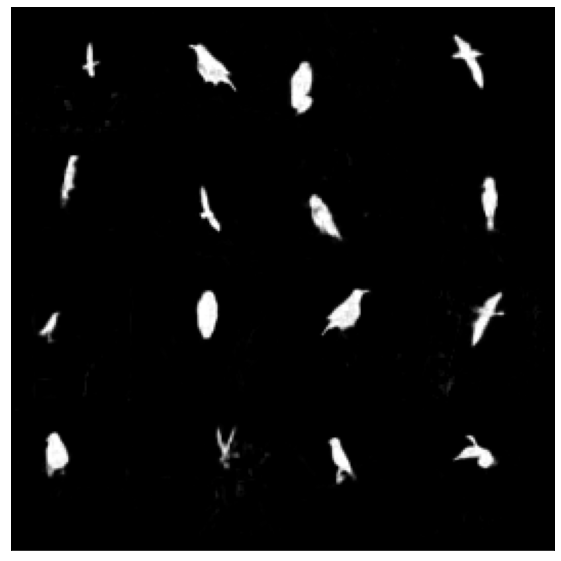

Learning rate = 0.01  for epoch:  10


In [14]:
image_size= 64
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds_tr.set_transforms(train_transforms)
monocular_ds_ts.set_transforms(test_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou  = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
                                        show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-64K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

  0%|          | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 3/17500 [00:01<3:15:11,  1.49it/s]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.106516
IOU : 0.7332003089598352


  3%|▎         | 503/17500 [00:53<30:43,  9.22it/s]

Train Epoch: 1 [1500/280000 (3%)]	Loss: 0.060861
IOU : 0.8448641765704584


  6%|▌         | 1003/17500 [01:45<29:38,  9.28it/s]

Train Epoch: 1 [3000/280000 (6%)]	Loss: 0.060605
IOU : 0.8260147163541419


  9%|▊         | 1503/17500 [02:37<28:57,  9.21it/s]

Train Epoch: 1 [4500/280000 (9%)]	Loss: 0.080866
IOU : 0.778742684538418


 11%|█▏        | 2003/17500 [03:28<28:01,  9.22it/s]

Train Epoch: 1 [6000/280000 (11%)]	Loss: 0.035998
IOU : 0.8712203611050685


 14%|█▍        | 2503/17500 [04:20<27:19,  9.14it/s]

Train Epoch: 1 [7500/280000 (14%)]	Loss: 0.042916
IOU : 0.8653846153846154


 17%|█▋        | 3003/17500 [05:12<26:20,  9.17it/s]

Train Epoch: 1 [9000/280000 (17%)]	Loss: 0.042355
IOU : 0.8636783733826248


 20%|██        | 3503/17500 [06:04<25:17,  9.22it/s]

Train Epoch: 1 [10500/280000 (20%)]	Loss: 0.019971
IOU : 0.9145910269505775


 23%|██▎       | 4003/17500 [06:56<24:31,  9.17it/s]

Train Epoch: 1 [12000/280000 (23%)]	Loss: 0.051063
IOU : 0.8353024574669187


 26%|██▌       | 4503/17500 [07:48<23:33,  9.20it/s]

Train Epoch: 1 [13500/280000 (26%)]	Loss: 0.033073
IOU : 0.8817897256490518


 29%|██▊       | 5003/17500 [08:40<22:31,  9.25it/s]

Train Epoch: 1 [15000/280000 (29%)]	Loss: 0.039819
IOU : 0.863254113345521


 31%|███▏      | 5503/17500 [09:32<21:35,  9.26it/s]

Train Epoch: 1 [16500/280000 (31%)]	Loss: 0.032667
IOU : 0.8656351791530945


 34%|███▍      | 6003/17500 [10:24<20:42,  9.25it/s]

Train Epoch: 1 [18000/280000 (34%)]	Loss: 0.027165
IOU : 0.893969083387764


 37%|███▋      | 6503/17500 [11:16<19:48,  9.25it/s]

Train Epoch: 1 [19500/280000 (37%)]	Loss: 0.030409
IOU : 0.8795211196357812


 40%|████      | 7003/17500 [12:08<18:56,  9.23it/s]

Train Epoch: 1 [21000/280000 (40%)]	Loss: 0.033239
IOU : 0.8850728516205769


 43%|████▎     | 7503/17500 [13:00<18:00,  9.26it/s]

Train Epoch: 1 [22500/280000 (43%)]	Loss: 0.050992
IOU : 0.8487424725469359


 46%|████▌     | 8003/17500 [13:52<17:07,  9.24it/s]

Train Epoch: 1 [24000/280000 (46%)]	Loss: 0.030008
IOU : 0.9040833687792429


 49%|████▊     | 8503/17500 [14:44<16:17,  9.20it/s]

Train Epoch: 1 [25500/280000 (49%)]	Loss: 0.032759
IOU : 0.8784013605442177


 51%|█████▏    | 9003/17500 [15:36<15:19,  9.25it/s]

Train Epoch: 1 [27000/280000 (51%)]	Loss: 0.051717
IOU : 0.8256905336551355


 54%|█████▍    | 9503/17500 [16:28<14:25,  9.24it/s]

Train Epoch: 1 [28500/280000 (54%)]	Loss: 0.026862
IOU : 0.9002428026361429


 57%|█████▋    | 10003/17500 [17:20<13:33,  9.21it/s]

Train Epoch: 1 [30000/280000 (57%)]	Loss: 0.025157
IOU : 0.9026798307475318


 60%|██████    | 10503/17500 [18:12<12:38,  9.23it/s]

Train Epoch: 1 [31500/280000 (60%)]	Loss: 0.033964
IOU : 0.8767527675276753


 63%|██████▎   | 11003/17500 [19:04<11:44,  9.23it/s]

Train Epoch: 1 [33000/280000 (63%)]	Loss: 0.022405
IOU : 0.8868501529051988


 66%|██████▌   | 11503/17500 [19:56<10:48,  9.25it/s]

Train Epoch: 1 [34500/280000 (66%)]	Loss: 0.027470
IOU : 0.8982689115484942


 69%|██████▊   | 12003/17500 [20:48<09:58,  9.19it/s]

Train Epoch: 1 [36000/280000 (69%)]	Loss: 0.022120
IOU : 0.9051771117166213


 71%|███████▏  | 12503/17500 [21:40<08:37,  9.66it/s]

Train Epoch: 1 [37500/280000 (71%)]	Loss: 0.032924
IOU : 0.8740696037014685


 74%|███████▍  | 13003/17500 [22:32<08:10,  9.17it/s]

Train Epoch: 1 [39000/280000 (74%)]	Loss: 0.040273
IOU : 0.8628749513050253


 77%|███████▋  | 13503/17500 [23:24<07:17,  9.14it/s]

Train Epoch: 1 [40500/280000 (77%)]	Loss: 0.041951
IOU : 0.8588080466253055


 80%|████████  | 14003/17500 [24:16<06:19,  9.22it/s]

Train Epoch: 1 [42000/280000 (80%)]	Loss: 0.034334
IOU : 0.8733379986004198


 83%|████████▎ | 14503/17500 [25:08<05:25,  9.22it/s]

Train Epoch: 1 [43500/280000 (83%)]	Loss: 0.027630
IOU : 0.8909369024856597


 86%|████████▌ | 15003/17500 [26:00<04:29,  9.27it/s]

Train Epoch: 1 [45000/280000 (86%)]	Loss: 0.023796
IOU : 0.9002700617283951


 89%|████████▊ | 15503/17500 [26:52<03:36,  9.24it/s]

Train Epoch: 1 [46500/280000 (89%)]	Loss: 0.027355
IOU : 0.8931006819093462


 91%|█████████▏| 16003/17500 [27:44<02:42,  9.21it/s]

Train Epoch: 1 [48000/280000 (91%)]	Loss: 0.025911
IOU : 0.9019319613607728


 94%|█████████▍| 16503/17500 [28:36<01:48,  9.20it/s]

Train Epoch: 1 [49500/280000 (94%)]	Loss: 0.026992
IOU : 0.9065293431791683


 97%|█████████▋| 17003/17500 [29:28<00:53,  9.25it/s]

Train Epoch: 1 [51000/280000 (97%)]	Loss: 0.032200
IOU : 0.8679800724637681


100%|██████████| 17500/17500 [30:20<00:00,  9.61it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05449817207118742


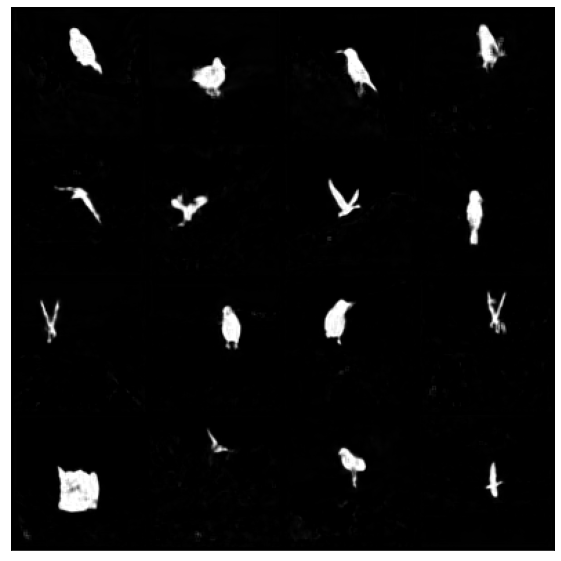

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


  0%|          | 3/17500 [00:00<2:13:26,  2.19it/s]

Train Epoch: 2 [0/280000 (0%)]	Loss: 0.032188
IOU : 0.8736309441286566


  3%|▎         | 503/17500 [00:52<30:41,  9.23it/s]

Train Epoch: 2 [1500/280000 (3%)]	Loss: 0.023045
IOU : 0.8949646844383686


  6%|▌         | 1003/17500 [01:44<29:58,  9.17it/s]

Train Epoch: 2 [3000/280000 (6%)]	Loss: 0.025158
IOU : 0.9035920342453005


  9%|▊         | 1503/17500 [02:36<29:01,  9.19it/s]

Train Epoch: 2 [4500/280000 (9%)]	Loss: 0.048182
IOU : 0.8384128809660725


 11%|█▏        | 2003/17500 [03:28<27:52,  9.27it/s]

Train Epoch: 2 [6000/280000 (11%)]	Loss: 0.043862
IOU : 0.8583069262109552


 14%|█▍        | 2503/17500 [04:20<27:14,  9.18it/s]

Train Epoch: 2 [7500/280000 (14%)]	Loss: 0.039693
IOU : 0.8593146718146718


 17%|█▋        | 3003/17500 [05:12<26:02,  9.28it/s]

Train Epoch: 2 [9000/280000 (17%)]	Loss: 0.032919
IOU : 0.879419944378228


 20%|██        | 3503/17500 [06:04<25:26,  9.17it/s]

Train Epoch: 2 [10500/280000 (20%)]	Loss: 0.024419
IOU : 0.893416149068323


 23%|██▎       | 4003/17500 [06:56<24:26,  9.21it/s]

Train Epoch: 2 [12000/280000 (23%)]	Loss: 0.028949
IOU : 0.8846611177170036


 26%|██▌       | 4503/17500 [07:48<23:29,  9.22it/s]

Train Epoch: 2 [13500/280000 (26%)]	Loss: 0.034116
IOU : 0.8757281553398059


 29%|██▊       | 5003/17500 [08:40<22:34,  9.23it/s]

Train Epoch: 2 [15000/280000 (29%)]	Loss: 0.026509
IOU : 0.8902353763691447


 31%|███▏      | 5503/17500 [09:32<21:33,  9.28it/s]

Train Epoch: 2 [16500/280000 (31%)]	Loss: 0.026811
IOU : 0.8833223467369808


 34%|███▍      | 6003/17500 [10:24<21:05,  9.09it/s]

Train Epoch: 2 [18000/280000 (34%)]	Loss: 0.029912
IOU : 0.8860988348734431


 37%|███▋      | 6503/17500 [11:16<19:49,  9.25it/s]

Train Epoch: 2 [19500/280000 (37%)]	Loss: 0.019431
IOU : 0.906910569105691


 40%|████      | 7003/17500 [12:08<18:59,  9.21it/s]

Train Epoch: 2 [21000/280000 (40%)]	Loss: 0.029419
IOU : 0.8817059483726151


 43%|████▎     | 7503/17500 [13:01<18:03,  9.23it/s]

Train Epoch: 2 [22500/280000 (43%)]	Loss: 0.031506
IOU : 0.875877736472532


 46%|████▌     | 8003/17500 [13:53<17:09,  9.23it/s]

Train Epoch: 2 [24000/280000 (46%)]	Loss: 0.037803
IOU : 0.8653382964747098


 49%|████▊     | 8503/17500 [14:45<16:15,  9.22it/s]

Train Epoch: 2 [25500/280000 (49%)]	Loss: 0.023675
IOU : 0.8979460847240052


 51%|█████▏    | 9003/17500 [15:37<15:24,  9.19it/s]

Train Epoch: 2 [27000/280000 (51%)]	Loss: 0.023712
IOU : 0.8910107126222636


 54%|█████▍    | 9503/17500 [16:29<14:27,  9.22it/s]

Train Epoch: 2 [28500/280000 (54%)]	Loss: 0.040473
IOU : 0.8610066833751044


 57%|█████▋    | 10003/17500 [17:21<13:33,  9.22it/s]

Train Epoch: 2 [30000/280000 (57%)]	Loss: 0.021977
IOU : 0.9011583011583012


 60%|██████    | 10503/17500 [18:13<12:38,  9.22it/s]

Train Epoch: 2 [31500/280000 (60%)]	Loss: 0.027269
IOU : 0.8874265569917744


 63%|██████▎   | 11003/17500 [19:05<11:46,  9.20it/s]

Train Epoch: 2 [33000/280000 (63%)]	Loss: 0.020223
IOU : 0.9100924650796773


 66%|██████▌   | 11503/17500 [19:57<10:49,  9.23it/s]

Train Epoch: 2 [34500/280000 (66%)]	Loss: 0.034989
IOU : 0.8653386454183267


 69%|██████▊   | 12003/17500 [20:49<09:57,  9.20it/s]

Train Epoch: 2 [36000/280000 (69%)]	Loss: 0.033408
IOU : 0.8660062565172054


 71%|███████▏  | 12503/17500 [21:41<09:03,  9.20it/s]

Train Epoch: 2 [37500/280000 (71%)]	Loss: 0.032812
IOU : 0.8688749194068343


 74%|███████▍  | 13003/17500 [22:33<08:06,  9.24it/s]

Train Epoch: 2 [39000/280000 (74%)]	Loss: 0.028181
IOU : 0.8801253591015931


 77%|███████▋  | 13503/17500 [23:25<07:13,  9.21it/s]

Train Epoch: 2 [40500/280000 (77%)]	Loss: 0.037832
IOU : 0.859253499222395


 80%|████████  | 14003/17500 [24:17<06:19,  9.22it/s]

Train Epoch: 2 [42000/280000 (80%)]	Loss: 0.019452
IOU : 0.9157463484146776


 83%|████████▎ | 14503/17500 [25:09<05:25,  9.22it/s]

Train Epoch: 2 [43500/280000 (83%)]	Loss: 0.022745
IOU : 0.9000440011733646


 86%|████████▌ | 15003/17500 [26:01<04:31,  9.21it/s]

Train Epoch: 2 [45000/280000 (86%)]	Loss: 0.016780
IOU : 0.9262861530586127


 89%|████████▊ | 15503/17500 [26:53<03:38,  9.13it/s]

Train Epoch: 2 [46500/280000 (89%)]	Loss: 0.026643
IOU : 0.8958592132505176


 91%|█████████▏| 16003/17500 [27:45<02:41,  9.26it/s]

Train Epoch: 2 [48000/280000 (91%)]	Loss: 0.019230
IOU : 0.922418405564473


 94%|█████████▍| 16503/17500 [28:37<01:48,  9.22it/s]

Train Epoch: 2 [49500/280000 (94%)]	Loss: 0.022762
IOU : 0.8947092718700891


 97%|█████████▋| 17003/17500 [29:29<00:53,  9.23it/s]

Train Epoch: 2 [51000/280000 (97%)]	Loss: 0.022549
IOU : 0.9023820644558618


100%|██████████| 17500/17500 [30:21<00:00,  9.61it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.055523078915333285


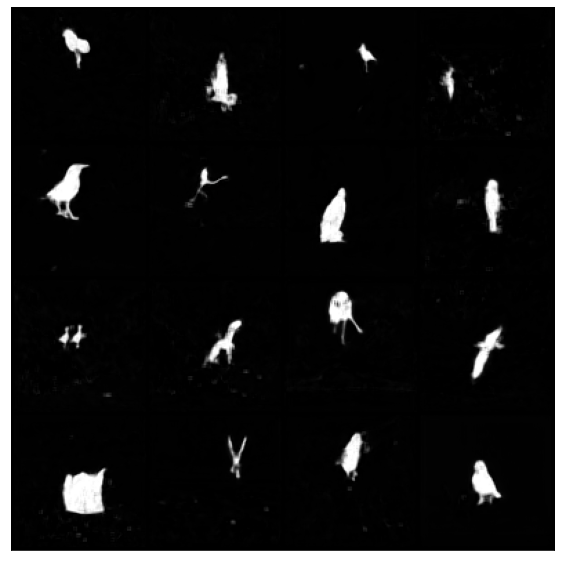

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


  0%|          | 3/17500 [00:00<2:06:32,  2.30it/s]

Train Epoch: 3 [0/280000 (0%)]	Loss: 0.029787
IOU : 0.8843763870395028


  3%|▎         | 503/17500 [00:52<30:51,  9.18it/s]

Train Epoch: 3 [1500/280000 (3%)]	Loss: 0.017726
IOU : 0.9106057194325602


  6%|▌         | 1003/17500 [01:44<29:47,  9.23it/s]

Train Epoch: 3 [3000/280000 (6%)]	Loss: 0.019279
IOU : 0.9053333333333333


  9%|▊         | 1503/17500 [02:36<29:17,  9.10it/s]

Train Epoch: 3 [4500/280000 (9%)]	Loss: 0.027951
IOU : 0.8973902728351127


 11%|█▏        | 2003/17500 [03:28<28:00,  9.22it/s]

Train Epoch: 3 [6000/280000 (11%)]	Loss: 0.030143
IOU : 0.8821036889332003


 14%|█▍        | 2503/17500 [04:20<27:06,  9.22it/s]

Train Epoch: 3 [7500/280000 (14%)]	Loss: 0.023004
IOU : 0.906670113753878


 17%|█▋        | 3003/17500 [05:12<26:22,  9.16it/s]

Train Epoch: 3 [9000/280000 (17%)]	Loss: 0.030778
IOU : 0.8844772545889864


 20%|██        | 3503/17500 [06:04<25:34,  9.12it/s]

Train Epoch: 3 [10500/280000 (20%)]	Loss: 0.025175
IOU : 0.8662139518476056


 23%|██▎       | 4003/17500 [06:56<24:31,  9.17it/s]

Train Epoch: 3 [12000/280000 (23%)]	Loss: 0.037203
IOU : 0.8599848904558046


 26%|██▌       | 4503/17500 [07:48<23:30,  9.21it/s]

Train Epoch: 3 [13500/280000 (26%)]	Loss: 0.032322
IOU : 0.8671281822242073


 29%|██▊       | 5003/17500 [08:40<22:42,  9.17it/s]

Train Epoch: 3 [15000/280000 (29%)]	Loss: 0.027868
IOU : 0.8913974309069677


 31%|███▏      | 5503/17500 [09:32<21:39,  9.23it/s]

Train Epoch: 3 [16500/280000 (31%)]	Loss: 0.026880
IOU : 0.8864538069147931


 34%|███▍      | 6003/17500 [10:24<20:44,  9.24it/s]

Train Epoch: 3 [18000/280000 (34%)]	Loss: 0.020551
IOU : 0.8982406086543033


 37%|███▋      | 6503/17500 [11:16<19:49,  9.25it/s]

Train Epoch: 3 [19500/280000 (37%)]	Loss: 0.018866
IOU : 0.9054282267792522


 40%|████      | 7003/17500 [12:08<19:00,  9.20it/s]

Train Epoch: 3 [21000/280000 (40%)]	Loss: 0.025310
IOU : 0.8947245017584994


 43%|████▎     | 7503/17500 [13:00<18:01,  9.24it/s]

Train Epoch: 3 [22500/280000 (43%)]	Loss: 0.027350
IOU : 0.8809464508094645


 46%|████▌     | 8003/17500 [13:52<17:17,  9.15it/s]

Train Epoch: 3 [24000/280000 (46%)]	Loss: 0.034629
IOU : 0.8792180591110077


 49%|████▊     | 8503/17500 [14:44<16:16,  9.21it/s]

Train Epoch: 3 [25500/280000 (49%)]	Loss: 0.015374
IOU : 0.9252778434618113


 51%|█████▏    | 9003/17500 [15:36<15:23,  9.20it/s]

Train Epoch: 3 [27000/280000 (51%)]	Loss: 0.030159
IOU : 0.862760834670947


 54%|█████▍    | 9503/17500 [16:28<14:30,  9.18it/s]

Train Epoch: 3 [28500/280000 (54%)]	Loss: 0.018859
IOU : 0.9151936026936027


 57%|█████▋    | 10003/17500 [17:20<13:34,  9.20it/s]

Train Epoch: 3 [30000/280000 (57%)]	Loss: 0.024431
IOU : 0.8904240114340162


 60%|██████    | 10503/17500 [18:12<12:35,  9.26it/s]

Train Epoch: 3 [31500/280000 (60%)]	Loss: 0.019343
IOU : 0.9115737631520036


 63%|██████▎   | 11003/17500 [19:04<11:48,  9.18it/s]

Train Epoch: 3 [33000/280000 (63%)]	Loss: 0.032368
IOU : 0.879973474801061


 66%|██████▌   | 11503/17500 [19:56<10:48,  9.25it/s]

Train Epoch: 3 [34500/280000 (66%)]	Loss: 0.038426
IOU : 0.852017937219731


 69%|██████▊   | 12003/17500 [20:48<09:56,  9.22it/s]

Train Epoch: 3 [36000/280000 (69%)]	Loss: 0.019879
IOU : 0.9008383233532934


 71%|███████▏  | 12503/17500 [21:40<09:01,  9.23it/s]

Train Epoch: 3 [37500/280000 (71%)]	Loss: 0.021768
IOU : 0.904974946313529


 74%|███████▍  | 13003/17500 [22:32<08:10,  9.17it/s]

Train Epoch: 3 [39000/280000 (74%)]	Loss: 0.026228
IOU : 0.888099902056807


 77%|███████▋  | 13503/17500 [23:24<07:14,  9.19it/s]

Train Epoch: 3 [40500/280000 (77%)]	Loss: 0.021544
IOU : 0.8979348689436061


 80%|████████  | 14003/17500 [24:16<06:21,  9.18it/s]

Train Epoch: 3 [42000/280000 (80%)]	Loss: 0.018647
IOU : 0.9119982828933247


 83%|████████▎ | 14503/17500 [25:08<05:26,  9.19it/s]

Train Epoch: 3 [43500/280000 (83%)]	Loss: 0.019105
IOU : 0.9028760018859029


 86%|████████▌ | 15003/17500 [26:00<04:30,  9.22it/s]

Train Epoch: 3 [45000/280000 (86%)]	Loss: 0.019630
IOU : 0.911697247706422


 89%|████████▊ | 15503/17500 [26:52<03:35,  9.27it/s]

Train Epoch: 3 [46500/280000 (89%)]	Loss: 0.031292
IOU : 0.8778536585365854


 91%|█████████▏| 16003/17500 [27:44<02:43,  9.17it/s]

Train Epoch: 3 [48000/280000 (91%)]	Loss: 0.018423
IOU : 0.9151151966488248


 94%|█████████▍| 16503/17500 [28:36<01:48,  9.20it/s]

Train Epoch: 3 [49500/280000 (94%)]	Loss: 0.029381
IOU : 0.8806535638171916


 97%|█████████▋| 17003/17500 [29:28<00:53,  9.25it/s]

Train Epoch: 3 [51000/280000 (97%)]	Loss: 0.026370
IOU : 0.8697876694806856


100%|██████████| 17500/17500 [30:20<00:00,  9.61it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.055878628085797466


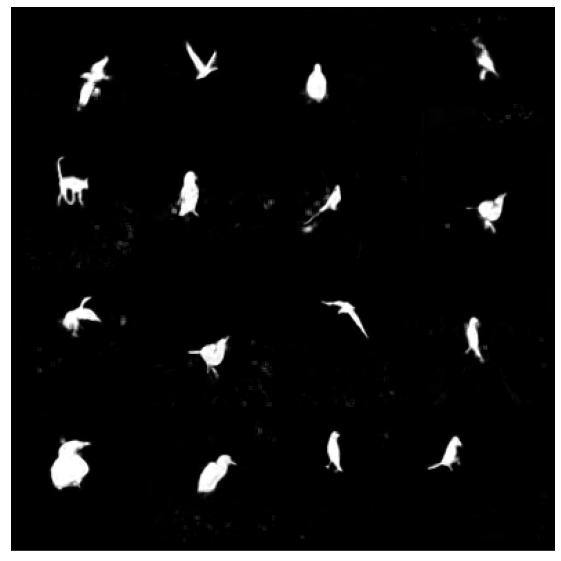

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


  0%|          | 3/17500 [00:00<2:11:34,  2.22it/s]

Train Epoch: 4 [0/280000 (0%)]	Loss: 0.023643
IOU : 0.8968911917098445


  3%|▎         | 503/17500 [00:52<30:43,  9.22it/s]

Train Epoch: 4 [1500/280000 (3%)]	Loss: 0.023842
IOU : 0.9058927000879508


  6%|▌         | 1003/17500 [01:44<29:38,  9.28it/s]

Train Epoch: 4 [3000/280000 (6%)]	Loss: 0.025252
IOU : 0.8966118102613746


  9%|▊         | 1503/17500 [02:36<29:11,  9.13it/s]

Train Epoch: 4 [4500/280000 (9%)]	Loss: 0.022084
IOU : 0.9089958158995816


 11%|█▏        | 2003/17500 [03:28<27:57,  9.24it/s]

Train Epoch: 4 [6000/280000 (11%)]	Loss: 0.032593
IOU : 0.870749939715457


 14%|█▍        | 2503/17500 [04:20<27:11,  9.19it/s]

Train Epoch: 4 [7500/280000 (14%)]	Loss: 0.020252
IOU : 0.9137667304015297


 17%|█▋        | 3003/17500 [05:12<26:20,  9.17it/s]

Train Epoch: 4 [9000/280000 (17%)]	Loss: 0.020295
IOU : 0.8988445165213865


 20%|██        | 3503/17500 [06:04<25:13,  9.25it/s]

Train Epoch: 4 [10500/280000 (20%)]	Loss: 0.015611
IOU : 0.9302994417188293


 23%|██▎       | 4003/17500 [06:56<24:28,  9.19it/s]

Train Epoch: 4 [12000/280000 (23%)]	Loss: 0.127434
IOU : 0.7268886679920478


 26%|██▌       | 4503/17500 [07:48<23:31,  9.21it/s]

Train Epoch: 4 [13500/280000 (26%)]	Loss: 0.124005
IOU : 0.6845753899480069


 29%|██▊       | 5003/17500 [08:40<22:36,  9.21it/s]

Train Epoch: 4 [15000/280000 (29%)]	Loss: 0.097462
IOU : 0.7479481641468683


 31%|███▏      | 5503/17500 [09:33<21:33,  9.27it/s]

Train Epoch: 4 [16500/280000 (31%)]	Loss: 0.037260
IOU : 0.8717081420633003


 34%|███▍      | 6003/17500 [10:25<20:58,  9.14it/s]

Train Epoch: 4 [18000/280000 (34%)]	Loss: 0.050064
IOU : 0.8398039215686275


 37%|███▋      | 6503/17500 [11:17<20:02,  9.15it/s]

Train Epoch: 4 [19500/280000 (37%)]	Loss: 0.054247
IOU : 0.8300910596026491


 40%|████      | 7003/17500 [12:09<19:02,  9.19it/s]

Train Epoch: 4 [21000/280000 (40%)]	Loss: 0.044013
IOU : 0.8468468468468469


 43%|████▎     | 7503/17500 [13:01<18:03,  9.23it/s]

Train Epoch: 4 [22500/280000 (43%)]	Loss: 0.035263
IOU : 0.8843181818181818


 46%|████▌     | 8003/17500 [13:53<17:10,  9.22it/s]

Train Epoch: 4 [24000/280000 (46%)]	Loss: 0.038851
IOU : 0.8632665211351459


 49%|████▊     | 8503/17500 [14:45<16:24,  9.14it/s]

Train Epoch: 4 [25500/280000 (49%)]	Loss: 0.023186
IOU : 0.8991907514450868


 51%|█████▏    | 9003/17500 [15:38<15:20,  9.23it/s]

Train Epoch: 4 [27000/280000 (51%)]	Loss: 0.042862
IOU : 0.8604386214753631


 54%|█████▍    | 9503/17500 [16:30<14:28,  9.21it/s]

Train Epoch: 4 [28500/280000 (54%)]	Loss: 0.028987
IOU : 0.8879581151832461


 57%|█████▋    | 10003/17500 [17:22<13:35,  9.19it/s]

Train Epoch: 4 [30000/280000 (57%)]	Loss: 0.020563
IOU : 0.9125405844155844


 60%|██████    | 10503/17500 [18:14<12:40,  9.20it/s]

Train Epoch: 4 [31500/280000 (60%)]	Loss: 0.020106
IOU : 0.9065002355157795


 63%|██████▎   | 11003/17500 [19:06<11:55,  9.08it/s]

Train Epoch: 4 [33000/280000 (63%)]	Loss: 0.036611
IOU : 0.8680785914774177


 66%|██████▌   | 11503/17500 [19:58<10:52,  9.20it/s]

Train Epoch: 4 [34500/280000 (66%)]	Loss: 0.024814
IOU : 0.8962727535394395


 69%|██████▊   | 12003/17500 [20:50<09:58,  9.19it/s]

Train Epoch: 4 [36000/280000 (69%)]	Loss: 0.030227
IOU : 0.8762330169365345


 71%|███████▏  | 12503/17500 [21:43<09:05,  9.16it/s]

Train Epoch: 4 [37500/280000 (71%)]	Loss: 0.038982
IOU : 0.8637865911237016


 74%|███████▍  | 13003/17500 [22:35<08:07,  9.22it/s]

Train Epoch: 4 [39000/280000 (74%)]	Loss: 0.030430
IOU : 0.8876520838726378


 77%|███████▋  | 13503/17500 [23:27<07:17,  9.13it/s]

Train Epoch: 4 [40500/280000 (77%)]	Loss: 0.026904
IOU : 0.8896995708154506


 80%|████████  | 14003/17500 [24:19<06:20,  9.19it/s]

Train Epoch: 4 [42000/280000 (80%)]	Loss: 0.018878
IOU : 0.920408556561958


 83%|████████▎ | 14503/17500 [25:11<05:24,  9.23it/s]

Train Epoch: 4 [43500/280000 (83%)]	Loss: 0.022217
IOU : 0.90580592773041


 86%|████████▌ | 15003/17500 [26:03<04:31,  9.21it/s]

Train Epoch: 4 [45000/280000 (86%)]	Loss: 0.022499
IOU : 0.9001718353653547


 89%|████████▊ | 15503/17500 [26:56<03:36,  9.20it/s]

Train Epoch: 4 [46500/280000 (89%)]	Loss: 0.018292
IOU : 0.9138312864908396


 91%|█████████▏| 16003/17500 [27:48<02:43,  9.17it/s]

Train Epoch: 4 [48000/280000 (91%)]	Loss: 0.037242
IOU : 0.8760616093277673


 94%|█████████▍| 16503/17500 [28:40<01:49,  9.11it/s]

Train Epoch: 4 [49500/280000 (94%)]	Loss: 0.024960
IOU : 0.88465483234714


 97%|█████████▋| 17003/17500 [29:32<00:54,  9.15it/s]

Train Epoch: 4 [51000/280000 (97%)]	Loss: 0.020719
IOU : 0.9128548895899053


100%|██████████| 17500/17500 [30:24<00:00,  9.59it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.054691649007298115


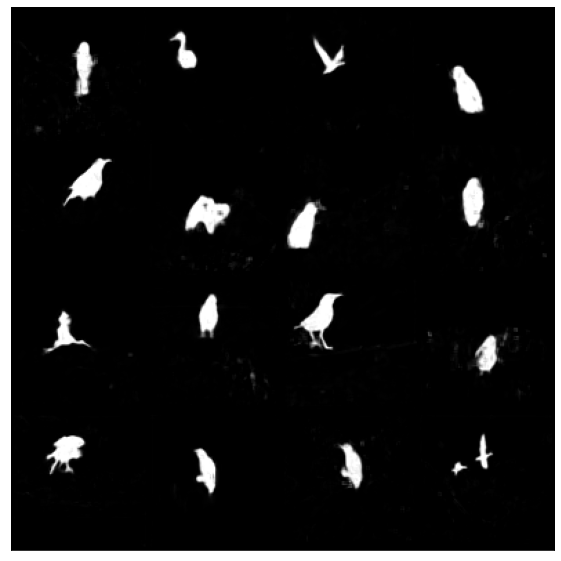

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


  0%|          | 3/17500 [00:00<2:11:46,  2.21it/s]

Train Epoch: 5 [0/280000 (0%)]	Loss: 0.015184
IOU : 0.9275295207223895


  3%|▎         | 503/17500 [00:52<31:01,  9.13it/s]

Train Epoch: 5 [1500/280000 (3%)]	Loss: 0.028899
IOU : 0.874823255427098


  6%|▌         | 1003/17500 [01:45<29:59,  9.17it/s]

Train Epoch: 5 [3000/280000 (6%)]	Loss: 0.024089
IOU : 0.9041209704220672


  9%|▊         | 1503/17500 [02:37<28:52,  9.23it/s]

Train Epoch: 5 [4500/280000 (9%)]	Loss: 0.024186
IOU : 0.9014179608372721


 11%|█▏        | 2003/17500 [03:29<28:06,  9.19it/s]

Train Epoch: 5 [6000/280000 (11%)]	Loss: 0.012409
IOU : 0.9442934782608695


 14%|█▍        | 2503/17500 [04:21<27:02,  9.24it/s]

Train Epoch: 5 [7500/280000 (14%)]	Loss: 0.036931
IOU : 0.8637691745799854


 17%|█▋        | 3003/17500 [05:13<26:27,  9.13it/s]

Train Epoch: 5 [9000/280000 (17%)]	Loss: 0.020523
IOU : 0.9066019286533145


 20%|██        | 3503/17500 [06:05<25:29,  9.15it/s]

Train Epoch: 5 [10500/280000 (20%)]	Loss: 0.018651
IOU : 0.91069636765001


 23%|██▎       | 4003/17500 [06:58<24:30,  9.18it/s]

Train Epoch: 5 [12000/280000 (23%)]	Loss: 0.017068
IOU : 0.9172164290274526


 26%|██▌       | 4503/17500 [07:50<23:36,  9.18it/s]

Train Epoch: 5 [13500/280000 (26%)]	Loss: 0.025904
IOU : 0.8926038500506586


 29%|██▊       | 5003/17500 [08:42<22:46,  9.15it/s]

Train Epoch: 5 [15000/280000 (29%)]	Loss: 0.023752
IOU : 0.8967509025270758


 31%|███▏      | 5503/17500 [09:34<21:45,  9.19it/s]

Train Epoch: 5 [16500/280000 (31%)]	Loss: 0.021060
IOU : 0.9079408330089529


 34%|███▍      | 6003/17500 [10:26<20:47,  9.22it/s]

Train Epoch: 5 [18000/280000 (34%)]	Loss: 0.027008
IOU : 0.8836540588365406


 37%|███▋      | 6503/17500 [11:18<19:53,  9.22it/s]

Train Epoch: 5 [19500/280000 (37%)]	Loss: 0.026700
IOU : 0.8818493150684932


 40%|████      | 7003/17500 [12:11<18:59,  9.21it/s]

Train Epoch: 5 [21000/280000 (40%)]	Loss: 0.026744
IOU : 0.877655490145892


 43%|████▎     | 7503/17500 [13:03<18:04,  9.22it/s]

Train Epoch: 5 [22500/280000 (43%)]	Loss: 0.027674
IOU : 0.8773137161841481


 46%|████▌     | 8003/17500 [13:55<17:20,  9.13it/s]

Train Epoch: 5 [24000/280000 (46%)]	Loss: 0.025482
IOU : 0.8898138006571742


 49%|████▊     | 8503/17500 [14:47<16:32,  9.06it/s]

Train Epoch: 5 [25500/280000 (49%)]	Loss: 0.031289
IOU : 0.8747218513573654


 51%|█████▏    | 9003/17500 [15:39<15:25,  9.19it/s]

Train Epoch: 5 [27000/280000 (51%)]	Loss: 0.019092
IOU : 0.9090909090909091


 54%|█████▍    | 9503/17500 [16:32<14:27,  9.22it/s]

Train Epoch: 5 [28500/280000 (54%)]	Loss: 0.024008
IOU : 0.8843424787133396


 57%|█████▋    | 10003/17500 [17:24<13:33,  9.21it/s]

Train Epoch: 5 [30000/280000 (57%)]	Loss: 0.025707
IOU : 0.9004468718967229


 60%|██████    | 10503/17500 [18:16<12:48,  9.10it/s]

Train Epoch: 5 [31500/280000 (60%)]	Loss: 0.017388
IOU : 0.9148629148629148


 63%|██████▎   | 11003/17500 [19:08<11:50,  9.14it/s]

Train Epoch: 5 [33000/280000 (63%)]	Loss: 0.025163
IOU : 0.8883205456095482


 66%|██████▌   | 11503/17500 [20:00<10:52,  9.19it/s]

Train Epoch: 5 [34500/280000 (66%)]	Loss: 0.023765
IOU : 0.8968940936863544


 69%|██████▊   | 12003/17500 [20:52<10:01,  9.15it/s]

Train Epoch: 5 [36000/280000 (69%)]	Loss: 0.023242
IOU : 0.8995173321632295


 71%|███████▏  | 12503/17500 [21:45<09:04,  9.18it/s]

Train Epoch: 5 [37500/280000 (71%)]	Loss: 0.024681
IOU : 0.8998407009159697


 74%|███████▍  | 13003/17500 [22:37<08:11,  9.15it/s]

Train Epoch: 5 [39000/280000 (74%)]	Loss: 0.021028
IOU : 0.9084625443676443


 77%|███████▋  | 13503/17500 [23:29<07:15,  9.19it/s]

Train Epoch: 5 [40500/280000 (77%)]	Loss: 0.015374
IOU : 0.9245283018867925


 80%|████████  | 14003/17500 [24:21<06:23,  9.11it/s]

Train Epoch: 5 [42000/280000 (80%)]	Loss: 0.017500
IOU : 0.9223104205370715


 83%|████████▎ | 14503/17500 [25:13<05:26,  9.19it/s]

Train Epoch: 5 [43500/280000 (83%)]	Loss: 0.016077
IOU : 0.9204726198591229


 86%|████████▌ | 15003/17500 [26:05<04:32,  9.17it/s]

Train Epoch: 5 [45000/280000 (86%)]	Loss: 0.036156
IOU : 0.8693376283470908


 89%|████████▊ | 15503/17500 [26:58<03:36,  9.22it/s]

Train Epoch: 5 [46500/280000 (89%)]	Loss: 0.023540
IOU : 0.8997165903640724


 91%|█████████▏| 16003/17500 [27:50<02:44,  9.11it/s]

Train Epoch: 5 [48000/280000 (91%)]	Loss: 0.035356
IOU : 0.8662935323383084


 94%|█████████▍| 16503/17500 [28:42<01:48,  9.18it/s]

Train Epoch: 5 [49500/280000 (94%)]	Loss: 0.024098
IOU : 0.893498608651657


 97%|█████████▋| 17003/17500 [29:34<00:54,  9.20it/s]

Train Epoch: 5 [51000/280000 (97%)]	Loss: 0.024347
IOU : 0.8930545541937034


100%|██████████| 17500/17500 [30:26<00:00,  9.58it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.056065467660936646


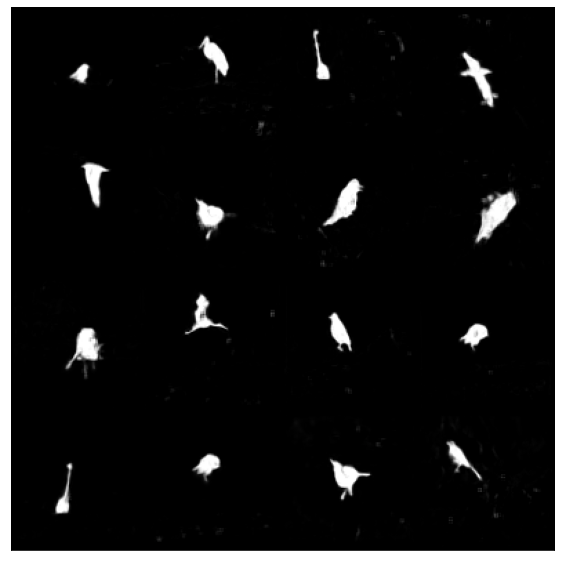

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  6
EPOCH: 6


  0%|          | 3/17500 [00:00<2:10:33,  2.23it/s]

Train Epoch: 6 [0/280000 (0%)]	Loss: 0.040136
IOU : 0.8522843679573858


  3%|▎         | 503/17500 [00:52<30:52,  9.17it/s]

Train Epoch: 6 [1500/280000 (3%)]	Loss: 0.024332
IOU : 0.9010084379501955


  6%|▌         | 1003/17500 [01:45<29:49,  9.22it/s]

Train Epoch: 6 [3000/280000 (6%)]	Loss: 0.022323
IOU : 0.8888061553735418


  9%|▊         | 1503/17500 [02:37<28:52,  9.23it/s]

Train Epoch: 6 [4500/280000 (9%)]	Loss: 0.023550
IOU : 0.8991963661774982


 11%|█▏        | 2003/17500 [03:29<28:06,  9.19it/s]

Train Epoch: 6 [6000/280000 (11%)]	Loss: 0.031240
IOU : 0.8623810628916222


 14%|█▍        | 2503/17500 [04:21<27:10,  9.20it/s]

Train Epoch: 6 [7500/280000 (14%)]	Loss: 0.021002
IOU : 0.906284454244763


 17%|█▋        | 3003/17500 [05:13<26:29,  9.12it/s]

Train Epoch: 6 [9000/280000 (17%)]	Loss: 0.018246
IOU : 0.9155643738977073


 20%|██        | 3503/17500 [06:05<25:16,  9.23it/s]

Train Epoch: 6 [10500/280000 (20%)]	Loss: 0.025195
IOU : 0.8939492517891997


 23%|██▎       | 4003/17500 [06:58<24:23,  9.22it/s]

Train Epoch: 6 [12000/280000 (23%)]	Loss: 0.023489
IOU : 0.8927392739273927


 26%|██▌       | 4503/17500 [07:50<23:34,  9.19it/s]

Train Epoch: 6 [13500/280000 (26%)]	Loss: 0.014650
IOU : 0.9177334016043693


 29%|██▊       | 5003/17500 [08:42<22:44,  9.16it/s]

Train Epoch: 6 [15000/280000 (29%)]	Loss: 0.018236
IOU : 0.9064885496183206


 31%|███▏      | 5503/17500 [09:34<21:48,  9.17it/s]

Train Epoch: 6 [16500/280000 (31%)]	Loss: 0.025402
IOU : 0.8961424332344213


 34%|███▍      | 6003/17500 [10:26<20:58,  9.14it/s]

Train Epoch: 6 [18000/280000 (34%)]	Loss: 0.023672
IOU : 0.8981321009050645


 37%|███▋      | 6503/17500 [11:18<19:54,  9.21it/s]

Train Epoch: 6 [19500/280000 (37%)]	Loss: 0.019361
IOU : 0.9072982313478349


 40%|████      | 7003/17500 [12:10<19:00,  9.21it/s]

Train Epoch: 6 [21000/280000 (40%)]	Loss: 0.031277
IOU : 0.8650014033118159


 43%|████▎     | 7503/17500 [13:03<18:08,  9.19it/s]

Train Epoch: 6 [22500/280000 (43%)]	Loss: 0.025645
IOU : 0.8958418263350999


 46%|████▌     | 8003/17500 [13:55<17:18,  9.15it/s]

Train Epoch: 6 [24000/280000 (46%)]	Loss: 0.031451
IOU : 0.8893582780124724


 49%|████▊     | 8503/17500 [14:47<16:19,  9.19it/s]

Train Epoch: 6 [25500/280000 (49%)]	Loss: 0.018384
IOU : 0.9127564253713747


 51%|█████▏    | 9003/17500 [15:39<15:41,  9.02it/s]

Train Epoch: 6 [27000/280000 (51%)]	Loss: 0.023019
IOU : 0.8936944219886823


 54%|█████▍    | 9503/17500 [16:31<14:28,  9.21it/s]

Train Epoch: 6 [28500/280000 (54%)]	Loss: 0.016502
IOU : 0.9253187613843351


 57%|█████▋    | 10003/17500 [17:23<13:36,  9.19it/s]

Train Epoch: 6 [30000/280000 (57%)]	Loss: 0.031154
IOU : 0.8643683374914947


 60%|██████    | 10503/17500 [18:16<12:39,  9.22it/s]

Train Epoch: 6 [31500/280000 (60%)]	Loss: 0.018903
IOU : 0.9185714285714286


 63%|██████▎   | 11003/17500 [19:08<11:53,  9.11it/s]

Train Epoch: 6 [33000/280000 (63%)]	Loss: 0.021889
IOU : 0.9057067271352985


 66%|██████▌   | 11503/17500 [20:00<10:53,  9.18it/s]

Train Epoch: 6 [34500/280000 (66%)]	Loss: 0.033625
IOU : 0.8678922298303067


 69%|██████▊   | 12003/17500 [20:52<09:59,  9.17it/s]

Train Epoch: 6 [36000/280000 (69%)]	Loss: 0.016557
IOU : 0.9162956366874443


 71%|███████▏  | 12503/17500 [21:44<09:03,  9.20it/s]

Train Epoch: 6 [37500/280000 (71%)]	Loss: 0.025519
IOU : 0.8894574460079765


 74%|███████▍  | 13003/17500 [22:36<08:06,  9.24it/s]

Train Epoch: 6 [39000/280000 (74%)]	Loss: 0.023319
IOU : 0.9039706517047906


 77%|███████▋  | 13503/17500 [23:28<07:14,  9.20it/s]

Train Epoch: 6 [40500/280000 (77%)]	Loss: 0.028142
IOU : 0.8765767994063814


 80%|████████  | 14003/17500 [24:21<06:19,  9.21it/s]

Train Epoch: 6 [42000/280000 (80%)]	Loss: 0.024755
IOU : 0.8847016599371915


 83%|████████▎ | 14503/17500 [25:13<05:24,  9.23it/s]

Train Epoch: 6 [43500/280000 (83%)]	Loss: 0.019624
IOU : 0.9088729016786571


 86%|████████▌ | 15003/17500 [26:05<04:33,  9.13it/s]

Train Epoch: 6 [45000/280000 (86%)]	Loss: 0.041279
IOU : 0.851051051051051


 89%|████████▊ | 15503/17500 [26:57<03:37,  9.17it/s]

Train Epoch: 6 [46500/280000 (89%)]	Loss: 0.013594
IOU : 0.9335091354304013


 91%|█████████▏| 16003/17500 [27:49<02:42,  9.23it/s]

Train Epoch: 6 [48000/280000 (91%)]	Loss: 0.018884
IOU : 0.9084836339345357


 94%|█████████▍| 16503/17500 [28:41<01:48,  9.21it/s]

Train Epoch: 6 [49500/280000 (94%)]	Loss: 0.024520
IOU : 0.8855667300896983


 97%|█████████▋| 17003/17500 [29:34<00:54,  9.14it/s]

Train Epoch: 6 [51000/280000 (97%)]	Loss: 0.023856
IOU : 0.902686567164179


100%|██████████| 17500/17500 [30:26<00:00,  9.58it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05630686724020984


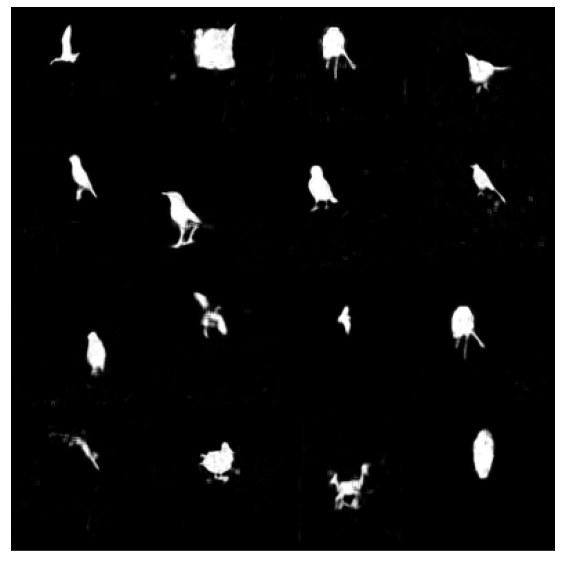

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


  0%|          | 3/17500 [00:00<2:02:33,  2.38it/s]

Train Epoch: 7 [0/280000 (0%)]	Loss: 0.015168
IOU : 0.924447451511051


  3%|▎         | 503/17500 [00:52<30:55,  9.16it/s]

Train Epoch: 7 [1500/280000 (3%)]	Loss: 0.026835
IOU : 0.8894508670520231


  6%|▌         | 1003/17500 [01:45<29:49,  9.22it/s]

Train Epoch: 7 [3000/280000 (6%)]	Loss: 0.030167
IOU : 0.8779599271402551


  9%|▊         | 1503/17500 [02:37<29:05,  9.17it/s]

Train Epoch: 7 [4500/280000 (9%)]	Loss: 0.019321
IOU : 0.9008879289656827


 11%|█▏        | 2003/17500 [03:29<28:04,  9.20it/s]

Train Epoch: 7 [6000/280000 (11%)]	Loss: 0.017163
IOU : 0.9083206604388442


 14%|█▍        | 2503/17500 [04:21<27:22,  9.13it/s]

Train Epoch: 7 [7500/280000 (14%)]	Loss: 0.028772
IOU : 0.8738977072310405


 17%|█▋        | 3003/17500 [05:13<26:28,  9.13it/s]

Train Epoch: 7 [9000/280000 (17%)]	Loss: 0.022619
IOU : 0.8877259752616555


 20%|██        | 3503/17500 [06:05<25:20,  9.21it/s]

Train Epoch: 7 [10500/280000 (20%)]	Loss: 0.018725
IOU : 0.8961946050096339


 23%|██▎       | 4003/17500 [06:58<24:37,  9.14it/s]

Train Epoch: 7 [12000/280000 (23%)]	Loss: 0.029167
IOU : 0.8825568797399783


 26%|██▌       | 4503/17500 [07:50<23:37,  9.17it/s]

Train Epoch: 7 [13500/280000 (26%)]	Loss: 0.014235
IOU : 0.9264264264264265


 29%|██▊       | 5003/17500 [08:42<22:38,  9.20it/s]

Train Epoch: 7 [15000/280000 (29%)]	Loss: 0.013547
IOU : 0.9299005862860056


 31%|███▏      | 5503/17500 [09:34<21:37,  9.25it/s]

Train Epoch: 7 [16500/280000 (31%)]	Loss: 0.019477
IOU : 0.9076057846813069


 34%|███▍      | 6003/17500 [10:26<20:54,  9.16it/s]

Train Epoch: 7 [18000/280000 (34%)]	Loss: 0.013124
IOU : 0.9239909854538004


 37%|███▋      | 6503/17500 [11:19<20:00,  9.16it/s]

Train Epoch: 7 [19500/280000 (37%)]	Loss: 0.013146
IOU : 0.9339892665474061


 40%|████      | 7003/17500 [12:11<19:01,  9.20it/s]

Train Epoch: 7 [21000/280000 (40%)]	Loss: 0.018571
IOU : 0.9184817770109985


 43%|████▎     | 7503/17500 [13:03<18:14,  9.14it/s]

Train Epoch: 7 [22500/280000 (43%)]	Loss: 0.013517
IOU : 0.919386928008253


 46%|████▌     | 8003/17500 [13:55<17:15,  9.17it/s]

Train Epoch: 7 [24000/280000 (46%)]	Loss: 0.035945
IOU : 0.8605830164765526


 49%|████▊     | 8503/17500 [14:47<16:27,  9.12it/s]

Train Epoch: 7 [25500/280000 (49%)]	Loss: 0.017466
IOU : 0.8994239078252521


 51%|█████▏    | 9003/17500 [15:39<15:25,  9.18it/s]

Train Epoch: 7 [27000/280000 (51%)]	Loss: 0.029847
IOU : 0.8814596554850408


 54%|█████▍    | 9503/17500 [16:32<14:30,  9.19it/s]

Train Epoch: 7 [28500/280000 (54%)]	Loss: 0.019600
IOU : 0.9079507278835386


 57%|█████▋    | 10003/17500 [17:24<13:34,  9.20it/s]

Train Epoch: 7 [30000/280000 (57%)]	Loss: 0.019484
IOU : 0.9120762711864406


 60%|██████    | 10503/17500 [18:16<12:43,  9.17it/s]

Train Epoch: 7 [31500/280000 (60%)]	Loss: 0.020487
IOU : 0.9077534791252485


 63%|██████▎   | 11003/17500 [19:08<11:51,  9.13it/s]

Train Epoch: 7 [33000/280000 (63%)]	Loss: 0.013997
IOU : 0.9216638513513513


 66%|██████▌   | 11503/17500 [20:00<10:50,  9.22it/s]

Train Epoch: 7 [34500/280000 (66%)]	Loss: 0.027131
IOU : 0.8857406127620364


 69%|██████▊   | 12003/17500 [20:52<09:56,  9.21it/s]

Train Epoch: 7 [36000/280000 (69%)]	Loss: 0.011449
IOU : 0.9383729050279329


 71%|███████▏  | 12503/17500 [21:45<09:00,  9.25it/s]

Train Epoch: 7 [37500/280000 (71%)]	Loss: 0.022148
IOU : 0.9058146229130685


 74%|███████▍  | 13003/17500 [22:37<08:08,  9.21it/s]

Train Epoch: 7 [39000/280000 (74%)]	Loss: 0.019159
IOU : 0.9136690647482014


 77%|███████▋  | 13503/17500 [23:29<07:16,  9.16it/s]

Train Epoch: 7 [40500/280000 (77%)]	Loss: 0.023455
IOU : 0.8996557659208262


 80%|████████  | 14003/17500 [24:21<06:18,  9.24it/s]

Train Epoch: 7 [42000/280000 (80%)]	Loss: 0.019105
IOU : 0.9224787363304982


 83%|████████▎ | 14503/17500 [25:13<05:26,  9.17it/s]

Train Epoch: 7 [43500/280000 (83%)]	Loss: 0.027225
IOU : 0.87442502299908


 86%|████████▌ | 15003/17500 [26:05<04:30,  9.21it/s]

Train Epoch: 7 [45000/280000 (86%)]	Loss: 0.020136
IOU : 0.9001380579843534


 89%|████████▊ | 15503/17500 [26:58<03:37,  9.20it/s]

Train Epoch: 7 [46500/280000 (89%)]	Loss: 0.033771
IOU : 0.8723677452491012


 91%|█████████▏| 16003/17500 [27:50<02:43,  9.18it/s]

Train Epoch: 7 [48000/280000 (91%)]	Loss: 0.013585
IOU : 0.9275750047773743


 94%|█████████▍| 16503/17500 [28:42<01:49,  9.14it/s]

Train Epoch: 7 [49500/280000 (94%)]	Loss: 0.022643
IOU : 0.8909139640846958


 97%|█████████▋| 17003/17500 [29:34<00:54,  9.16it/s]

Train Epoch: 7 [51000/280000 (97%)]	Loss: 0.019997
IOU : 0.9123979213066072


100%|██████████| 17500/17500 [30:26<00:00,  9.58it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.056443048362466185


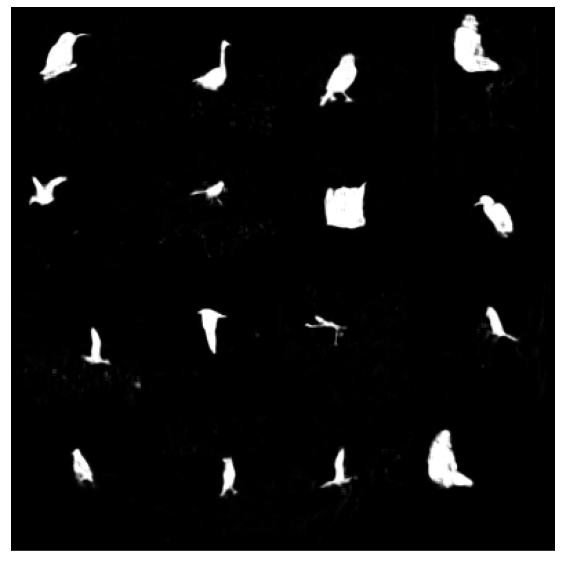

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


  0%|          | 3/17500 [00:01<3:06:40,  1.56it/s]

Train Epoch: 8 [0/280000 (0%)]	Loss: 0.022878
IOU : 0.9026661024121879


  3%|▎         | 503/17500 [00:53<30:47,  9.20it/s]

Train Epoch: 8 [1500/280000 (3%)]	Loss: 0.017671
IOU : 0.9078187472234562


  6%|▌         | 1003/17500 [01:45<29:54,  9.19it/s]

Train Epoch: 8 [3000/280000 (6%)]	Loss: 0.019004
IOU : 0.9132518571770908


  9%|▊         | 1503/17500 [02:37<29:04,  9.17it/s]

Train Epoch: 8 [4500/280000 (9%)]	Loss: 0.018776
IOU : 0.906074074074074


 11%|█▏        | 2003/17500 [03:29<28:03,  9.21it/s]

Train Epoch: 8 [6000/280000 (11%)]	Loss: 0.014052
IOU : 0.9178082191780822


 14%|█▍        | 2503/17500 [04:21<27:16,  9.16it/s]

Train Epoch: 8 [7500/280000 (14%)]	Loss: 0.018430
IOU : 0.9135853759867054


 17%|█▋        | 3003/17500 [05:13<26:12,  9.22it/s]

Train Epoch: 8 [9000/280000 (17%)]	Loss: 0.015306
IOU : 0.9207622868605817


 20%|██        | 3503/17500 [06:06<25:23,  9.19it/s]

Train Epoch: 8 [10500/280000 (20%)]	Loss: 0.023405
IOU : 0.904124149659864


 23%|██▎       | 4003/17500 [06:58<24:31,  9.17it/s]

Train Epoch: 8 [12000/280000 (23%)]	Loss: 0.029774
IOU : 0.8711172925359295


 26%|██▌       | 4503/17500 [07:50<23:36,  9.17it/s]

Train Epoch: 8 [13500/280000 (26%)]	Loss: 0.020737
IOU : 0.9005538165181797


 29%|██▊       | 5003/17500 [08:42<22:40,  9.18it/s]

Train Epoch: 8 [15000/280000 (29%)]	Loss: 0.016738
IOU : 0.9174973488865323


 31%|███▏      | 5503/17500 [09:34<21:36,  9.25it/s]

Train Epoch: 8 [16500/280000 (31%)]	Loss: 0.013107
IOU : 0.9297560975609757


 34%|███▍      | 6003/17500 [10:26<20:47,  9.22it/s]

Train Epoch: 8 [18000/280000 (34%)]	Loss: 0.020456
IOU : 0.9098280895231917


 37%|███▋      | 6503/17500 [11:19<19:52,  9.22it/s]

Train Epoch: 8 [19500/280000 (37%)]	Loss: 0.015934
IOU : 0.9237704918032786


 40%|████      | 7003/17500 [12:11<19:02,  9.19it/s]

Train Epoch: 8 [21000/280000 (40%)]	Loss: 0.018639
IOU : 0.91395101171459


 43%|████▎     | 7503/17500 [13:03<18:10,  9.16it/s]

Train Epoch: 8 [22500/280000 (43%)]	Loss: 0.016492
IOU : 0.9086560364464692


 46%|████▌     | 8003/17500 [13:55<17:19,  9.13it/s]

Train Epoch: 8 [24000/280000 (46%)]	Loss: 0.013467
IOU : 0.9347144846796658


 49%|████▊     | 8503/17500 [14:47<16:20,  9.18it/s]

Train Epoch: 8 [25500/280000 (49%)]	Loss: 0.016890
IOU : 0.9066131417705472


 51%|█████▏    | 9003/17500 [15:40<15:15,  9.28it/s]

Train Epoch: 8 [27000/280000 (51%)]	Loss: 0.022791
IOU : 0.8909853249475891


 54%|█████▍    | 9503/17500 [16:32<14:33,  9.16it/s]

Train Epoch: 8 [28500/280000 (54%)]	Loss: 0.021803
IOU : 0.9076611997303977


 57%|█████▋    | 10003/17500 [17:24<13:36,  9.18it/s]

Train Epoch: 8 [30000/280000 (57%)]	Loss: 0.015280
IOU : 0.9243680066307501


 60%|██████    | 10503/17500 [18:16<12:47,  9.12it/s]

Train Epoch: 8 [31500/280000 (60%)]	Loss: 0.017250
IOU : 0.9093011305241521


 63%|██████▎   | 11003/17500 [19:08<11:52,  9.12it/s]

Train Epoch: 8 [33000/280000 (63%)]	Loss: 0.015316
IOU : 0.9242914979757085


 66%|██████▌   | 11503/17500 [20:00<10:49,  9.23it/s]

Train Epoch: 8 [34500/280000 (66%)]	Loss: 0.020866
IOU : 0.9035920726672172


 69%|██████▊   | 12003/17500 [20:52<10:00,  9.16it/s]

Train Epoch: 8 [36000/280000 (69%)]	Loss: 0.016492
IOU : 0.9213579716373013


 71%|███████▏  | 12503/17500 [21:44<09:04,  9.18it/s]

Train Epoch: 8 [37500/280000 (71%)]	Loss: 0.016307
IOU : 0.919921875


 74%|███████▍  | 13003/17500 [22:37<08:08,  9.21it/s]

Train Epoch: 8 [39000/280000 (74%)]	Loss: 0.016458
IOU : 0.9183241641980533


 77%|███████▋  | 13503/17500 [23:29<07:16,  9.16it/s]

Train Epoch: 8 [40500/280000 (77%)]	Loss: 0.020787
IOU : 0.8955543652919121


 80%|████████  | 14003/17500 [24:21<06:21,  9.17it/s]

Train Epoch: 8 [42000/280000 (80%)]	Loss: 0.017593
IOU : 0.923659169550173


 83%|████████▎ | 14503/17500 [25:13<05:26,  9.18it/s]

Train Epoch: 8 [43500/280000 (83%)]	Loss: 0.017377
IOU : 0.9134364679297757


 86%|████████▌ | 15003/17500 [26:05<04:31,  9.19it/s]

Train Epoch: 8 [45000/280000 (86%)]	Loss: 0.018160
IOU : 0.9143393080450187


 89%|████████▊ | 15503/17500 [26:57<03:37,  9.18it/s]

Train Epoch: 8 [46500/280000 (89%)]	Loss: 0.017849
IOU : 0.9209438511884258


 91%|█████████▏| 16003/17500 [27:49<02:42,  9.20it/s]

Train Epoch: 8 [48000/280000 (91%)]	Loss: 0.021070
IOU : 0.9061032863849765


 94%|█████████▍| 16503/17500 [28:42<01:48,  9.20it/s]

Train Epoch: 8 [49500/280000 (94%)]	Loss: 0.012610
IOU : 0.9328808446455505


 97%|█████████▋| 17003/17500 [29:34<00:53,  9.25it/s]

Train Epoch: 8 [51000/280000 (97%)]	Loss: 0.018759
IOU : 0.9027126249235162


100%|██████████| 17500/17500 [30:26<00:00,  9.58it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.056576596722615974


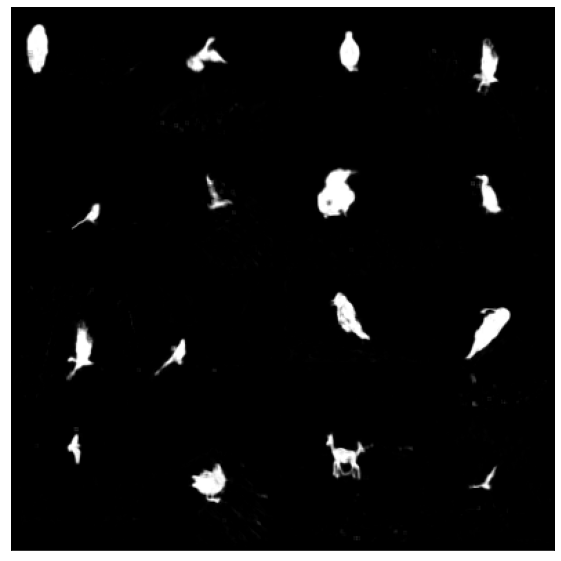

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


  0%|          | 3/17500 [00:00<2:11:52,  2.21it/s]

Train Epoch: 9 [0/280000 (0%)]	Loss: 0.028792
IOU : 0.873637264618434


  3%|▎         | 503/17500 [00:52<30:50,  9.19it/s]

Train Epoch: 9 [1500/280000 (3%)]	Loss: 0.012456
IOU : 0.9312330623306233


  6%|▌         | 1003/17500 [01:45<29:58,  9.17it/s]

Train Epoch: 9 [3000/280000 (6%)]	Loss: 0.015314
IOU : 0.9176611874202507


  9%|▊         | 1503/17500 [02:37<28:57,  9.20it/s]

Train Epoch: 9 [4500/280000 (9%)]	Loss: 0.023424
IOU : 0.8898139079333987


 11%|█▏        | 2003/17500 [03:29<28:20,  9.11it/s]

Train Epoch: 9 [6000/280000 (11%)]	Loss: 0.033762
IOU : 0.8597826086956522


 14%|█▍        | 2503/17500 [04:21<27:14,  9.18it/s]

Train Epoch: 9 [7500/280000 (14%)]	Loss: 0.014427
IOU : 0.9228039041703638


 17%|█▋        | 3003/17500 [05:13<26:21,  9.16it/s]

Train Epoch: 9 [9000/280000 (17%)]	Loss: 0.015389
IOU : 0.9242092699423116


 20%|██        | 3503/17500 [06:05<25:22,  9.20it/s]

Train Epoch: 9 [10500/280000 (20%)]	Loss: 0.013110
IOU : 0.9325678496868476


 23%|██▎       | 4003/17500 [06:58<24:25,  9.21it/s]

Train Epoch: 9 [12000/280000 (23%)]	Loss: 0.023673
IOU : 0.8969307341352136


 26%|██▌       | 4503/17500 [07:50<23:30,  9.21it/s]

Train Epoch: 9 [13500/280000 (26%)]	Loss: 0.013142
IOU : 0.9143189755529686


 29%|██▊       | 5003/17500 [08:42<22:33,  9.23it/s]

Train Epoch: 9 [15000/280000 (29%)]	Loss: 0.015428
IOU : 0.9128494244773314


 31%|███▏      | 5503/17500 [09:34<21:50,  9.15it/s]

Train Epoch: 9 [16500/280000 (31%)]	Loss: 0.038036
IOU : 0.8458844133099825


 34%|███▍      | 6003/17500 [10:26<20:49,  9.20it/s]

Train Epoch: 9 [18000/280000 (34%)]	Loss: 0.015876
IOU : 0.9171421483502853


 37%|███▋      | 6503/17500 [11:18<19:56,  9.19it/s]

Train Epoch: 9 [19500/280000 (37%)]	Loss: 0.027667
IOU : 0.8602522879050211


 40%|████      | 7003/17500 [12:11<19:09,  9.13it/s]

Train Epoch: 9 [21000/280000 (40%)]	Loss: 0.014171
IOU : 0.9249473930324994


 43%|████▎     | 7503/17500 [13:03<18:05,  9.21it/s]

Train Epoch: 9 [22500/280000 (43%)]	Loss: 0.032949
IOU : 0.864853195164076


 46%|████▌     | 8003/17500 [13:55<17:07,  9.24it/s]

Train Epoch: 9 [24000/280000 (46%)]	Loss: 0.019834
IOU : 0.898589299973383


 49%|████▊     | 8503/17500 [14:47<16:20,  9.18it/s]

Train Epoch: 9 [25500/280000 (49%)]	Loss: 0.013035
IOU : 0.9235613463626493


 51%|█████▏    | 9003/17500 [15:39<15:28,  9.15it/s]

Train Epoch: 9 [27000/280000 (51%)]	Loss: 0.016624
IOU : 0.9184702668627863


 54%|█████▍    | 9503/17500 [16:31<14:21,  9.28it/s]

Train Epoch: 9 [28500/280000 (54%)]	Loss: 0.010884
IOU : 0.9328600405679514


 57%|█████▋    | 10003/17500 [17:24<13:34,  9.20it/s]

Train Epoch: 9 [30000/280000 (57%)]	Loss: 0.013925
IOU : 0.9239850869925434


 60%|██████    | 10503/17500 [18:16<12:40,  9.19it/s]

Train Epoch: 9 [31500/280000 (60%)]	Loss: 0.017388
IOU : 0.9106628242074928


 63%|██████▎   | 11003/17500 [19:08<11:47,  9.18it/s]

Train Epoch: 9 [33000/280000 (63%)]	Loss: 0.014559
IOU : 0.93


 66%|██████▌   | 11503/17500 [20:00<10:51,  9.21it/s]

Train Epoch: 9 [34500/280000 (66%)]	Loss: 0.025462
IOU : 0.9030121768852809


 69%|██████▊   | 12003/17500 [20:52<09:58,  9.19it/s]

Train Epoch: 9 [36000/280000 (69%)]	Loss: 0.013594
IOU : 0.9251535494929296


 71%|███████▏  | 12503/17500 [21:44<09:02,  9.22it/s]

Train Epoch: 9 [37500/280000 (71%)]	Loss: 0.026396
IOU : 0.8775600088086325


 74%|███████▍  | 13003/17500 [22:37<08:10,  9.18it/s]

Train Epoch: 9 [39000/280000 (74%)]	Loss: 0.018316
IOU : 0.9106771915247196


 77%|███████▋  | 13503/17500 [23:29<07:14,  9.20it/s]

Train Epoch: 9 [40500/280000 (77%)]	Loss: 0.013440
IOU : 0.9321506949524506


 80%|████████  | 14003/17500 [24:21<06:20,  9.18it/s]

Train Epoch: 9 [42000/280000 (80%)]	Loss: 0.013178
IOU : 0.9314285714285714


 83%|████████▎ | 14503/17500 [25:13<05:27,  9.16it/s]

Train Epoch: 9 [43500/280000 (83%)]	Loss: 0.021415
IOU : 0.9135964092014214


 86%|████████▌ | 15003/17500 [26:05<04:32,  9.18it/s]

Train Epoch: 9 [45000/280000 (86%)]	Loss: 0.017137
IOU : 0.9179586563307494


 89%|████████▊ | 15503/17500 [26:58<03:36,  9.22it/s]

Train Epoch: 9 [46500/280000 (89%)]	Loss: 0.032340
IOU : 0.8678478071449317


 91%|█████████▏| 16003/17500 [27:50<02:42,  9.21it/s]

Train Epoch: 9 [48000/280000 (91%)]	Loss: 0.015696
IOU : 0.9150963829326403


 94%|█████████▍| 16503/17500 [28:42<01:48,  9.21it/s]

Train Epoch: 9 [49500/280000 (94%)]	Loss: 0.016593
IOU : 0.9145374449339208


 97%|█████████▋| 17003/17500 [29:34<00:53,  9.21it/s]

Train Epoch: 9 [51000/280000 (97%)]	Loss: 0.012252
IOU : 0.9348876286494434


100%|██████████| 17500/17500 [30:26<00:00,  9.58it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.0566771001561166


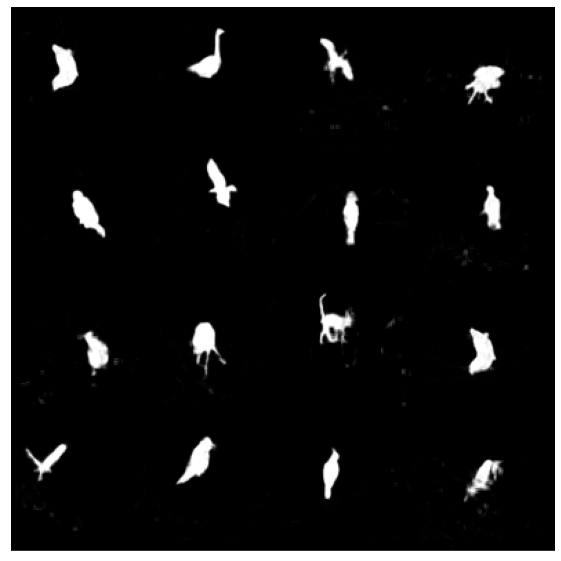

Learning rate = 0.01  for epoch:  10


In [16]:
image_size= 96
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou =train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [17]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-96K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

  0%|          | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 1/17500 [00:01<6:13:58,  1.28s/it]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.076300
IOU : 0.7990663689872133


  3%|▎         | 501/17500 [01:33<1:01:59,  4.57it/s]

Train Epoch: 1 [1500/280000 (3%)]	Loss: 0.050600
IOU : 0.8634920634920635


  6%|▌         | 1001/17500 [03:05<1:00:16,  4.56it/s]

Train Epoch: 1 [3000/280000 (6%)]	Loss: 0.047903
IOU : 0.8581866091747514


  9%|▊         | 1501/17500 [04:36<58:19,  4.57it/s]

Train Epoch: 1 [4500/280000 (9%)]	Loss: 0.048607
IOU : 0.8566281184585293


 11%|█▏        | 2001/17500 [06:08<56:30,  4.57it/s]

Train Epoch: 1 [6000/280000 (11%)]	Loss: 0.028560
IOU : 0.9116704805491991


 14%|█▍        | 2501/17500 [07:40<54:42,  4.57it/s]

Train Epoch: 1 [7500/280000 (14%)]	Loss: 0.034981
IOU : 0.873838355392847


 17%|█▋        | 3001/17500 [09:12<52:52,  4.57it/s]

Train Epoch: 1 [9000/280000 (17%)]	Loss: 0.039558
IOU : 0.8752107925801011


 20%|██        | 3501/17500 [10:44<51:04,  4.57it/s]

Train Epoch: 1 [10500/280000 (20%)]	Loss: 0.038663
IOU : 0.8741608690345417


 23%|██▎       | 4001/17500 [12:16<49:22,  4.56it/s]

Train Epoch: 1 [12000/280000 (23%)]	Loss: 0.031180
IOU : 0.8942379645796957


 26%|██▌       | 4501/17500 [13:48<47:18,  4.58it/s]

Train Epoch: 1 [13500/280000 (26%)]	Loss: 0.043427
IOU : 0.8576349024110218


 29%|██▊       | 5001/17500 [15:19<45:33,  4.57it/s]

Train Epoch: 1 [15000/280000 (29%)]	Loss: 0.034894
IOU : 0.8814328358208955


 31%|███▏      | 5501/17500 [16:51<43:42,  4.58it/s]

Train Epoch: 1 [16500/280000 (31%)]	Loss: 0.036700
IOU : 0.8766957689724647


 34%|███▍      | 6001/17500 [18:23<41:52,  4.58it/s]

Train Epoch: 1 [18000/280000 (34%)]	Loss: 0.035332
IOU : 0.872109158186864


 37%|███▋      | 6501/17500 [19:55<40:01,  4.58it/s]

Train Epoch: 1 [19500/280000 (37%)]	Loss: 0.030126
IOU : 0.8969017094017094


 40%|████      | 7001/17500 [21:27<38:17,  4.57it/s]

Train Epoch: 1 [21000/280000 (40%)]	Loss: 0.027762
IOU : 0.9020507672450881


 43%|████▎     | 7501/17500 [22:58<36:22,  4.58it/s]

Train Epoch: 1 [22500/280000 (43%)]	Loss: 0.030751
IOU : 0.8921135646687697


 46%|████▌     | 8001/17500 [24:30<34:35,  4.58it/s]

Train Epoch: 1 [24000/280000 (46%)]	Loss: 0.027869
IOU : 0.9021621621621622


 49%|████▊     | 8501/17500 [26:02<32:49,  4.57it/s]

Train Epoch: 1 [25500/280000 (49%)]	Loss: 0.039832
IOU : 0.8777415363851085


 51%|█████▏    | 9001/17500 [27:34<30:55,  4.58it/s]

Train Epoch: 1 [27000/280000 (51%)]	Loss: 0.030315
IOU : 0.88471355643789


 54%|█████▍    | 9501/17500 [29:05<29:02,  4.59it/s]

Train Epoch: 1 [28500/280000 (54%)]	Loss: 0.031859
IOU : 0.8824796553374821


 57%|█████▋    | 10001/17500 [30:37<27:14,  4.59it/s]

Train Epoch: 1 [30000/280000 (57%)]	Loss: 0.021145
IOU : 0.928118609406953


 60%|██████    | 10501/17500 [32:08<25:30,  4.57it/s]

Train Epoch: 1 [31500/280000 (60%)]	Loss: 0.030631
IOU : 0.8857066381156317


 63%|██████▎   | 11001/17500 [33:40<23:38,  4.58it/s]

Train Epoch: 1 [33000/280000 (63%)]	Loss: 0.027701
IOU : 0.9082125603864735


 66%|██████▌   | 11501/17500 [35:12<21:47,  4.59it/s]

Train Epoch: 1 [34500/280000 (66%)]	Loss: 0.028945
IOU : 0.8967995357764585


 69%|██████▊   | 12001/17500 [36:43<19:59,  4.58it/s]

Train Epoch: 1 [36000/280000 (69%)]	Loss: 0.033387
IOU : 0.8771740595928272


 71%|███████▏  | 12501/17500 [38:15<18:10,  4.58it/s]

Train Epoch: 1 [37500/280000 (71%)]	Loss: 0.034781
IOU : 0.8852853173755076


 74%|███████▍  | 13001/17500 [39:46<16:23,  4.57it/s]

Train Epoch: 1 [39000/280000 (74%)]	Loss: 0.028874
IOU : 0.9057836971266494


 77%|███████▋  | 13501/17500 [41:18<14:31,  4.59it/s]

Train Epoch: 1 [40500/280000 (77%)]	Loss: 0.028157
IOU : 0.8932998819362455


 80%|████████  | 14001/17500 [42:50<12:45,  4.57it/s]

Train Epoch: 1 [42000/280000 (80%)]	Loss: 0.033891
IOU : 0.877470775770457


 83%|████████▎ | 14501/17500 [44:21<10:54,  4.58it/s]

Train Epoch: 1 [43500/280000 (83%)]	Loss: 0.030132
IOU : 0.8975690048113446


 86%|████████▌ | 15001/17500 [45:53<09:05,  4.58it/s]

Train Epoch: 1 [45000/280000 (86%)]	Loss: 0.027710
IOU : 0.8992899408284024


 89%|████████▊ | 15501/17500 [47:25<07:16,  4.58it/s]

Train Epoch: 1 [46500/280000 (89%)]	Loss: 0.029521
IOU : 0.9074274871238818


 91%|█████████▏| 16001/17500 [48:56<05:26,  4.59it/s]

Train Epoch: 1 [48000/280000 (91%)]	Loss: 0.016740
IOU : 0.9339202690671679


 94%|█████████▍| 16501/17500 [50:28<03:38,  4.58it/s]

Train Epoch: 1 [49500/280000 (94%)]	Loss: 0.041034
IOU : 0.8625870282154635


 97%|█████████▋| 17001/17500 [52:00<01:48,  4.58it/s]

Train Epoch: 1 [51000/280000 (97%)]	Loss: 0.022872
IOU : 0.9137103227527341


100%|██████████| 17500/17500 [53:31<00:00,  5.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.055276415109975226


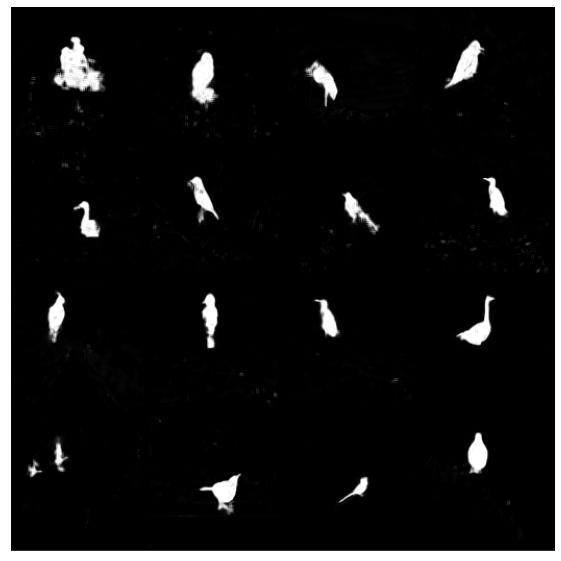

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


  0%|          | 1/17500 [00:00<3:30:47,  1.38it/s]

Train Epoch: 2 [0/280000 (0%)]	Loss: 0.029887
IOU : 0.88590692755156


  3%|▎         | 501/17500 [01:32<1:01:49,  4.58it/s]

Train Epoch: 2 [1500/280000 (3%)]	Loss: 0.031516
IOU : 0.8846575342465753


  6%|▌         | 1001/17500 [03:04<1:00:04,  4.58it/s]

Train Epoch: 2 [3000/280000 (6%)]	Loss: 0.025568
IOU : 0.903205791106515


  9%|▊         | 1501/17500 [04:35<58:16,  4.58it/s]

Train Epoch: 2 [4500/280000 (9%)]	Loss: 0.020926
IOU : 0.9111426360588084


 11%|█▏        | 2001/17500 [06:07<56:32,  4.57it/s]

Train Epoch: 2 [6000/280000 (11%)]	Loss: 0.019484
IOU : 0.9302112962210484


 14%|█▍        | 2501/17500 [07:39<54:30,  4.59it/s]

Train Epoch: 2 [7500/280000 (14%)]	Loss: 0.021514
IOU : 0.9154436777140635


 17%|█▋        | 3001/17500 [09:10<52:41,  4.59it/s]

Train Epoch: 2 [9000/280000 (17%)]	Loss: 0.028433
IOU : 0.8949027850761955


 20%|██        | 3501/17500 [10:42<51:01,  4.57it/s]

Train Epoch: 2 [10500/280000 (20%)]	Loss: 0.027509
IOU : 0.8972379688819202


 23%|██▎       | 4001/17500 [12:14<49:04,  4.58it/s]

Train Epoch: 2 [12000/280000 (23%)]	Loss: 0.030319
IOU : 0.8927371413802015


 26%|██▌       | 4501/17500 [13:45<47:14,  4.59it/s]

Train Epoch: 2 [13500/280000 (26%)]	Loss: 0.031787
IOU : 0.8956539778031325


 29%|██▊       | 5001/17500 [15:17<45:23,  4.59it/s]

Train Epoch: 2 [15000/280000 (29%)]	Loss: 0.021797
IOU : 0.9178809225127859


 31%|███▏      | 5501/17500 [16:49<43:40,  4.58it/s]

Train Epoch: 2 [16500/280000 (31%)]	Loss: 0.024567
IOU : 0.9029075121694514


 34%|███▍      | 6001/17500 [18:20<41:51,  4.58it/s]

Train Epoch: 2 [18000/280000 (34%)]	Loss: 0.033870
IOU : 0.8744824016563147


 37%|███▋      | 6501/17500 [19:52<40:04,  4.58it/s]

Train Epoch: 2 [19500/280000 (37%)]	Loss: 0.022674
IOU : 0.9102275920202304


 40%|████      | 7001/17500 [21:24<38:16,  4.57it/s]

Train Epoch: 2 [21000/280000 (40%)]	Loss: 0.032531
IOU : 0.8801829268292682


 43%|████▎     | 7501/17500 [22:55<36:22,  4.58it/s]

Train Epoch: 2 [22500/280000 (43%)]	Loss: 0.016367
IOU : 0.9252099873432287


 46%|████▌     | 8001/17500 [24:27<34:32,  4.58it/s]

Train Epoch: 2 [24000/280000 (46%)]	Loss: 0.028056
IOU : 0.9056747010817991


 49%|████▊     | 8501/17500 [25:59<32:41,  4.59it/s]

Train Epoch: 2 [25500/280000 (49%)]	Loss: 0.019548
IOU : 0.9084285714285715


 51%|█████▏    | 9001/17500 [27:30<30:53,  4.58it/s]

Train Epoch: 2 [27000/280000 (51%)]	Loss: 0.039611
IOU : 0.8679603745420003


 54%|█████▍    | 9501/17500 [29:02<29:07,  4.58it/s]

Train Epoch: 2 [28500/280000 (54%)]	Loss: 0.027440
IOU : 0.8961857728275717


 57%|█████▋    | 10001/17500 [30:34<27:13,  4.59it/s]

Train Epoch: 2 [30000/280000 (57%)]	Loss: 0.046779
IOU : 0.8371411833626244


 60%|██████    | 10501/17500 [32:05<25:26,  4.58it/s]

Train Epoch: 2 [31500/280000 (60%)]	Loss: 0.023931
IOU : 0.9074889867841409


 63%|██████▎   | 11001/17500 [33:37<23:38,  4.58it/s]

Train Epoch: 2 [33000/280000 (63%)]	Loss: 0.029757
IOU : 0.8919206236711552


 66%|██████▌   | 11501/17500 [35:09<21:51,  4.57it/s]

Train Epoch: 2 [34500/280000 (66%)]	Loss: 0.020330
IOU : 0.9143730886850153


 69%|██████▊   | 12001/17500 [36:40<19:58,  4.59it/s]

Train Epoch: 2 [36000/280000 (69%)]	Loss: 0.039476
IOU : 0.8715033990861474


 71%|███████▏  | 12501/17500 [38:12<18:12,  4.58it/s]

Train Epoch: 2 [37500/280000 (71%)]	Loss: 0.017284
IOU : 0.9244376278118609


 74%|███████▍  | 13001/17500 [39:43<16:21,  4.58it/s]

Train Epoch: 2 [39000/280000 (74%)]	Loss: 0.029749
IOU : 0.8886979510905486


 77%|███████▋  | 13501/17500 [41:15<14:32,  4.58it/s]

Train Epoch: 2 [40500/280000 (77%)]	Loss: 0.028353
IOU : 0.8939295039164491


 80%|████████  | 14001/17500 [42:47<12:42,  4.59it/s]

Train Epoch: 2 [42000/280000 (80%)]	Loss: 0.032971
IOU : 0.879284649776453


 83%|████████▎ | 14501/17500 [44:18<10:54,  4.58it/s]

Train Epoch: 2 [43500/280000 (83%)]	Loss: 0.024622
IOU : 0.9032840537185419


 86%|████████▌ | 15001/17500 [45:50<09:04,  4.59it/s]

Train Epoch: 2 [45000/280000 (86%)]	Loss: 0.019495
IOU : 0.9289311163895487


 89%|████████▊ | 15501/17500 [47:21<07:16,  4.58it/s]

Train Epoch: 2 [46500/280000 (89%)]	Loss: 0.019343
IOU : 0.9119193067197046


 91%|█████████▏| 16001/17500 [48:53<05:27,  4.58it/s]

Train Epoch: 2 [48000/280000 (91%)]	Loss: 0.022889
IOU : 0.8992329149232915


 94%|█████████▍| 16501/17500 [50:25<03:38,  4.56it/s]

Train Epoch: 2 [49500/280000 (94%)]	Loss: 0.030068
IOU : 0.8803316243045708


 97%|█████████▋| 17001/17500 [51:56<01:48,  4.58it/s]

Train Epoch: 2 [51000/280000 (97%)]	Loss: 0.016922
IOU : 0.9229228049499116


100%|██████████| 17500/17500 [53:28<00:00,  5.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05594683214667161


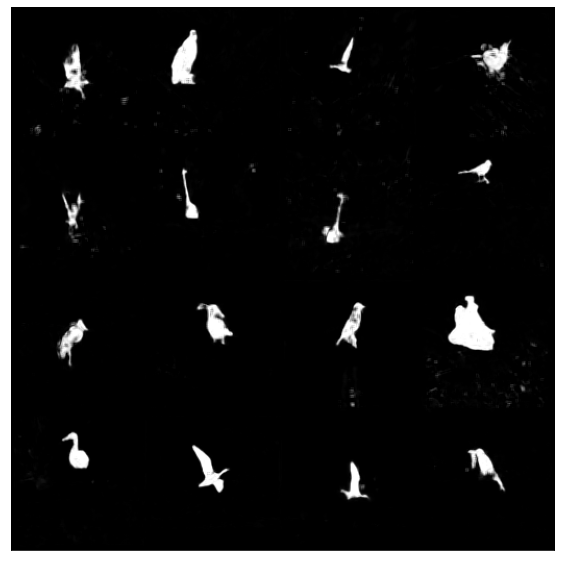

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  3
EPOCH: 3


  0%|          | 1/17500 [00:00<3:31:50,  1.38it/s]

Train Epoch: 3 [0/280000 (0%)]	Loss: 0.019182
IOU : 0.919327111984283


  3%|▎         | 501/17500 [01:32<1:01:53,  4.58it/s]

Train Epoch: 3 [1500/280000 (3%)]	Loss: 0.012119
IOU : 0.9388661202185792


  6%|▌         | 1001/17500 [03:03<59:57,  4.59it/s]

Train Epoch: 3 [3000/280000 (6%)]	Loss: 0.028743
IOU : 0.8971533516988063


  9%|▊         | 1501/17500 [04:35<58:13,  4.58it/s]

Train Epoch: 3 [4500/280000 (9%)]	Loss: 0.030601
IOU : 0.8955588091752075


 11%|█▏        | 2001/17500 [06:07<56:16,  4.59it/s]

Train Epoch: 3 [6000/280000 (11%)]	Loss: 0.020252
IOU : 0.9205133306804616


 14%|█▍        | 2501/17500 [07:38<54:37,  4.58it/s]

Train Epoch: 3 [7500/280000 (14%)]	Loss: 0.021416
IOU : 0.9144271570014144


 17%|█▋        | 3001/17500 [09:10<53:02,  4.56it/s]

Train Epoch: 3 [9000/280000 (17%)]	Loss: 0.038340
IOU : 0.8678491131651261


 20%|██        | 3501/17500 [10:42<50:53,  4.58it/s]

Train Epoch: 3 [10500/280000 (20%)]	Loss: 0.035092
IOU : 0.8793530997304583


 23%|██▎       | 4001/17500 [12:13<49:05,  4.58it/s]

Train Epoch: 3 [12000/280000 (23%)]	Loss: 0.026017
IOU : 0.9079010566762729


 26%|██▌       | 4501/17500 [13:45<47:12,  4.59it/s]

Train Epoch: 3 [13500/280000 (26%)]	Loss: 0.025686
IOU : 0.893759372476641


 29%|██▊       | 5001/17500 [15:16<45:26,  4.58it/s]

Train Epoch: 3 [15000/280000 (29%)]	Loss: 0.023529
IOU : 0.9111803243475459


 31%|███▏      | 5501/17500 [16:48<43:42,  4.57it/s]

Train Epoch: 3 [16500/280000 (31%)]	Loss: 0.030727
IOU : 0.8767879775484339


 34%|███▍      | 6001/17500 [18:20<41:50,  4.58it/s]

Train Epoch: 3 [18000/280000 (34%)]	Loss: 0.029087
IOU : 0.8926795580110497


 37%|███▋      | 6501/17500 [19:51<40:01,  4.58it/s]

Train Epoch: 3 [19500/280000 (37%)]	Loss: 0.032515
IOU : 0.8728354978354979


 40%|████      | 7001/17500 [21:23<38:10,  4.58it/s]

Train Epoch: 3 [21000/280000 (40%)]	Loss: 0.029031
IOU : 0.8892752363359774


 43%|████▎     | 7501/17500 [22:54<36:17,  4.59it/s]

Train Epoch: 3 [22500/280000 (43%)]	Loss: 0.018195
IOU : 0.9191294387170675


 46%|████▌     | 8001/17500 [24:26<34:33,  4.58it/s]

Train Epoch: 3 [24000/280000 (46%)]	Loss: 0.022950
IOU : 0.909820788530466


 49%|████▊     | 8501/17500 [25:57<32:46,  4.58it/s]

Train Epoch: 3 [25500/280000 (49%)]	Loss: 0.022531
IOU : 0.9243867828907358


 51%|█████▏    | 9001/17500 [27:29<30:51,  4.59it/s]

Train Epoch: 3 [27000/280000 (51%)]	Loss: 0.026486
IOU : 0.9069471900593052


 54%|█████▍    | 9501/17500 [29:01<29:06,  4.58it/s]

Train Epoch: 3 [28500/280000 (54%)]	Loss: 0.015362
IOU : 0.9382107275837778


 57%|█████▋    | 10001/17500 [30:32<27:15,  4.59it/s]

Train Epoch: 3 [30000/280000 (57%)]	Loss: 0.028998
IOU : 0.892807523778989


 60%|██████    | 10501/17500 [32:04<25:25,  4.59it/s]

Train Epoch: 3 [31500/280000 (60%)]	Loss: 0.021901
IOU : 0.9105139898927647


 63%|██████▎   | 11001/17500 [33:35<23:37,  4.58it/s]

Train Epoch: 3 [33000/280000 (63%)]	Loss: 0.024730
IOU : 0.9045407636738906


 66%|██████▌   | 11501/17500 [35:07<21:51,  4.57it/s]

Train Epoch: 3 [34500/280000 (66%)]	Loss: 0.024459
IOU : 0.9066927210552027


 69%|██████▊   | 12001/17500 [36:39<19:59,  4.58it/s]

Train Epoch: 3 [36000/280000 (69%)]	Loss: 0.029342
IOU : 0.8898397669337218


 71%|███████▏  | 12501/17500 [38:10<18:10,  4.59it/s]

Train Epoch: 3 [37500/280000 (71%)]	Loss: 0.020998
IOU : 0.9180980548288021


 74%|███████▍  | 13001/17500 [39:42<16:21,  4.58it/s]

Train Epoch: 3 [39000/280000 (74%)]	Loss: 0.031699
IOU : 0.8754165323014081


 77%|███████▋  | 13501/17500 [41:14<14:34,  4.57it/s]

Train Epoch: 3 [40500/280000 (77%)]	Loss: 0.028140
IOU : 0.8976336912331909


 80%|████████  | 14001/17500 [42:45<12:44,  4.58it/s]

Train Epoch: 3 [42000/280000 (80%)]	Loss: 0.024080
IOU : 0.904050925925926


 83%|████████▎ | 14501/17500 [44:17<10:54,  4.58it/s]

Train Epoch: 3 [43500/280000 (83%)]	Loss: 0.031139
IOU : 0.8795477605450065


 86%|████████▌ | 15001/17500 [45:49<09:05,  4.58it/s]

Train Epoch: 3 [45000/280000 (86%)]	Loss: 0.032587
IOU : 0.8826530612244898


 89%|████████▊ | 15501/17500 [47:20<07:16,  4.58it/s]

Train Epoch: 3 [46500/280000 (89%)]	Loss: 0.025591
IOU : 0.8992622742304757


 91%|█████████▏| 16001/17500 [48:52<05:26,  4.59it/s]

Train Epoch: 3 [48000/280000 (91%)]	Loss: 0.035068
IOU : 0.8791828108488905


 94%|█████████▍| 16501/17500 [50:23<03:38,  4.58it/s]

Train Epoch: 3 [49500/280000 (94%)]	Loss: 0.026503
IOU : 0.8969029593943565


 97%|█████████▋| 17001/17500 [51:55<01:48,  4.59it/s]

Train Epoch: 3 [51000/280000 (97%)]	Loss: 0.026556
IOU : 0.8964971751412429


100%|██████████| 17500/17500 [53:26<00:00,  5.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.056193935816241124


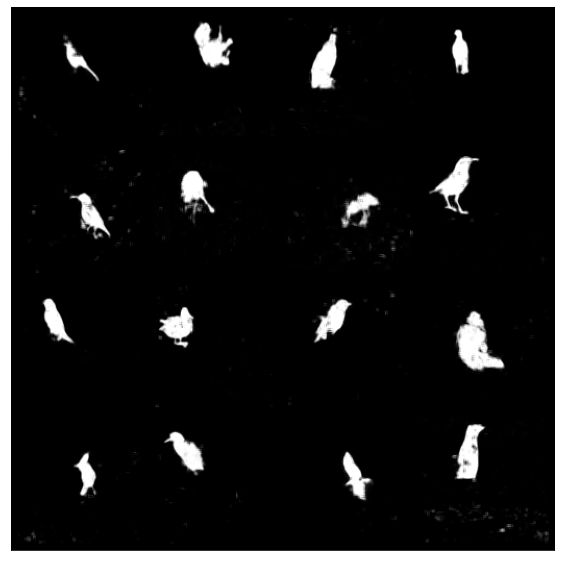

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  4
EPOCH: 4


  0%|          | 1/17500 [00:00<3:32:38,  1.37it/s]

Train Epoch: 4 [0/280000 (0%)]	Loss: 0.018966
IOU : 0.9236960721184804


  3%|▎         | 501/17500 [01:32<1:01:45,  4.59it/s]

Train Epoch: 4 [1500/280000 (3%)]	Loss: 0.033151
IOU : 0.8728261880405468


  6%|▌         | 1001/17500 [03:04<1:00:16,  4.56it/s]

Train Epoch: 4 [3000/280000 (6%)]	Loss: 0.018317
IOU : 0.9181024580748909


  9%|▊         | 1501/17500 [04:35<58:33,  4.55it/s]

Train Epoch: 4 [4500/280000 (9%)]	Loss: 0.021556
IOU : 0.9156400642742367


 11%|█▏        | 2001/17500 [06:07<56:19,  4.59it/s]

Train Epoch: 4 [6000/280000 (11%)]	Loss: 0.018440
IOU : 0.9240913477002252


 14%|█▍        | 2501/17500 [07:39<54:33,  4.58it/s]

Train Epoch: 4 [7500/280000 (14%)]	Loss: 0.032097
IOU : 0.8752534126233275


 17%|█▋        | 3001/17500 [09:10<52:59,  4.56it/s]

Train Epoch: 4 [9000/280000 (17%)]	Loss: 0.023802
IOU : 0.9089328318977719


 20%|██        | 3501/17500 [10:42<50:56,  4.58it/s]

Train Epoch: 4 [10500/280000 (20%)]	Loss: 0.033631
IOU : 0.8900892437764208


 23%|██▎       | 4001/17500 [12:14<49:11,  4.57it/s]

Train Epoch: 4 [12000/280000 (23%)]	Loss: 0.028346
IOU : 0.8828730784927221


 26%|██▌       | 4501/17500 [13:46<47:17,  4.58it/s]

Train Epoch: 4 [13500/280000 (26%)]	Loss: 0.023246
IOU : 0.9094966761633428


 29%|██▊       | 5001/17500 [15:17<45:30,  4.58it/s]

Train Epoch: 4 [15000/280000 (29%)]	Loss: 0.027461
IOU : 0.8880151843817787


 31%|███▏      | 5501/17500 [16:49<43:41,  4.58it/s]

Train Epoch: 4 [16500/280000 (31%)]	Loss: 0.024913
IOU : 0.9056294956282035


 34%|███▍      | 6001/17500 [18:21<42:00,  4.56it/s]

Train Epoch: 4 [18000/280000 (34%)]	Loss: 0.019536
IOU : 0.9185766614338043


 37%|███▋      | 6501/17500 [19:53<40:08,  4.57it/s]

Train Epoch: 4 [19500/280000 (37%)]	Loss: 0.020259
IOU : 0.9128889977946582


 40%|████      | 7001/17500 [21:24<38:19,  4.57it/s]

Train Epoch: 4 [21000/280000 (40%)]	Loss: 0.023052
IOU : 0.9010662038184974


 43%|████▎     | 7501/17500 [22:56<36:23,  4.58it/s]

Train Epoch: 4 [22500/280000 (43%)]	Loss: 0.022013
IOU : 0.9143840527749892


 46%|████▌     | 8001/17500 [24:28<34:35,  4.58it/s]

Train Epoch: 4 [24000/280000 (46%)]	Loss: 0.017744
IOU : 0.9260004021717273


 49%|████▊     | 8501/17500 [26:00<32:46,  4.58it/s]

Train Epoch: 4 [25500/280000 (49%)]	Loss: 0.039442
IOU : 0.8640399556048834


 51%|█████▏    | 9001/17500 [27:31<30:59,  4.57it/s]

Train Epoch: 4 [27000/280000 (51%)]	Loss: 0.015593
IOU : 0.9278720626631853


 54%|█████▍    | 9501/17500 [29:03<29:04,  4.59it/s]

Train Epoch: 4 [28500/280000 (54%)]	Loss: 0.026602
IOU : 0.9024298597194389


 57%|█████▋    | 10001/17500 [30:35<27:17,  4.58it/s]

Train Epoch: 4 [30000/280000 (57%)]	Loss: 0.024289
IOU : 0.912979683972912


 60%|██████    | 10501/17500 [32:06<25:31,  4.57it/s]

Train Epoch: 4 [31500/280000 (60%)]	Loss: 0.019389
IOU : 0.920535602552872


 63%|██████▎   | 11001/17500 [33:38<23:39,  4.58it/s]

Train Epoch: 4 [33000/280000 (63%)]	Loss: 0.028409
IOU : 0.886682405221497


 66%|██████▌   | 11501/17500 [35:10<21:47,  4.59it/s]

Train Epoch: 4 [34500/280000 (66%)]	Loss: 0.024066
IOU : 0.9065807639208467


 69%|██████▊   | 12001/17500 [36:42<19:58,  4.59it/s]

Train Epoch: 4 [36000/280000 (69%)]	Loss: 0.025303
IOU : 0.9036437246963562


 71%|███████▏  | 12501/17500 [38:13<18:09,  4.59it/s]

Train Epoch: 4 [37500/280000 (71%)]	Loss: 0.025706
IOU : 0.9021687321258341


 74%|███████▍  | 13001/17500 [39:45<16:17,  4.60it/s]

Train Epoch: 4 [39000/280000 (74%)]	Loss: 0.035857
IOU : 0.8797962648556876


 77%|███████▋  | 13501/17500 [41:16<14:34,  4.57it/s]

Train Epoch: 4 [40500/280000 (77%)]	Loss: 0.024314
IOU : 0.9076784507993695


 80%|████████  | 14001/17500 [42:48<12:43,  4.58it/s]

Train Epoch: 4 [42000/280000 (80%)]	Loss: 0.021845
IOU : 0.9121433311214333


 83%|████████▎ | 14501/17500 [44:19<10:53,  4.59it/s]

Train Epoch: 4 [43500/280000 (83%)]	Loss: 0.022026
IOU : 0.9104020421186981


 86%|████████▌ | 15001/17500 [45:51<09:06,  4.57it/s]

Train Epoch: 4 [45000/280000 (86%)]	Loss: 0.016731
IOU : 0.9110339300026716


 89%|████████▊ | 15501/17500 [47:22<07:16,  4.58it/s]

Train Epoch: 4 [46500/280000 (89%)]	Loss: 0.019097
IOU : 0.9156656346749226


 91%|█████████▏| 16001/17500 [48:54<05:27,  4.58it/s]

Train Epoch: 4 [48000/280000 (91%)]	Loss: 0.024289
IOU : 0.9060595195410541


 94%|█████████▍| 16501/17500 [50:25<03:37,  4.59it/s]

Train Epoch: 4 [49500/280000 (94%)]	Loss: 0.025197
IOU : 0.9058305830583059


 97%|█████████▋| 17001/17500 [51:57<01:48,  4.59it/s]

Train Epoch: 4 [51000/280000 (97%)]	Loss: 0.024428
IOU : 0.8976582827406765


100%|██████████| 17500/17500 [53:28<00:00,  5.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05636946073485528


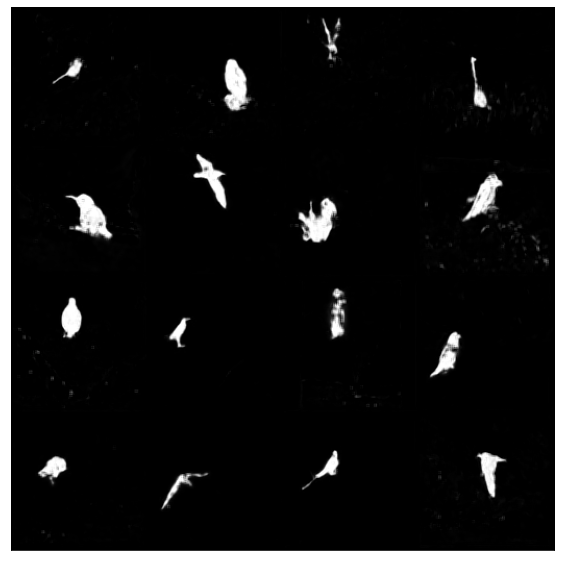

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  5
EPOCH: 5


  0%|          | 1/17500 [00:00<3:25:08,  1.42it/s]

Train Epoch: 5 [0/280000 (0%)]	Loss: 0.023836
IOU : 0.9070101857399641


  3%|▎         | 501/17500 [01:32<1:01:44,  4.59it/s]

Train Epoch: 5 [1500/280000 (3%)]	Loss: 0.017956
IOU : 0.9156656656656657


  6%|▌         | 1001/17500 [03:03<59:59,  4.58it/s]

Train Epoch: 5 [3000/280000 (6%)]	Loss: 0.013358
IOU : 0.9348370927318296


  9%|▊         | 1501/17500 [04:35<58:20,  4.57it/s]

Train Epoch: 5 [4500/280000 (9%)]	Loss: 0.028869
IOU : 0.8830885122410547


 11%|█▏        | 2001/17500 [06:06<56:19,  4.59it/s]

Train Epoch: 5 [6000/280000 (11%)]	Loss: 0.020812
IOU : 0.9103139013452914


 14%|█▍        | 2501/17500 [07:38<54:34,  4.58it/s]

Train Epoch: 5 [7500/280000 (14%)]	Loss: 0.021119
IOU : 0.9111974110032363


 17%|█▋        | 3001/17500 [09:09<52:41,  4.59it/s]

Train Epoch: 5 [9000/280000 (17%)]	Loss: 0.019046
IOU : 0.912945801741084


 20%|██        | 3501/17500 [10:41<50:52,  4.59it/s]

Train Epoch: 5 [10500/280000 (20%)]	Loss: 0.033303
IOU : 0.8815628815628815


 23%|██▎       | 4001/17500 [12:13<49:03,  4.59it/s]

Train Epoch: 5 [12000/280000 (23%)]	Loss: 0.033349
IOU : 0.8746434683399886


 26%|██▌       | 4501/17500 [13:44<47:14,  4.59it/s]

Train Epoch: 5 [13500/280000 (26%)]	Loss: 0.018388
IOU : 0.9146827950070776


 29%|██▊       | 5001/17500 [15:16<45:22,  4.59it/s]

Train Epoch: 5 [15000/280000 (29%)]	Loss: 0.019140
IOU : 0.9187000647808249


 31%|███▏      | 5501/17500 [16:47<43:38,  4.58it/s]

Train Epoch: 5 [16500/280000 (31%)]	Loss: 0.017537
IOU : 0.9297099845029887


 34%|███▍      | 6001/17500 [18:19<41:45,  4.59it/s]

Train Epoch: 5 [18000/280000 (34%)]	Loss: 0.023265
IOU : 0.9090535543076291


 37%|███▋      | 6501/17500 [19:50<39:58,  4.59it/s]

Train Epoch: 5 [19500/280000 (37%)]	Loss: 0.020978
IOU : 0.9142001198322349


 40%|████      | 7001/17500 [21:22<38:11,  4.58it/s]

Train Epoch: 5 [21000/280000 (40%)]	Loss: 0.031309
IOU : 0.8845435130806193


 43%|████▎     | 7501/17500 [22:54<36:28,  4.57it/s]

Train Epoch: 5 [22500/280000 (43%)]	Loss: 0.024806
IOU : 0.9090346534653465


 46%|████▌     | 8001/17500 [24:25<34:36,  4.57it/s]

Train Epoch: 5 [24000/280000 (46%)]	Loss: 0.020763
IOU : 0.9131531531531532


 49%|████▊     | 8501/17500 [25:57<32:39,  4.59it/s]

Train Epoch: 5 [25500/280000 (49%)]	Loss: 0.023332
IOU : 0.896085500901365


 51%|█████▏    | 9001/17500 [27:28<30:52,  4.59it/s]

Train Epoch: 5 [27000/280000 (51%)]	Loss: 0.021920
IOU : 0.9090234857849196


 54%|█████▍    | 9501/17500 [29:00<29:05,  4.58it/s]

Train Epoch: 5 [28500/280000 (54%)]	Loss: 0.017125
IOU : 0.9219811813904861


 57%|█████▋    | 10001/17500 [30:31<27:15,  4.59it/s]

Train Epoch: 5 [30000/280000 (57%)]	Loss: 0.022396
IOU : 0.9096290032766092


 60%|██████    | 10501/17500 [32:03<25:28,  4.58it/s]

Train Epoch: 5 [31500/280000 (60%)]	Loss: 0.019976
IOU : 0.9115930859848068


 63%|██████▎   | 11001/17500 [33:34<23:37,  4.58it/s]

Train Epoch: 5 [33000/280000 (63%)]	Loss: 0.018925
IOU : 0.930347063768464


 66%|██████▌   | 11501/17500 [35:06<21:46,  4.59it/s]

Train Epoch: 5 [34500/280000 (66%)]	Loss: 0.025173
IOU : 0.8970388481390926


 69%|██████▊   | 12001/17500 [36:38<19:58,  4.59it/s]

Train Epoch: 5 [36000/280000 (69%)]	Loss: 0.022761
IOU : 0.909408567361201


 71%|███████▏  | 12501/17500 [38:09<18:09,  4.59it/s]

Train Epoch: 5 [37500/280000 (71%)]	Loss: 0.023706
IOU : 0.8965429910092441


 74%|███████▍  | 13001/17500 [39:41<16:21,  4.59it/s]

Train Epoch: 5 [39000/280000 (74%)]	Loss: 0.022862
IOU : 0.9064974382859804


 77%|███████▋  | 13501/17500 [41:12<14:31,  4.59it/s]

Train Epoch: 5 [40500/280000 (77%)]	Loss: 0.021229
IOU : 0.9201294498381877


 80%|████████  | 14001/17500 [42:44<12:43,  4.58it/s]

Train Epoch: 5 [42000/280000 (80%)]	Loss: 0.033185
IOU : 0.8725678597165506


 83%|████████▎ | 14501/17500 [44:15<10:53,  4.59it/s]

Train Epoch: 5 [43500/280000 (83%)]	Loss: 0.022688
IOU : 0.903372333103923


 86%|████████▌ | 15001/17500 [45:47<09:06,  4.58it/s]

Train Epoch: 5 [45000/280000 (86%)]	Loss: 0.040497
IOU : 0.8615489130434782


 89%|████████▊ | 15501/17500 [47:19<07:16,  4.58it/s]

Train Epoch: 5 [46500/280000 (89%)]	Loss: 0.019017
IOU : 0.9201512200710276


 91%|█████████▏| 16001/17500 [48:50<05:27,  4.58it/s]

Train Epoch: 5 [48000/280000 (91%)]	Loss: 0.016792
IOU : 0.9156155398587286


 94%|█████████▍| 16501/17500 [50:22<03:38,  4.58it/s]

Train Epoch: 5 [49500/280000 (94%)]	Loss: 0.020185
IOU : 0.9091218130311615


 97%|█████████▋| 17001/17500 [51:54<01:49,  4.57it/s]

Train Epoch: 5 [51000/280000 (97%)]	Loss: 0.026353
IOU : 0.8873198847262248


100%|██████████| 17500/17500 [53:25<00:00,  5.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05651532856440885


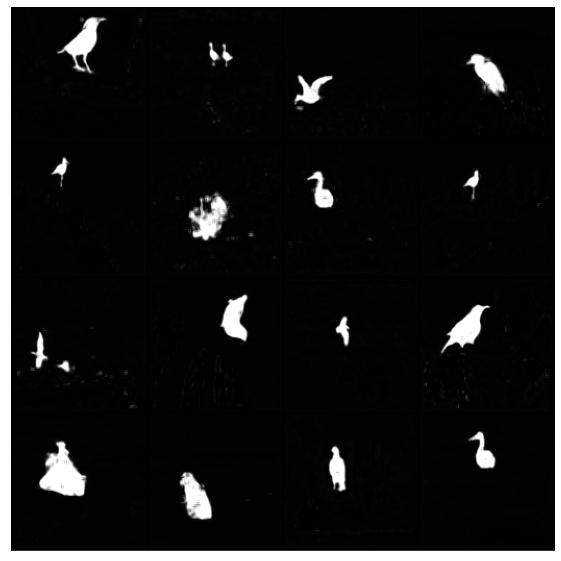

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  6
EPOCH: 6


  0%|          | 1/17500 [00:00<3:28:36,  1.40it/s]

Train Epoch: 6 [0/280000 (0%)]	Loss: 0.028903
IOU : 0.8871813635809245


  3%|▎         | 501/17500 [01:32<1:01:50,  4.58it/s]

Train Epoch: 6 [1500/280000 (3%)]	Loss: 0.020566
IOU : 0.9146919431279621


  6%|▌         | 1001/17500 [03:04<1:00:02,  4.58it/s]

Train Epoch: 6 [3000/280000 (6%)]	Loss: 0.021870
IOU : 0.9103694874851013


  9%|▊         | 1501/17500 [04:35<58:18,  4.57it/s]

Train Epoch: 6 [4500/280000 (9%)]	Loss: 0.018382
IOU : 0.9218577590530646


 11%|█▏        | 2001/17500 [06:07<56:19,  4.59it/s]

Train Epoch: 6 [6000/280000 (11%)]	Loss: 0.020710
IOU : 0.9093336894111363


 14%|█▍        | 2501/17500 [07:38<54:34,  4.58it/s]

Train Epoch: 6 [7500/280000 (14%)]	Loss: 0.019413
IOU : 0.9144579826654943


 17%|█▋        | 3001/17500 [09:10<52:40,  4.59it/s]

Train Epoch: 6 [9000/280000 (17%)]	Loss: 0.020683
IOU : 0.9104984517031266


 20%|██        | 3501/17500 [10:42<50:53,  4.58it/s]

Train Epoch: 6 [10500/280000 (20%)]	Loss: 0.022680
IOU : 0.9102777118442915


 23%|██▎       | 4001/17500 [12:13<49:06,  4.58it/s]

Train Epoch: 6 [12000/280000 (23%)]	Loss: 0.025782
IOU : 0.8898696931483817


 26%|██▌       | 4501/17500 [13:45<47:16,  4.58it/s]

Train Epoch: 6 [13500/280000 (26%)]	Loss: 0.022258
IOU : 0.9056793673616104


 29%|██▊       | 5001/17500 [15:17<45:28,  4.58it/s]

Train Epoch: 6 [15000/280000 (29%)]	Loss: 0.021416
IOU : 0.9166343544009306


 31%|███▏      | 5501/17500 [16:48<43:47,  4.57it/s]

Train Epoch: 6 [16500/280000 (31%)]	Loss: 0.014641
IOU : 0.9292730844793713


 34%|███▍      | 6001/17500 [18:20<41:48,  4.58it/s]

Train Epoch: 6 [18000/280000 (34%)]	Loss: 0.011479
IOU : 0.9373875899280576


 37%|███▋      | 6501/17500 [19:52<40:03,  4.58it/s]

Train Epoch: 6 [19500/280000 (37%)]	Loss: 0.022742
IOU : 0.9018249780123131


 40%|████      | 7001/17500 [21:23<38:18,  4.57it/s]

Train Epoch: 6 [21000/280000 (40%)]	Loss: 0.028093
IOU : 0.8891136679731951


 43%|████▎     | 7501/17500 [22:55<36:23,  4.58it/s]

Train Epoch: 6 [22500/280000 (43%)]	Loss: 0.016401
IOU : 0.9311897910671838


 46%|████▌     | 8001/17500 [24:27<34:30,  4.59it/s]

Train Epoch: 6 [24000/280000 (46%)]	Loss: 0.024395
IOU : 0.894522072461976


 49%|████▊     | 8501/17500 [25:58<32:42,  4.59it/s]

Train Epoch: 6 [25500/280000 (49%)]	Loss: 0.020804
IOU : 0.9083511777301927


 51%|█████▏    | 9001/17500 [27:30<30:52,  4.59it/s]

Train Epoch: 6 [27000/280000 (51%)]	Loss: 0.030451
IOU : 0.8898028648418664


 54%|█████▍    | 9501/17500 [29:02<29:06,  4.58it/s]

Train Epoch: 6 [28500/280000 (54%)]	Loss: 0.023959
IOU : 0.9046766881412551


 57%|█████▋    | 10001/17500 [30:33<27:20,  4.57it/s]

Train Epoch: 6 [30000/280000 (57%)]	Loss: 0.018871
IOU : 0.9167086693548387


 60%|██████    | 10501/17500 [32:05<25:23,  4.59it/s]

Train Epoch: 6 [31500/280000 (60%)]	Loss: 0.018153
IOU : 0.9223820278140973


 63%|██████▎   | 11001/17500 [33:36<23:39,  4.58it/s]

Train Epoch: 6 [33000/280000 (63%)]	Loss: 0.018369
IOU : 0.9172666757234071


 66%|██████▌   | 11501/17500 [35:08<21:50,  4.58it/s]

Train Epoch: 6 [34500/280000 (66%)]	Loss: 0.017243
IOU : 0.9221374045801527


 69%|██████▊   | 12001/17500 [36:40<20:01,  4.58it/s]

Train Epoch: 6 [36000/280000 (69%)]	Loss: 0.014472
IOU : 0.9328804973520608


 71%|███████▏  | 12501/17500 [38:11<18:11,  4.58it/s]

Train Epoch: 6 [37500/280000 (71%)]	Loss: 0.021513
IOU : 0.9125756556825824


 74%|███████▍  | 13001/17500 [39:43<16:21,  4.58it/s]

Train Epoch: 6 [39000/280000 (74%)]	Loss: 0.014492
IOU : 0.9335016835016835


 77%|███████▋  | 13501/17500 [41:15<14:33,  4.58it/s]

Train Epoch: 6 [40500/280000 (77%)]	Loss: 0.016350
IOU : 0.9283962264150943


 80%|████████  | 14001/17500 [42:46<12:43,  4.59it/s]

Train Epoch: 6 [42000/280000 (80%)]	Loss: 0.025752
IOU : 0.9014697279906405


 83%|████████▎ | 14501/17500 [44:18<10:53,  4.59it/s]

Train Epoch: 6 [43500/280000 (83%)]	Loss: 0.015248
IOU : 0.9275528978840847


 86%|████████▌ | 15001/17500 [45:49<09:04,  4.59it/s]

Train Epoch: 6 [45000/280000 (86%)]	Loss: 0.019142
IOU : 0.9111084014144617


 89%|████████▊ | 15501/17500 [47:21<07:15,  4.59it/s]

Train Epoch: 6 [46500/280000 (89%)]	Loss: 0.019477
IOU : 0.9195487921677131


 91%|█████████▏| 16001/17500 [48:53<05:26,  4.59it/s]

Train Epoch: 6 [48000/280000 (91%)]	Loss: 0.018428
IOU : 0.9234726688102894


 94%|█████████▍| 16501/17500 [50:24<03:38,  4.58it/s]

Train Epoch: 6 [49500/280000 (94%)]	Loss: 0.015378
IOU : 0.9229557979979754


 97%|█████████▋| 17001/17500 [51:56<01:49,  4.58it/s]

Train Epoch: 6 [51000/280000 (97%)]	Loss: 0.021154
IOU : 0.9213016608729239


100%|██████████| 17500/17500 [53:28<00:00,  5.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.056610773066931644


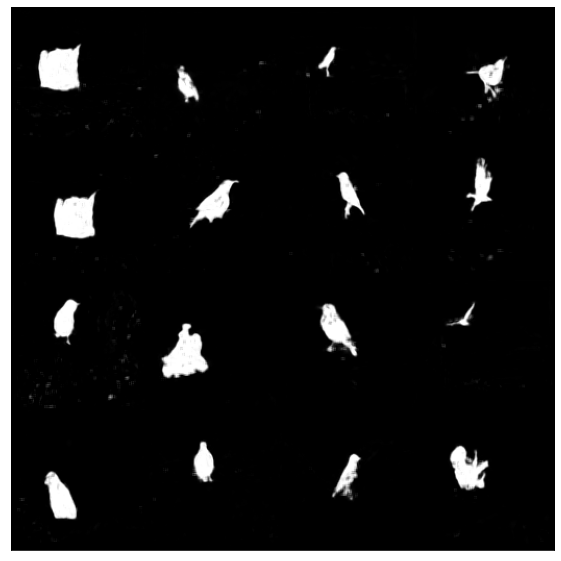

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  7
EPOCH: 7


  0%|          | 1/17500 [00:00<3:40:51,  1.32it/s]

Train Epoch: 7 [0/280000 (0%)]	Loss: 0.027659
IOU : 0.8927318295739348


  3%|▎         | 501/17500 [01:32<1:01:54,  4.58it/s]

Train Epoch: 7 [1500/280000 (3%)]	Loss: 0.017068
IOU : 0.9260291323622546


  6%|▌         | 1001/17500 [03:04<1:00:03,  4.58it/s]

Train Epoch: 7 [3000/280000 (6%)]	Loss: 0.025489
IOU : 0.906567992599445


  9%|▊         | 1501/17500 [04:36<58:06,  4.59it/s]

Train Epoch: 7 [4500/280000 (9%)]	Loss: 0.019566
IOU : 0.9127030730084165


 11%|█▏        | 2001/17500 [06:07<56:21,  4.58it/s]

Train Epoch: 7 [6000/280000 (11%)]	Loss: 0.024909
IOU : 0.8977655723380352


 14%|█▍        | 2501/17500 [07:39<54:29,  4.59it/s]

Train Epoch: 7 [7500/280000 (14%)]	Loss: 0.025791
IOU : 0.8947075982775385


 17%|█▋        | 3001/17500 [09:10<52:41,  4.59it/s]

Train Epoch: 7 [9000/280000 (17%)]	Loss: 0.018489
IOU : 0.9093610698365527


 20%|██        | 3501/17500 [10:42<50:53,  4.58it/s]

Train Epoch: 7 [10500/280000 (20%)]	Loss: 0.016146
IOU : 0.9269725177304965


 23%|██▎       | 4001/17500 [12:13<49:05,  4.58it/s]

Train Epoch: 7 [12000/280000 (23%)]	Loss: 0.015393
IOU : 0.9343530305909177


 26%|██▌       | 4501/17500 [13:45<47:23,  4.57it/s]

Train Epoch: 7 [13500/280000 (26%)]	Loss: 0.025301
IOU : 0.8937914877001172


 29%|██▊       | 5001/17500 [15:17<45:30,  4.58it/s]

Train Epoch: 7 [15000/280000 (29%)]	Loss: 0.021064
IOU : 0.9155545587080857


 31%|███▏      | 5501/17500 [16:48<43:42,  4.57it/s]

Train Epoch: 7 [16500/280000 (31%)]	Loss: 0.024336
IOU : 0.9048314606741573


 34%|███▍      | 6001/17500 [18:20<41:50,  4.58it/s]

Train Epoch: 7 [18000/280000 (34%)]	Loss: 0.021263
IOU : 0.9149400218102508


 37%|███▋      | 6501/17500 [19:52<40:03,  4.58it/s]

Train Epoch: 7 [19500/280000 (37%)]	Loss: 0.020449
IOU : 0.9157894736842105


 40%|████      | 7001/17500 [21:24<38:13,  4.58it/s]

Train Epoch: 7 [21000/280000 (40%)]	Loss: 0.021159
IOU : 0.9084586999716151


 43%|████▎     | 7501/17500 [22:55<36:29,  4.57it/s]

Train Epoch: 7 [22500/280000 (43%)]	Loss: 0.022301
IOU : 0.9086184495452577


 46%|████▌     | 8001/17500 [24:27<34:36,  4.57it/s]

Train Epoch: 7 [24000/280000 (46%)]	Loss: 0.025170
IOU : 0.9095152603231598


 49%|████▊     | 8501/17500 [25:59<32:44,  4.58it/s]

Train Epoch: 7 [25500/280000 (49%)]	Loss: 0.029833
IOU : 0.8816472916151373


 51%|█████▏    | 9001/17500 [27:31<30:58,  4.57it/s]

Train Epoch: 7 [27000/280000 (51%)]	Loss: 0.020593
IOU : 0.9142487959591213


 54%|█████▍    | 9501/17500 [29:02<29:05,  4.58it/s]

Train Epoch: 7 [28500/280000 (54%)]	Loss: 0.015722
IOU : 0.9248095395826432


 57%|█████▋    | 10001/17500 [30:34<27:16,  4.58it/s]

Train Epoch: 7 [30000/280000 (57%)]	Loss: 0.016140
IOU : 0.9301563287947554


 60%|██████    | 10501/17500 [32:06<25:28,  4.58it/s]

Train Epoch: 7 [31500/280000 (60%)]	Loss: 0.017393
IOU : 0.9142551906730456


 63%|██████▎   | 11001/17500 [33:38<23:41,  4.57it/s]

Train Epoch: 7 [33000/280000 (63%)]	Loss: 0.027631
IOU : 0.8927680798004988


 66%|██████▌   | 11501/17500 [35:10<21:48,  4.58it/s]

Train Epoch: 7 [34500/280000 (66%)]	Loss: 0.013948
IOU : 0.9225043782837128


 69%|██████▊   | 12001/17500 [36:41<20:00,  4.58it/s]

Train Epoch: 7 [36000/280000 (69%)]	Loss: 0.030300
IOU : 0.8873965328752147


 71%|███████▏  | 12501/17500 [38:13<18:11,  4.58it/s]

Train Epoch: 7 [37500/280000 (71%)]	Loss: 0.021192
IOU : 0.9116361649822453


 74%|███████▍  | 13001/17500 [39:45<16:24,  4.57it/s]

Train Epoch: 7 [39000/280000 (74%)]	Loss: 0.021263
IOU : 0.9038669551108708


 77%|███████▋  | 13501/17500 [41:17<14:33,  4.58it/s]

Train Epoch: 7 [40500/280000 (77%)]	Loss: 0.017724
IOU : 0.9169611307420494


 80%|████████  | 14001/17500 [42:48<12:44,  4.58it/s]

Train Epoch: 7 [42000/280000 (80%)]	Loss: 0.024935
IOU : 0.9024943310657596


 83%|████████▎ | 14501/17500 [44:20<10:54,  4.58it/s]

Train Epoch: 7 [43500/280000 (83%)]	Loss: 0.027454
IOU : 0.8925918490263


 86%|████████▌ | 15001/17500 [45:52<09:05,  4.58it/s]

Train Epoch: 7 [45000/280000 (86%)]	Loss: 0.019800
IOU : 0.9183895538628944


 89%|████████▊ | 15501/17500 [47:23<07:16,  4.58it/s]

Train Epoch: 7 [46500/280000 (89%)]	Loss: 0.013892
IOU : 0.9422706863373957


 91%|█████████▏| 16001/17500 [48:55<05:27,  4.58it/s]

Train Epoch: 7 [48000/280000 (91%)]	Loss: 0.020334
IOU : 0.9157441574415744


 94%|█████████▍| 16501/17500 [50:27<03:38,  4.58it/s]

Train Epoch: 7 [49500/280000 (94%)]	Loss: 0.023747
IOU : 0.8989252505736022


 97%|█████████▋| 17001/17500 [51:58<01:48,  4.58it/s]

Train Epoch: 7 [51000/280000 (97%)]	Loss: 0.016282
IOU : 0.9309119621002764


100%|██████████| 17500/17500 [53:30<00:00,  5.45it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.056696849401038266


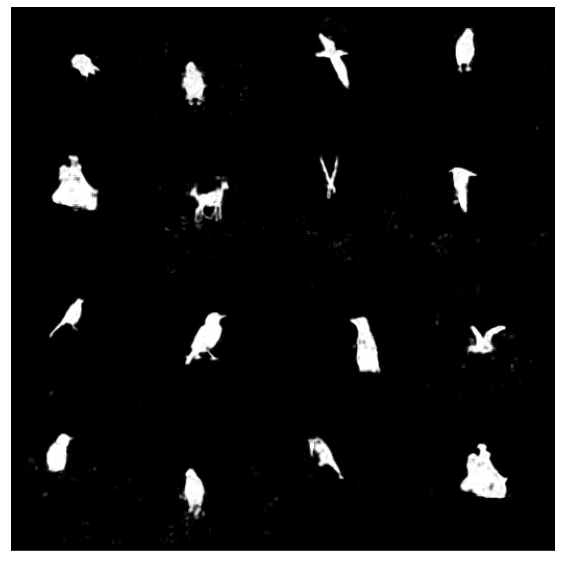

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  8
EPOCH: 8


  0%|          | 1/17500 [00:00<3:29:17,  1.39it/s]

Train Epoch: 8 [0/280000 (0%)]	Loss: 0.027057
IOU : 0.9030941125913193


  3%|▎         | 501/17500 [01:32<1:01:54,  4.58it/s]

Train Epoch: 8 [1500/280000 (3%)]	Loss: 0.018733
IOU : 0.9165670253753155


  6%|▌         | 1001/17500 [03:04<59:59,  4.58it/s]

Train Epoch: 8 [3000/280000 (6%)]	Loss: 0.014337
IOU : 0.9339101428124674


  9%|▊         | 1501/17500 [04:35<58:18,  4.57it/s]

Train Epoch: 8 [4500/280000 (9%)]	Loss: 0.014906
IOU : 0.9380731776496171


 11%|█▏        | 2001/17500 [06:07<56:22,  4.58it/s]

Train Epoch: 8 [6000/280000 (11%)]	Loss: 0.026931
IOU : 0.893354943273906


 14%|█▍        | 2501/17500 [07:38<54:31,  4.58it/s]

Train Epoch: 8 [7500/280000 (14%)]	Loss: 0.017921
IOU : 0.9202693125442948


 17%|█▋        | 3001/17500 [09:10<52:47,  4.58it/s]

Train Epoch: 8 [9000/280000 (17%)]	Loss: 0.017423
IOU : 0.918918918918919


 20%|██        | 3501/17500 [10:42<50:53,  4.58it/s]

Train Epoch: 8 [10500/280000 (20%)]	Loss: 0.022204
IOU : 0.911113318105075


 23%|██▎       | 4001/17500 [12:13<49:05,  4.58it/s]

Train Epoch: 8 [12000/280000 (23%)]	Loss: 0.021656
IOU : 0.913834600943487


 26%|██▌       | 4501/17500 [13:45<47:12,  4.59it/s]

Train Epoch: 8 [13500/280000 (26%)]	Loss: 0.016400
IOU : 0.9208682511333974


 29%|██▊       | 5001/17500 [15:16<45:30,  4.58it/s]

Train Epoch: 8 [15000/280000 (29%)]	Loss: 0.018388
IOU : 0.9211336240061554


 31%|███▏      | 5501/17500 [16:48<43:38,  4.58it/s]

Train Epoch: 8 [16500/280000 (31%)]	Loss: 0.028291
IOU : 0.8822789360172538


 34%|███▍      | 6001/17500 [18:20<41:51,  4.58it/s]

Train Epoch: 8 [18000/280000 (34%)]	Loss: 0.029133
IOU : 0.8949340527577938


 37%|███▋      | 6501/17500 [19:51<39:59,  4.58it/s]

Train Epoch: 8 [19500/280000 (37%)]	Loss: 0.018930
IOU : 0.9180557322814608


 40%|████      | 7001/17500 [21:23<38:12,  4.58it/s]

Train Epoch: 8 [21000/280000 (40%)]	Loss: 0.029445
IOU : 0.8861434108527132


 43%|████▎     | 7501/17500 [22:55<36:23,  4.58it/s]

Train Epoch: 8 [22500/280000 (43%)]	Loss: 0.022762
IOU : 0.909915819394337


 46%|████▌     | 8001/17500 [24:26<34:30,  4.59it/s]

Train Epoch: 8 [24000/280000 (46%)]	Loss: 0.013078
IOU : 0.9326947637292465


 49%|████▊     | 8501/17500 [25:58<32:46,  4.58it/s]

Train Epoch: 8 [25500/280000 (49%)]	Loss: 0.013238
IOU : 0.9369042215161144


 51%|█████▏    | 9001/17500 [27:30<31:04,  4.56it/s]

Train Epoch: 8 [27000/280000 (51%)]	Loss: 0.019304
IOU : 0.9149269096149887


 54%|█████▍    | 9501/17500 [29:01<29:02,  4.59it/s]

Train Epoch: 8 [28500/280000 (54%)]	Loss: 0.016752
IOU : 0.9246646026831785


 57%|█████▋    | 10001/17500 [30:33<27:16,  4.58it/s]

Train Epoch: 8 [30000/280000 (57%)]	Loss: 0.024415
IOU : 0.895738020707922


 60%|██████    | 10501/17500 [32:04<25:29,  4.58it/s]

Train Epoch: 8 [31500/280000 (60%)]	Loss: 0.018762
IOU : 0.9133078941092296


 63%|██████▎   | 11001/17500 [33:36<23:39,  4.58it/s]

Train Epoch: 8 [33000/280000 (63%)]	Loss: 0.021028
IOU : 0.9094729259214792


 66%|██████▌   | 11501/17500 [35:08<21:54,  4.57it/s]

Train Epoch: 8 [34500/280000 (66%)]	Loss: 0.020849
IOU : 0.9020731707317073


 69%|██████▊   | 12001/17500 [36:39<19:59,  4.59it/s]

Train Epoch: 8 [36000/280000 (69%)]	Loss: 0.022682
IOU : 0.9135233707649486


 71%|███████▏  | 12501/17500 [38:11<18:10,  4.59it/s]

Train Epoch: 8 [37500/280000 (71%)]	Loss: 0.032495
IOU : 0.8834484830279363


 74%|███████▍  | 13001/17500 [39:43<16:23,  4.57it/s]

Train Epoch: 8 [39000/280000 (74%)]	Loss: 0.030188
IOU : 0.8909383691992387


 77%|███████▋  | 13501/17500 [41:14<14:32,  4.58it/s]

Train Epoch: 8 [40500/280000 (77%)]	Loss: 0.017451
IOU : 0.9260749308524013


 80%|████████  | 14001/17500 [42:46<12:42,  4.59it/s]

Train Epoch: 8 [42000/280000 (80%)]	Loss: 0.024554
IOU : 0.8997441637352095


 83%|████████▎ | 14501/17500 [44:18<10:53,  4.59it/s]

Train Epoch: 8 [43500/280000 (83%)]	Loss: 0.024176
IOU : 0.9015323383084577


 86%|████████▌ | 15001/17500 [45:49<09:06,  4.57it/s]

Train Epoch: 8 [45000/280000 (86%)]	Loss: 0.019291
IOU : 0.9108187134502924


 89%|████████▊ | 15501/17500 [47:21<07:16,  4.58it/s]

Train Epoch: 8 [46500/280000 (89%)]	Loss: 0.021168
IOU : 0.9058571810644558


 91%|█████████▏| 16001/17500 [48:53<05:26,  4.59it/s]

Train Epoch: 8 [48000/280000 (91%)]	Loss: 0.021219
IOU : 0.913514104526569


 94%|█████████▍| 16501/17500 [50:24<03:38,  4.58it/s]

Train Epoch: 8 [49500/280000 (94%)]	Loss: 0.021779
IOU : 0.9090252707581228


 97%|█████████▋| 17001/17500 [51:56<01:48,  4.58it/s]

Train Epoch: 8 [51000/280000 (97%)]	Loss: 0.021338
IOU : 0.905074844833881


100%|██████████| 17500/17500 [53:27<00:00,  5.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05677282937560353


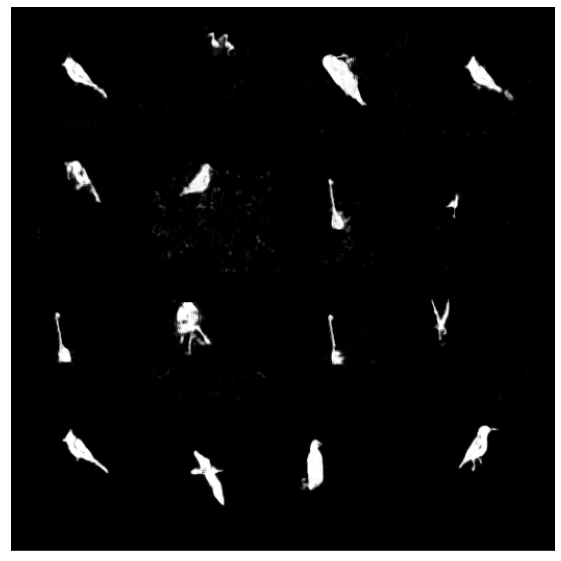

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  9
EPOCH: 9


  0%|          | 1/17500 [00:00<3:47:11,  1.28it/s]

Train Epoch: 9 [0/280000 (0%)]	Loss: 0.019884
IOU : 0.9094216534939155


  3%|▎         | 501/17500 [01:32<1:01:51,  4.58it/s]

Train Epoch: 9 [1500/280000 (3%)]	Loss: 0.024587
IOU : 0.8873770712649872


  6%|▌         | 1001/17500 [03:04<1:00:02,  4.58it/s]

Train Epoch: 9 [3000/280000 (6%)]	Loss: 0.012952
IOU : 0.9272250059651634


  9%|▊         | 1501/17500 [04:35<58:15,  4.58it/s]

Train Epoch: 9 [4500/280000 (9%)]	Loss: 0.020846
IOU : 0.9133597883597884


 11%|█▏        | 2001/17500 [06:07<56:21,  4.58it/s]

Train Epoch: 9 [6000/280000 (11%)]	Loss: 0.019304
IOU : 0.9096377489640423


 14%|█▍        | 2501/17500 [07:38<54:29,  4.59it/s]

Train Epoch: 9 [7500/280000 (14%)]	Loss: 0.018829
IOU : 0.9156673114119923


 17%|█▋        | 3001/17500 [09:10<52:47,  4.58it/s]

Train Epoch: 9 [9000/280000 (17%)]	Loss: 0.034423
IOU : 0.8612176046618617


 20%|██        | 3501/17500 [10:42<50:56,  4.58it/s]

Train Epoch: 9 [10500/280000 (20%)]	Loss: 0.024177
IOU : 0.9009665033761419


 23%|██▎       | 4001/17500 [12:13<49:10,  4.57it/s]

Train Epoch: 9 [12000/280000 (23%)]	Loss: 0.038940
IOU : 0.8618751494857689


 26%|██▌       | 4501/17500 [13:45<47:16,  4.58it/s]

Train Epoch: 9 [13500/280000 (26%)]	Loss: 0.020987
IOU : 0.9162333257969704


 29%|██▊       | 5001/17500 [15:16<45:31,  4.58it/s]

Train Epoch: 9 [15000/280000 (29%)]	Loss: 0.021224
IOU : 0.899173112830088


 31%|███▏      | 5501/17500 [16:48<43:34,  4.59it/s]

Train Epoch: 9 [16500/280000 (31%)]	Loss: 0.017861
IOU : 0.9123555310952118


 34%|███▍      | 6001/17500 [18:20<41:46,  4.59it/s]

Train Epoch: 9 [18000/280000 (34%)]	Loss: 0.042592
IOU : 0.8406799193316047


 37%|███▋      | 6501/17500 [19:51<39:58,  4.58it/s]

Train Epoch: 9 [19500/280000 (37%)]	Loss: 0.034968
IOU : 0.8784566763234132


 40%|████      | 7001/17500 [21:23<38:07,  4.59it/s]

Train Epoch: 9 [21000/280000 (40%)]	Loss: 0.030509
IOU : 0.8879389714586348


 43%|████▎     | 7501/17500 [22:54<36:21,  4.58it/s]

Train Epoch: 9 [22500/280000 (43%)]	Loss: 0.014759
IOU : 0.9233341908927193


 46%|████▌     | 8001/17500 [24:26<34:33,  4.58it/s]

Train Epoch: 9 [24000/280000 (46%)]	Loss: 0.023190
IOU : 0.9107165031665218


 49%|████▊     | 8501/17500 [25:58<32:42,  4.58it/s]

Train Epoch: 9 [25500/280000 (49%)]	Loss: 0.023345
IOU : 0.900408580183861


 51%|█████▏    | 9001/17500 [27:29<30:59,  4.57it/s]

Train Epoch: 9 [27000/280000 (51%)]	Loss: 0.017235
IOU : 0.9261711430356028


 54%|█████▍    | 9501/17500 [29:01<29:06,  4.58it/s]

Train Epoch: 9 [28500/280000 (54%)]	Loss: 0.021526
IOU : 0.9063765182186235


 57%|█████▋    | 10001/17500 [30:32<27:17,  4.58it/s]

Train Epoch: 9 [30000/280000 (57%)]	Loss: 0.016832
IOU : 0.9323125531656338


 60%|██████    | 10501/17500 [32:04<25:27,  4.58it/s]

Train Epoch: 9 [31500/280000 (60%)]	Loss: 0.021669
IOU : 0.8981046492791187


 63%|██████▎   | 11001/17500 [33:36<23:38,  4.58it/s]

Train Epoch: 9 [33000/280000 (63%)]	Loss: 0.020167
IOU : 0.9166558145591874


 66%|██████▌   | 11501/17500 [35:07<21:48,  4.58it/s]

Train Epoch: 9 [34500/280000 (66%)]	Loss: 0.014422
IOU : 0.9342060330108138


 69%|██████▊   | 12001/17500 [36:39<19:59,  4.59it/s]

Train Epoch: 9 [36000/280000 (69%)]	Loss: 0.015297
IOU : 0.9286849875085169


 71%|███████▏  | 12501/17500 [38:11<18:12,  4.58it/s]

Train Epoch: 9 [37500/280000 (71%)]	Loss: 0.011413
IOU : 0.9398092314439206


 74%|███████▍  | 13001/17500 [39:42<16:21,  4.58it/s]

Train Epoch: 9 [39000/280000 (74%)]	Loss: 0.020629
IOU : 0.9164165833055463


 77%|███████▋  | 13501/17500 [41:14<14:33,  4.58it/s]

Train Epoch: 9 [40500/280000 (77%)]	Loss: 0.022974
IOU : 0.9013878743608473


 80%|████████  | 14001/17500 [42:46<12:42,  4.59it/s]

Train Epoch: 9 [42000/280000 (80%)]	Loss: 0.016788
IOU : 0.9245361252202757


 83%|████████▎ | 14501/17500 [44:17<10:55,  4.58it/s]

Train Epoch: 9 [43500/280000 (83%)]	Loss: 0.017619
IOU : 0.9157123224919835


 86%|████████▌ | 15001/17500 [45:49<09:04,  4.59it/s]

Train Epoch: 9 [45000/280000 (86%)]	Loss: 0.018946
IOU : 0.9157713794585303


 89%|████████▊ | 15501/17500 [47:20<07:15,  4.59it/s]

Train Epoch: 9 [46500/280000 (89%)]	Loss: 0.024570
IOU : 0.8896415467118262


 91%|█████████▏| 16001/17500 [48:52<05:26,  4.59it/s]

Train Epoch: 9 [48000/280000 (91%)]	Loss: 0.018998
IOU : 0.9154402594163132


 94%|█████████▍| 16501/17500 [50:24<03:38,  4.58it/s]

Train Epoch: 9 [49500/280000 (94%)]	Loss: 0.013222
IOU : 0.9313708999158957


 97%|█████████▋| 17001/17500 [51:55<01:48,  4.58it/s]

Train Epoch: 9 [51000/280000 (97%)]	Loss: 0.023839
IOU : 0.8991822560770696


100%|██████████| 17500/17500 [53:27<00:00,  5.46it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.05684219278639372


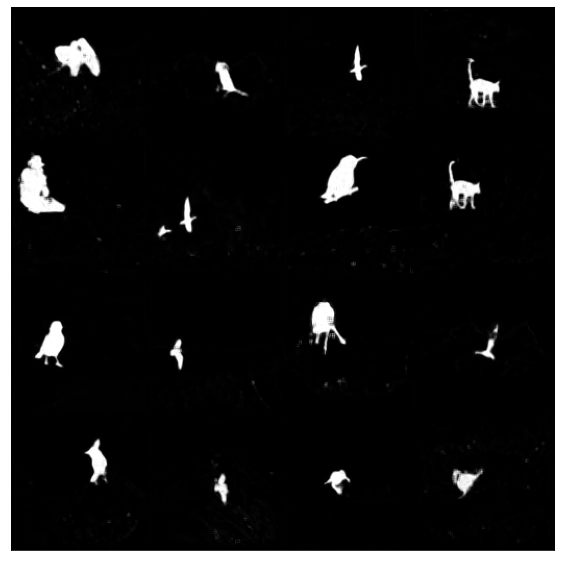

Learning rate = 0.01  for epoch:  10


In [18]:
image_size= 128
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou =train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [19]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-128K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

  0%|          | 0/17500 [00:00<?, ?it/s]

EPOCH: 1


  0%|          | 2/17500 [00:01<3:29:44,  1.39it/s]

Train Epoch: 1 [0/280000 (0%)]	Loss: 0.028251
IOU : 0.9127040454222853


  3%|▎         | 502/17500 [02:22<1:15:40,  3.74it/s]

Train Epoch: 1 [1500/280000 (3%)]	Loss: 0.033882
IOU : 0.89470174308973


  6%|▌         | 1002/17500 [04:43<1:13:30,  3.74it/s]

Train Epoch: 1 [3000/280000 (6%)]	Loss: 0.030377
IOU : 0.9112870755603275


  9%|▊         | 1502/17500 [07:03<1:10:47,  3.77it/s]

Train Epoch: 1 [4500/280000 (9%)]	Loss: 0.035995
IOU : 0.8840535372848949


 11%|█▏        | 2002/17500 [09:24<1:08:59,  3.74it/s]

Train Epoch: 1 [6000/280000 (11%)]	Loss: 0.027587
IOU : 0.9057587149692413


 14%|█▍        | 2502/17500 [11:45<1:06:33,  3.76it/s]

Train Epoch: 1 [7500/280000 (14%)]	Loss: 0.035932
IOU : 0.8808271023723807


 17%|█▋        | 3002/17500 [14:06<1:04:23,  3.75it/s]

Train Epoch: 1 [9000/280000 (17%)]	Loss: 0.020693
IOU : 0.9343301761975765


 20%|██        | 3502/17500 [16:27<1:02:29,  3.73it/s]

Train Epoch: 1 [10500/280000 (20%)]	Loss: 0.027004
IOU : 0.9041980624327234


 23%|██▎       | 4002/17500 [18:48<1:00:09,  3.74it/s]

Train Epoch: 1 [12000/280000 (23%)]	Loss: 0.046714
IOU : 0.863366645846346


 26%|██▌       | 4502/17500 [21:09<57:39,  3.76it/s]  

Train Epoch: 1 [13500/280000 (26%)]	Loss: 0.024192
IOU : 0.9149496514329977


 29%|██▊       | 5002/17500 [23:30<55:25,  3.76it/s]  

Train Epoch: 1 [15000/280000 (29%)]	Loss: 0.029739
IOU : 0.9060148037569198


 31%|███▏      | 5502/17500 [25:51<53:15,  3.75it/s]  

Train Epoch: 1 [16500/280000 (31%)]	Loss: 0.050022
IOU : 0.8599707637958338


 34%|███▍      | 6002/17500 [28:12<51:09,  3.75it/s]  

Train Epoch: 1 [18000/280000 (34%)]	Loss: 0.026262
IOU : 0.9196997270245678


 37%|███▋      | 6502/17500 [30:33<48:53,  3.75it/s]  

Train Epoch: 1 [19500/280000 (37%)]	Loss: 0.031544
IOU : 0.9028146183318597


 40%|████      | 7002/17500 [32:54<46:33,  3.76it/s]

Train Epoch: 1 [21000/280000 (40%)]	Loss: 0.046436
IOU : 0.8659325880474069


 43%|████▎     | 7502/17500 [35:15<44:26,  3.75it/s]

Train Epoch: 1 [22500/280000 (43%)]	Loss: 0.024783
IOU : 0.9181398311833094


 46%|████▌     | 8002/17500 [37:36<42:13,  3.75it/s]

Train Epoch: 1 [24000/280000 (46%)]	Loss: 0.035207
IOU : 0.8823316174871312


 49%|████▊     | 8502/17500 [39:57<39:58,  3.75it/s]

Train Epoch: 1 [25500/280000 (49%)]	Loss: 0.024733
IOU : 0.9089820359281438


 51%|█████▏    | 9002/17500 [42:18<37:45,  3.75it/s]

Train Epoch: 1 [27000/280000 (51%)]	Loss: 0.039723
IOU : 0.873806168780335


 54%|█████▍    | 9502/17500 [44:39<35:23,  3.77it/s]

Train Epoch: 1 [28500/280000 (54%)]	Loss: 0.025845
IOU : 0.9155490890688259


 57%|█████▋    | 10002/17500 [47:00<33:19,  3.75it/s]

Train Epoch: 1 [30000/280000 (57%)]	Loss: 0.036020
IOU : 0.8856656766342743


 60%|██████    | 10502/17500 [49:21<31:09,  3.74it/s]

Train Epoch: 1 [31500/280000 (60%)]	Loss: 0.041735
IOU : 0.8716078202509484


 63%|██████▎   | 11002/17500 [51:42<28:56,  3.74it/s]

Train Epoch: 1 [33000/280000 (63%)]	Loss: 0.040237
IOU : 0.8678248338803939


 66%|██████▌   | 11502/17500 [54:03<26:38,  3.75it/s]

Train Epoch: 1 [34500/280000 (66%)]	Loss: 0.034747
IOU : 0.8865237002453114


 69%|██████▊   | 12002/17500 [56:24<24:27,  3.75it/s]

Train Epoch: 1 [36000/280000 (69%)]	Loss: 0.031748
IOU : 0.8887518717519598


 71%|███████▏  | 12502/17500 [58:45<22:14,  3.75it/s]

Train Epoch: 1 [37500/280000 (71%)]	Loss: 0.027106
IOU : 0.9100194879376386


 74%|███████▍  | 13002/17500 [1:01:06<19:59,  3.75it/s]

Train Epoch: 1 [39000/280000 (74%)]	Loss: 0.047775
IOU : 0.8515475212270611


 77%|███████▋  | 13502/17500 [1:03:27<17:50,  3.73it/s]

Train Epoch: 1 [40500/280000 (77%)]	Loss: 0.025681
IOU : 0.9166798169480826


 80%|████████  | 14002/17500 [1:05:48<15:33,  3.75it/s]

Train Epoch: 1 [42000/280000 (80%)]	Loss: 0.023755
IOU : 0.904995287464656


 83%|████████▎ | 14502/17500 [1:08:09<13:16,  3.76it/s]

Train Epoch: 1 [43500/280000 (83%)]	Loss: 0.023469
IOU : 0.9139289306067717


 86%|████████▌ | 15002/17500 [1:10:30<11:03,  3.76it/s]

Train Epoch: 1 [45000/280000 (86%)]	Loss: 0.040488
IOU : 0.8747187399549984


 89%|████████▊ | 15502/17500 [1:12:51<08:52,  3.75it/s]

Train Epoch: 1 [46500/280000 (89%)]	Loss: 0.026276
IOU : 0.9084255042290176


 91%|█████████▏| 16002/17500 [1:15:11<06:39,  3.75it/s]

Train Epoch: 1 [48000/280000 (91%)]	Loss: 0.029923
IOU : 0.8905735377626348


 94%|█████████▍| 16502/17500 [1:17:32<04:25,  3.76it/s]

Train Epoch: 1 [49500/280000 (94%)]	Loss: 0.027240
IOU : 0.9060231758563606


 97%|█████████▋| 17002/17500 [1:19:53<02:12,  3.76it/s]

Train Epoch: 1 [51000/280000 (97%)]	Loss: 0.043230
IOU : 0.8622610266445883


100%|██████████| 17500/17500 [1:22:14<00:00,  3.55it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch IOU = 0.055612431550731235


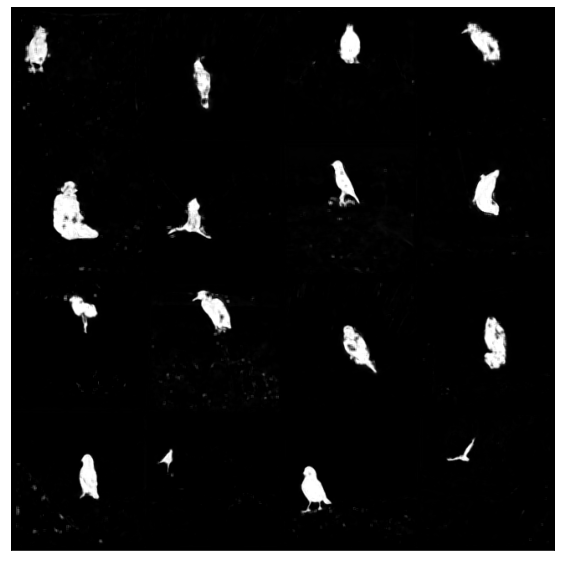

  0%|          | 0/17500 [00:00<?, ?it/s]

Learning rate = 0.01  for epoch:  2
EPOCH: 2


  0%|          | 2/17500 [00:01<3:21:56,  1.44it/s]

Train Epoch: 2 [0/280000 (0%)]	Loss: 0.030291
IOU : 0.8914005690799873


  3%|▎         | 502/17500 [02:21<1:15:16,  3.76it/s]

Train Epoch: 2 [1500/280000 (3%)]	Loss: 0.028957
IOU : 0.8983320095313742


  6%|▌         | 1002/17500 [04:42<1:13:01,  3.77it/s]

Train Epoch: 2 [3000/280000 (6%)]	Loss: 0.042878
IOU : 0.8618407154425745


  9%|▊         | 1502/17500 [07:03<1:10:53,  3.76it/s]

Train Epoch: 2 [4500/280000 (9%)]	Loss: 0.027178
IOU : 0.9099574818269099


 11%|█▏        | 2002/17500 [09:24<1:08:46,  3.76it/s]

Train Epoch: 2 [6000/280000 (11%)]	Loss: 0.041065
IOU : 0.8694461827284106


 14%|█▍        | 2502/17500 [11:45<1:06:38,  3.75it/s]

Train Epoch: 2 [7500/280000 (14%)]	Loss: 0.054978
IOU : 0.8344873375699516


 17%|█▋        | 3002/17500 [14:06<1:04:15,  3.76it/s]

Train Epoch: 2 [9000/280000 (17%)]	Loss: 0.036163
IOU : 0.8858391858965171


 20%|██        | 3502/17500 [16:27<1:02:00,  3.76it/s]

Train Epoch: 2 [10500/280000 (20%)]	Loss: 0.037436
IOU : 0.8683933630109267


 23%|██▎       | 4002/17500 [18:48<59:56,  3.75it/s]  

Train Epoch: 2 [12000/280000 (23%)]	Loss: 0.029963
IOU : 0.898128514796718


 26%|██▌       | 4502/17500 [21:09<57:47,  3.75it/s]  

Train Epoch: 2 [13500/280000 (26%)]	Loss: 0.029414
IOU : 0.9064238291763862


 29%|██▊       | 5002/17500 [23:30<55:34,  3.75it/s]  

Train Epoch: 2 [15000/280000 (29%)]	Loss: 0.022779
IOU : 0.9174567763524819


 31%|███▏      | 5502/17500 [25:51<53:20,  3.75it/s]  

Train Epoch: 2 [16500/280000 (31%)]	Loss: 0.035915
IOU : 0.8863141216082393


 34%|███▍      | 6002/17500 [28:12<50:57,  3.76it/s]  

Train Epoch: 2 [18000/280000 (34%)]	Loss: 0.030793
IOU : 0.9020850708924103


 37%|███▋      | 6502/17500 [30:32<48:51,  3.75it/s]  

Train Epoch: 2 [19500/280000 (37%)]	Loss: 0.028800
IOU : 0.8995472552348613


 40%|████      | 7002/17500 [32:53<46:34,  3.76it/s]

Train Epoch: 2 [21000/280000 (40%)]	Loss: 0.018777
IOU : 0.9342249240121581


 43%|████▎     | 7502/17500 [35:14<44:14,  3.77it/s]

Train Epoch: 2 [22500/280000 (43%)]	Loss: 0.058951
IOU : 0.8374814013255782


 46%|████▌     | 8002/17500 [37:35<42:12,  3.75it/s]

Train Epoch: 2 [24000/280000 (46%)]	Loss: 0.037176
IOU : 0.8790388050008118


 49%|████▊     | 8502/17500 [39:56<39:59,  3.75it/s]

Train Epoch: 2 [25500/280000 (49%)]	Loss: 0.035218
IOU : 0.8900084554678692


 51%|█████▏    | 9002/17500 [42:17<37:42,  3.76it/s]

Train Epoch: 2 [27000/280000 (51%)]	Loss: 0.022995
IOU : 0.9201364712435594


 54%|█████▍    | 9502/17500 [44:38<35:23,  3.77it/s]

Train Epoch: 2 [28500/280000 (54%)]	Loss: 0.029628
IOU : 0.9028927632219733


 55%|█████▍    | 9611/17500 [45:08<37:04,  3.55it/s]

In [ ]:
epochs=3
image_size= 160
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-160K.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
image_size= 192
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std, image_size)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-192k.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)

In [ ]:
train_transforms, test_transforms = preprochelper.PreprocHelper.getpytorchtransforms(image_net_mean, image_net_std)
monocular_ds.set_transforms(train_transforms)
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.01, momentum=0.9, weight_decay=1e-5)

from torch.nn import CrossEntropyLoss, BCEWithLogitsLoss, MSELoss, L1Loss, SmoothL1Loss
from src.train.customlossfunction import DiceLoss
# loss_fn = BCEWithLogitsLoss()
# loss_fn = L1Loss()
# loss_fn = MSELoss()
loss_fn = DiceLoss()
# loss_fn = SmoothL1Loss()
show_output = False
infer_index = 2
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    
    tr_out,train_loss, total_iou = train_model.train_Monocular(cnn_model, device, train_loader, optimizer, epoch, loss_fn, show_output, infer_index)
    # ts_out, dice_loss = train_model.test_Monocular(cnn_model, device, test_loader, class_correct, class_total, epoch, lr_data, loss_fn, 
    #                                     show_output, infer_index)
    
    from src.utils.utils import Utils

    Utils.show(tr_out.detach().cpu(), nrow=4)
    # Utils.show(ts_out.detach().cpu(), nrow=4)
    
    scheduler.step(total_iou)

    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

In [ ]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
utils.Utils.savemodel(model=cnn_model, epoch=epochs, path="finalmodelwithdata-Mask-224k.pt",
                      optimizer_state_dict=optimizer.state_dict
                      , train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses, lr_data=lr_data, class_correct=class_correct, class_total=class_total)